In [1]:
import typing as tp
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from collections import defaultdict

# A 10% shock occuring in 10 blocks (a couple minutes) and lasting for 100 blocks (20 minutes) leads to about 3.5% of free profit for anyone paying attention. What is worse is that, because of the time delay, the price does not immediately revert when the spot price has an opposite shock. 

In [2]:
FILENAME = "mc-1627502207.7848918-filtered"

In [3]:
FILENAME_FTX_2YR = "ethusd_01012020_08232021" # "alcxusd_03312021_08252021" # "uniusd_09172020_08252021" # "yfiusd_07252020_08262021" # "ethusd_01012020_08232021"

# OK, let's look at monte carlo sims. Data generated for 3 months every block assuming 15s blocks. Fit used to generate sample points assumes Levy process, with log stable increments

# Fit based on ETH/USDC 120d worth of data w 10min candles. Sim points generated every 15s

In [4]:
df = pd.read_csv(f"csv/{FILENAME}.csv")
df

Unnamed: 0        sim-0        sim-1        sim-3        sim-5  \
0                0  2239.570000  2239.570000  2239.570000  2239.570000   
1                1  2257.279939  2239.635583  2239.409648  2239.094328   
2                2  2256.965792  2239.605222  2239.267675  2239.050133   
3                3  2256.706637  2239.333992  2239.432515  2237.433049   
4                4  2257.705008  2240.500107  2239.547802  2237.308286   
...            ...          ...          ...          ...          ...   
518396      518396  4174.489419   906.705980  6157.105814   367.560558   
518397      518397  4173.715783   906.519268  6157.561302   367.610972   
518398      518398  4174.649734   906.736253  6158.126843   367.681718   
518399      518399  4174.341345   906.878986  6158.762760   367.669851   
518400      518400  4174.229295   906.757432  6159.313239   367.664499   

             sim-17       sim-22       sim-36       sim-38       sim-39  ...  \
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000  ...   
1       2239.760435  2239.796242  2239.750602  2240.430580  2239.417710  ...   
2       2239.888765  2239.791825  2239.242870  2240.002148  2239.213937  ...   
3       2238.922973  2240.031993  2239.386863  2239.706611  2239.122091  ...   
4       2239.140346  2239.931609  2240.015802  2239.730837  2238.947734  ...   
...             ...          ...          ...          ...          ...  ...   
518396   195.905552  3314.593940   403.041701  8906.875086  3085.968418  ...   
518397   195.885391  3313.934908   402.951137  8906.405720  3086.108355  ...   
518398   195.913516  3314.246217   402.456515  8907.964768  3085.927212  ...   
518399   196.010765  3313.808611   402.236807  8907.538585  3085.025612  ...   
518400   196.045444  3314.168984   402.028579  8907.385747  3085.000625  ...   

             sim-72       sim-76       sim-77       sim-83       sim-89  \
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000   
1       2239.938046  2239.420321  2239.679258  2239.517582  2239.318892   
2       2240.022457  2239.233272  2239.691800  2239.240016  2239.302512   
3       2240.235425  2239.673608  2238.520212  2239.447428  2239.764958   
4       2239.934672  2240.046417  2238.285628  2239.886464  2239.934240   
...             ...          ...          ...          ...          ...   
518396  1690.435861    19.376452  2584.766372  2181.585887   962.129536   
518397  1687.754736    19.378207  2584.720787  2181.946576   962.098430   
518398  1687.885219    19.379282  2583.785731  2183.254626   962.206680   
518399  1687.746931    19.377603  2583.822224  2183.000443   962.354298   
518400  1688.047998    19.388802  2583.716263  2181.841374   962.326495   

             sim-91       sim-93       sim-94       sim-97       sim-98  
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000  
1       2239.339680  2239.529045  2239.679989  2239.809589  2239.484089  
2       2239.621831  2239.378811  2239.273305  2238.563352  2239.233271  
3       2239.793826  2239.381085  2238.744148  2238.784563  2238.896240  
4       2239.995334  2238.865671  2238.706849  2238.663632  2240.015180  
...             ...          ...          ...          ...          ...  
518396  3032.097362  1067.191654  9180.367870  2834.303017  3741.589612  
518397  3031.955090  1066.845260  9180.012436  2833.928540  3740.045180  
518398  3031.872773  1067.057273  9180.881484  2833.470085  3740.032175  
518399  3032.868904  1067.320077  9180.609562  2833.829332  3740.222330  
518400  3033.163909  1067.227409  9179.096597  2833.484290  3741.181385  

[518401 rows x 32 columns]

# Start out with something relatively tame like sim 53. Calculate the TWAP over averaging times of 30m, 1h, 8h

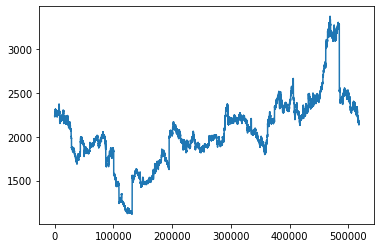

In [5]:
sim_filter = [0, 1, 3, 5, 17, 22, 36, 38, 39, 42, 43, 47, 49, 53, 55, 56, 63, 64, 65, 69, 71, 72, 76, 77, 83, 89, 91, 93, 94, 97, 98]
df['sim-53'].plot()

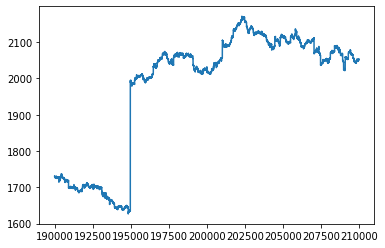

In [6]:
df['sim-53'][190000:210000].plot()

In [7]:
print(df.columns)
df = df.rename(columns={'Unnamed: 0': 'block'})
df

Index(['Unnamed: 0', 'sim-0', 'sim-1', 'sim-3', 'sim-5', 'sim-17', 'sim-22',
       'sim-36', 'sim-38', 'sim-39', 'sim-42', 'sim-43', 'sim-47', 'sim-49',
       'sim-53', 'sim-55', 'sim-56', 'sim-63', 'sim-64', 'sim-65', 'sim-69',
       'sim-71', 'sim-72', 'sim-76', 'sim-77', 'sim-83', 'sim-89', 'sim-91',
       'sim-93', 'sim-94', 'sim-97', 'sim-98'],
      dtype='object')


block        sim-0        sim-1        sim-3        sim-5  \
0            0  2239.570000  2239.570000  2239.570000  2239.570000   
1            1  2257.279939  2239.635583  2239.409648  2239.094328   
2            2  2256.965792  2239.605222  2239.267675  2239.050133   
3            3  2256.706637  2239.333992  2239.432515  2237.433049   
4            4  2257.705008  2240.500107  2239.547802  2237.308286   
...        ...          ...          ...          ...          ...   
518396  518396  4174.489419   906.705980  6157.105814   367.560558   
518397  518397  4173.715783   906.519268  6157.561302   367.610972   
518398  518398  4174.649734   906.736253  6158.126843   367.681718   
518399  518399  4174.341345   906.878986  6158.762760   367.669851   
518400  518400  4174.229295   906.757432  6159.313239   367.664499   

             sim-17       sim-22       sim-36       sim-38       sim-39  ...  \
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000  ...   
1       2239.760435  2239.796242  2239.750602  2240.430580  2239.417710  ...   
2       2239.888765  2239.791825  2239.242870  2240.002148  2239.213937  ...   
3       2238.922973  2240.031993  2239.386863  2239.706611  2239.122091  ...   
4       2239.140346  2239.931609  2240.015802  2239.730837  2238.947734  ...   
...             ...          ...          ...          ...          ...  ...   
518396   195.905552  3314.593940   403.041701  8906.875086  3085.968418  ...   
518397   195.885391  3313.934908   402.951137  8906.405720  3086.108355  ...   
518398   195.913516  3314.246217   402.456515  8907.964768  3085.927212  ...   
518399   196.010765  3313.808611   402.236807  8907.538585  3085.025612  ...   
518400   196.045444  3314.168984   402.028579  8907.385747  3085.000625  ...   

             sim-72       sim-76       sim-77       sim-83       sim-89  \
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000   
1       2239.938046  2239.420321  2239.679258  2239.517582  2239.318892   
2       2240.022457  2239.233272  2239.691800  2239.240016  2239.302512   
3       2240.235425  2239.673608  2238.520212  2239.447428  2239.764958   
4       2239.934672  2240.046417  2238.285628  2239.886464  2239.934240   
...             ...          ...          ...          ...          ...   
518396  1690.435861    19.376452  2584.766372  2181.585887   962.129536   
518397  1687.754736    19.378207  2584.720787  2181.946576   962.098430   
518398  1687.885219    19.379282  2583.785731  2183.254626   962.206680   
518399  1687.746931    19.377603  2583.822224  2183.000443   962.354298   
518400  1688.047998    19.388802  2583.716263  2181.841374   962.326495   

             sim-91       sim-93       sim-94       sim-97       sim-98  
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000  
1       2239.339680  2239.529045  2239.679989  2239.809589  2239.484089  
2       2239.621831  2239.378811  2239.273305  2238.563352  2239.233271  
3       2239.793826  2239.381085  2238.744148  2238.784563  2238.896240  
4       2239.995334  2238.865671  2238.706849  2238.663632  2240.015180  
...             ...          ...          ...          ...          ...  
518396  3032.097362  1067.191654  9180.367870  2834.303017  3741.589612  
518397  3031.955090  1066.845260  9180.012436  2833.928540  3740.045180  
518398  3031.872773  1067.057273  9180.881484  2833.470085  3740.032175  
518399  3032.868904  1067.320077  9180.609562  2833.829332  3740.222330  
518400  3033.163909  1067.227409  9179.096597  2833.484290  3741.181385  

[518401 rows x 32 columns]

In [8]:
prices = df['sim-53']
prices

0         2239.570000
1         2239.667466
2         2240.655710
3         2238.304510
4         2239.584944
             ...     
518396    2179.164884
518397    2180.037396
518398    2179.911487
518399    2179.797703
518400    2180.034550
Name: sim-53, Length: 518401, dtype: float64

In [9]:
# This is number of blocks into the future
blocks = df['block']
blocks

0              0
1              1
2              2
3              3
4              4
           ...  
518396    518396
518397    518397
518398    518398
518399    518399
518400    518400
Name: block, Length: 518401, dtype: int64

In [10]:
# 1h price changes
# Use the geometric mean to be consistent with uni v3: https://uniswap.org/whitepaper-v3.pdf
# Compare with arithmetic mean as well ...
window_1h = 4*60

dp_1h_arith = prices.rolling(window=window_1h).sum()
dt_1h = blocks.rolling(window=window_1h).apply(lambda w: w[-1]-w[0]+1, raw=True)
dt_1h

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
518396    240.0
518397    240.0
518398    240.0
518399    240.0
518400    240.0
Name: block, Length: 518401, dtype: float64

In [11]:
twap_1h_arith = (dp_1h_arith / dt_1h)
twap_1h_arith = twap_1h_arith[~twap_1h_arith.isnull()]
twap_1h_arith

239       2238.890016
240       2238.884368
241       2238.879010
242       2238.868694
243       2238.867567
             ...     
518396    2161.297954
518397    2161.377192
518398    2161.456294
518399    2161.531477
518400    2161.606372
Length: 518162, dtype: float64

In [12]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 240 blocks in this sim
twap_1h_geo = prices.rolling(window=window_1h).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_1h), raw=True)
twap_1h_geo = twap_1h_geo[~twap_1h_geo.isnull()]
twap_1h_geo

239       2238.888859
240       2238.883210
241       2238.877853
242       2238.867539
243       2238.866412
             ...     
518396    2161.265451
518397    2161.344353
518398    2161.423125
518399    2161.497987
518400    2161.572553
Name: sim-53, Length: 518162, dtype: float64

In [13]:
prices_filtered = prices[239:]
prices_filtered

239       2237.622746
240       2238.214274
241       2238.381596
242       2238.179852
243       2238.034022
             ...     
518396    2179.164884
518397    2180.037396
518398    2179.911487
518399    2179.797703
518400    2180.034550
Name: sim-53, Length: 518162, dtype: float64

# Compare what TWAP arithmetic, geometric vs spot look like near a spot jump

In [14]:
prices_filtered[194710:194760]

194949    1637.445701
194950    1637.247430
194951    1637.421921
194952    1636.634825
194953    1636.663335
194954    1636.650276
194955    1636.749059
194956    1635.894670
194957    1635.856624
194958    1635.430328
194959    1635.315208
194960    1634.585924
194961    1633.767173
194962    1633.765022
194963    1633.796563
194964    1634.757899
194965    1634.983232
194966    1635.193521
194967    1634.694454
194968    1634.704682
194969    1634.698519
194970    1634.724512
194971    1994.326618
194972    1990.126144
194973    1989.787615
194974    1989.552402
194975    1988.576333
194976    1988.713652
194977    1988.674788
194978    1988.696268
194979    1988.999884
194980    1989.234997
194981    1989.008158
194982    1989.095215
194983    1989.152632
194984    1989.476140
194985    1989.942940
194986    1989.624463
194987    1990.070219
194988    1989.968677
194989    1989.188977
194990    1989.960421
194991    1989.434537
194992    1989.031456
194993    1989.041240
194994    

# Notice, there's a 360 USD (22%) jump over 1 block, which is unrealistic (larger tails in log stable than in reality). Should likely use 10min data to get more realistic sense, but this is good to stress test. Will come back to using 10min data later in notebook.

In [15]:
twap_1h_arith[194710:194760]

194949    1639.848098
194950    1639.799708
194951    1639.749869
194952    1639.698266
194953    1639.645923
194954    1639.596900
194955    1639.547413
194956    1639.493362
194957    1639.437896
194958    1639.380414
194959    1639.322263
194960    1639.266878
194961    1639.208955
194962    1639.145160
194963    1639.081097
194964    1639.019885
194965    1638.955612
194966    1638.893635
194967    1638.829073
194968    1638.765166
194969    1638.699826
194970    1638.635522
194971    1640.072081
194972    1641.493586
194973    1642.917156
194974    1644.339188
194975    1645.756711
194976    1647.174849
194977    1648.592427
194978    1650.007003
194979    1651.423193
194980    1652.839931
194981    1654.260080
194982    1655.681324
194983    1657.106640
194984    1658.533988
194985    1659.963602
194986    1661.390022
194987    1662.819405
194988    1664.247851
194989    1665.675496
194990    1667.107350
194991    1668.536743
194992    1669.964004
194993    1671.391759
194994    

In [16]:
print(twap_1h_geo[194710:194760])
print(twap_1h_geo[194710:195000])

194949    1639.835271
194950    1639.786976
194951    1639.737247
194952    1639.685742
194953    1639.633503
194954    1639.584567
194955    1639.535174
194956    1639.481218
194957    1639.425854
194958    1639.368475
194959    1639.310428
194960    1639.255109
194961    1639.197238
194962    1639.133530
194963    1639.069560
194964    1639.008461
194965    1638.944333
194966    1638.882496
194967    1638.818074
194968    1638.754307
194969    1638.689118
194970    1638.624962
194971    1639.921370
194972    1641.206823
194973    1642.495581
194974    1643.783985
194975    1645.069594
194976    1646.356726
194977    1647.644333
194978    1648.929929
194979    1650.217927
194980    1651.507312
194981    1652.801287
194982    1654.097312
194983    1655.398404
194984    1656.702329
194985    1658.009225
194986    1659.314165
194987    1660.622797
194988    1661.931589
194989    1663.241168
194990    1664.555474
194991    1665.868711
194992    1667.181119
194993    1668.495054
194994    

# Timelag in the TWAP vs spot is clear. Now let's plot and add in bid/ask spread.

## Bid/ask spread based off last point added to accumluator + 99% confidence constant E_B. Limits probability of profitable trade 1h into future once TWAP catches up to spot

## dB = P_{t-1} * e^{ (1/T) * [X_t + E_B ] } - TWAP_{t}

## where T is averaging window for the TWAP.

## Q: Do we want to min the exponent so it's never less than TWAP_{t} for B nor greater than TWAP_{t} for ask?

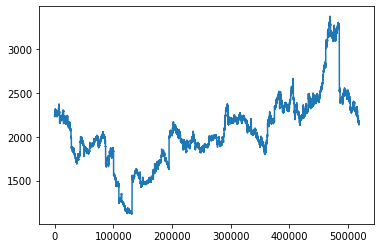

In [17]:
prices_filtered.plot()

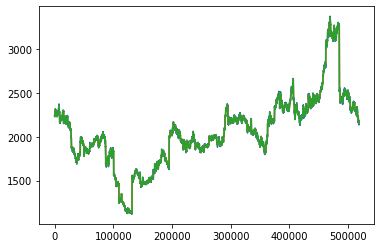

In [18]:
ax = prices_filtered.plot()
twap_1h_geo.plot(ax=ax)
twap_1h_arith.plot(ax=ax)

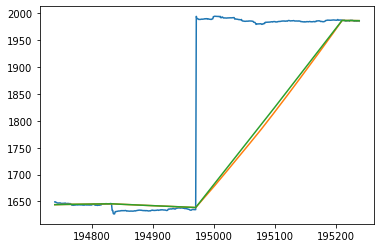

In [19]:
ax = prices_filtered[194500:195000].plot()
twap_1h_geo[194500:195000].plot(ax=ax)
twap_1h_arith[194500:195000].plot(ax=ax)

# Playing catch up over 240 blocks after spot jump with TWAP

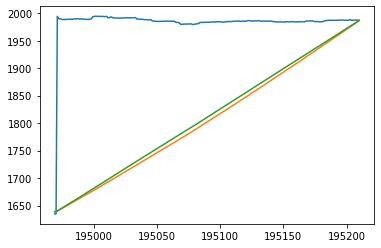

In [20]:
ax = prices_filtered[194730:194972].plot()
twap_1h_geo[194730:194972].plot(ax=ax)
twap_1h_arith[194730:194972].plot(ax=ax)

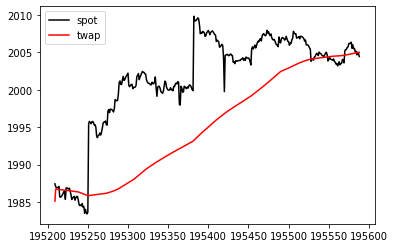

In [21]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag.png')

In [22]:
print('spot at jump', prices_filtered[195010:195015])
print('twap at jump', twap_1h_geo[195010:195015])
print('spot 1h after jump', prices_filtered[195010+window_1h:195015+window_1h])
print('twap 1h after jump', twap_1h_geo[195010+window_1h:195015+window_1h])

spot at jump 195249    1983.410406
195250    1983.653382
195251    1995.482323
195252    1995.783461
195253    1995.607815
Name: sim-53, dtype: float64
twap at jump 195249    1985.893596
195250    1985.848948
195251    1985.863894
195252    1985.880668
195253    1985.891454
Name: sim-53, dtype: float64
spot 1h after jump 195489    2006.375940
195490    2006.265032
195491    2006.807187
195492    2006.988585
195493    2006.943630
Name: sim-53, dtype: float64
twap 1h after jump 195489    2002.341845
195490    2002.436412
195491    2002.483630
195492    2002.530344
195493    2002.577607
Name: sim-53, dtype: float64


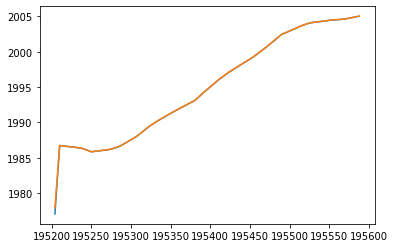

In [23]:
ax = twap_1h_geo[194965:195350].plot()
twap_1h_arith[194965:195350].plot(ax=ax)

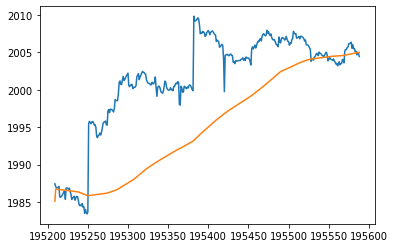

In [24]:
# Focus on only 240 block timespan to check catch up
ax = prices_filtered[194970:195350].plot()
twap_1h_geo[194970:195350].plot(ax=ax)

In [25]:
print(prices_filtered[194970:195025])
print(twap_1h_geo[194970:195025])

195209    1987.427329
195210    1987.061184
195211    1986.902750
195212    1986.925091
195213    1986.913355
195214    1987.084465
195215    1985.698910
195216    1985.637224
195217    1985.750202
195218    1985.887878
195219    1986.114328
195220    1986.326442
195221    1986.469949
195222    1985.365886
195223    1986.880659
195224    1986.879325
195225    1986.832025
195226    1986.723653
195227    1986.858808
195228    1986.403009
195229    1986.030006
195230    1985.337765
195231    1985.569617
195232    1985.600455
195233    1985.773879
195234    1985.244777
195235    1985.563615
195236    1985.743142
195237    1985.738180
195238    1985.327255
195239    1984.702402
195240    1984.520949
195241    1984.596926
195242    1984.485857
195243    1984.791574
195244    1984.313530
195245    1984.401755
195246    1983.497403
195247    1984.019650
195248    1983.589147
195249    1983.410406
195250    1983.653382
195251    1995.482323
195252    1995.783461
195253    1995.607815
195254    

In [26]:
# Jump in spot occurs from 195250 to 195251
print(np.log(1995.482323/1983.653382))
np.exp(0.005945500089474321/240)*np.exp(np.log(1.007))

# geometric TWAP value at 19250 is 1985.848948; 19251 is 1985.863894
1985.863894*np.exp(0.005945500089474321/240)*np.exp(np.log(1.007))

# Perfect. It's above the jump

0.005945500089474321


1999.8144818826183

In [27]:
# We could make it way more intense by instead using the current spot price as the top of the buy band ...
print(1995.482323*np.exp(0.005945500089474321/240)*np.exp(np.log(1.007)))

# Yea then it's way higher.

2009.50047983307


In [28]:
# Check that we catch up at 195251+240 = 195491
print(prices_filtered[194970:195025])
print(twap_1h_geo[195210:195265])

195209    1987.427329
195210    1987.061184
195211    1986.902750
195212    1986.925091
195213    1986.913355
195214    1987.084465
195215    1985.698910
195216    1985.637224
195217    1985.750202
195218    1985.887878
195219    1986.114328
195220    1986.326442
195221    1986.469949
195222    1985.365886
195223    1986.880659
195224    1986.879325
195225    1986.832025
195226    1986.723653
195227    1986.858808
195228    1986.403009
195229    1986.030006
195230    1985.337765
195231    1985.569617
195232    1985.600455
195233    1985.773879
195234    1985.244777
195235    1985.563615
195236    1985.743142
195237    1985.738180
195238    1985.327255
195239    1984.702402
195240    1984.520949
195241    1984.596926
195242    1984.485857
195243    1984.791574
195244    1984.313530
195245    1984.401755
195246    1983.497403
195247    1984.019650
195248    1983.589147
195249    1983.410406
195250    1983.653382
195251    1995.482323
195252    1995.783461
195253    1995.607815
195254    

In [29]:
# 195491    2002.483630
# Geometric twap is at 2002.483630 after an hour. Bid up with 0.7% envelope had it at 1999.8144818826183.
# So trader can profit ... 0.1334% => which is 0 after fees [x]
(2002.483630-1999.8144818826183)/1999.8144818826183

0.001334697864008307

# Ok! Bid/ask envelope seems potentially promising. Let's see it live in action. Add in envelope values to 1h TWAP for bid/ask. Don't have it adjust only on side with jump (try this later)

In [30]:
# Spread that makes unwinding over the next hour during TWAP catchup unprofitable ~99% of time
# SPREAD_X is e^X exponent component
SPREAD_X = np.log(1.00731)
SPREAD_X

0.007283411446258746

In [31]:
print('Long side price adjust up (Ask):', np.exp(SPREAD_X))
print('Short side price adjust down (Bid):', np.exp(-SPREAD_X))

Long side price adjust up (Ask): 1.00731
Short side price adjust down (Bid): 0.9927430483168043


In [32]:
twap_1h_geo_ask = twap_1h_geo.apply(lambda x: x * np.exp(SPREAD_X))
twap_1h_geo_bid = twap_1h_geo.apply(lambda x: x * np.exp(-SPREAD_X))

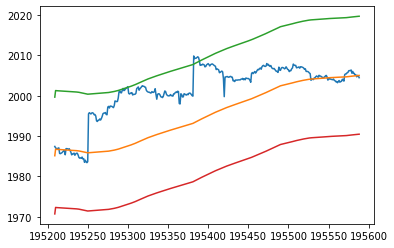

In [33]:
ax = prices_filtered[194970:195350].plot()
twap_1h_geo[194970:195350].plot(ax=ax)
twap_1h_geo_ask[194970:195350].plot(ax=ax)
twap_1h_geo_bid[194970:195350].plot(ax=ax)

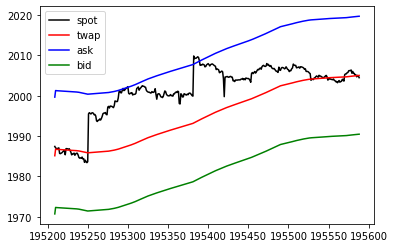

In [34]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid[194970:195350].plot(ax=ax, c='g', label='bid')
ax.legend()

In [35]:
print("prices_filtered", prices_filtered[195012:195013])
print("twap_1h_geo", twap_1h_geo[195012:195013])
print("twap_1h_geo_ask", twap_1h_geo_ask[195012:195013])
print("twap_1h_geo_bid", twap_1h_geo_bid[195012:195013])

prices_filtered 195251    1995.482323
Name: sim-53, dtype: float64
twap_1h_geo 195251    1985.863894
Name: sim-53, dtype: float64
twap_1h_geo_ask 195251    2000.380559
Name: sim-53, dtype: float64
twap_1h_geo_bid 195251    1971.452575
Name: sim-53, dtype: float64


In [36]:
1985.863894 * np.exp(SPREAD_X)

2000.38055906514

In [37]:
np.exp(SPREAD_X)

1.00731

In [38]:
0.00731 * 1985.863894

14.51666506514

# Compare the Ask value given to longs at time of jump with the TWAP value 1h into the future (used for unwind). Did the trader exit profitably while taking advantage of lag?

In [39]:
# prices at jump
print("prices_filtered at jump", prices_filtered[195012:195013])
print("twap_1h_geo at jump", twap_1h_geo[195012:195013])
print("twap_1h_geo_ask at jump", twap_1h_geo_ask[195012:195013])
print("twap_1h_geo_bid at jump", twap_1h_geo_bid[195012:195013])

prices_filtered at jump 195251    1995.482323
Name: sim-53, dtype: float64
twap_1h_geo at jump 195251    1985.863894
Name: sim-53, dtype: float64
twap_1h_geo_ask at jump 195251    2000.380559
Name: sim-53, dtype: float64
twap_1h_geo_bid at jump 195251    1971.452575
Name: sim-53, dtype: float64


In [40]:
195012 + 240

195252

In [41]:
# prices 1h after jump
print("prices_filtered 1h after jump", prices_filtered[195252:195253])
print("twap_1h_geo 1h after jump", twap_1h_geo[195252:195253])
print("twap_1h_geo_ask 1h after jump", twap_1h_geo_ask[195252:195253])
print("twap_1h_geo_bid 1h after jump", twap_1h_geo_bid[195252:195253])

prices_filtered 1h after jump 195491    2006.807187
Name: sim-53, dtype: float64
twap_1h_geo 1h after jump 195491    2002.48363
Name: sim-53, dtype: float64
twap_1h_geo_ask 1h after jump 195491    2017.121785
Name: sim-53, dtype: float64
twap_1h_geo_bid 1h after jump 195491    1987.951703
Name: sim-53, dtype: float64


In [42]:
# unwind price 1h after jump
twap_1h_geo[195252:195253]

195491    2002.48363
Name: sim-53, dtype: float64

In [43]:
# build price for long at jump (ask)
twap_1h_geo_ask[195012:195013]

195251    2000.380559
Name: sim-53, dtype: float64

In [44]:
# So profit on spread ...
(2002.48363 - 2000.380559) / 2000.380559

0.001051335452415782

# Profit on spread from time lag is about 0.1% which will get eaten by trading fees => 2 trades at 0.075% = .15%, so the time lag trade strategy is no longer profitable on this jump

# The jump here had a size of: 0.6% within a block

In [45]:
prices_filtered[195012:195013]

195251    1995.482323
Name: sim-53, dtype: float64

In [46]:
prices_filtered[195011:195012]

195250    1983.653382
Name: sim-53, dtype: float64

In [47]:
(1995.482323 - 1983.653382) / 1983.653382

0.005963209655143262

# Let's zoom out and look at bands over entire sim

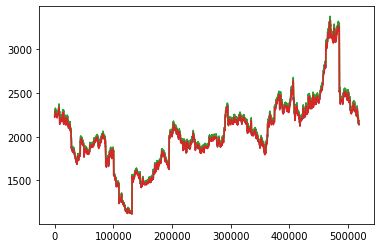

In [48]:
ax = prices_filtered.plot()
twap_1h_geo.plot(ax=ax)
twap_1h_geo_ask.plot(ax=ax)
twap_1h_geo_bid.plot(ax=ax)

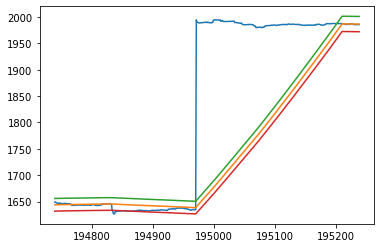

In [49]:
# Fine, but hard to see anything. Let's look at super extreme jump from 194500:195000
ax = prices_filtered[194500:195000].plot()
twap_1h_geo[194500:195000].plot(ax=ax)
twap_1h_geo_ask[194500:195000].plot(ax=ax)
twap_1h_geo_bid[194500:195000].plot(ax=ax)

# That's not good. Might want to instead have bands wrt to spot price? and only adjust up/down for side (long/short) where it's not favorable. can see issues with a massive drop ...

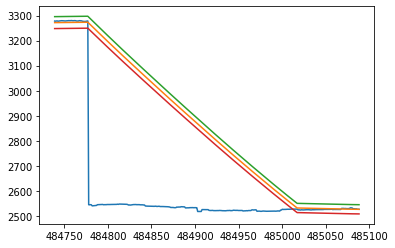

In [50]:
ax = prices_filtered[484500:484850].plot()
twap_1h_geo[484500:484850].plot(ax=ax)
twap_1h_geo_ask[484500:484850].plot(ax=ax)
twap_1h_geo_bid[484500:484850].plot(ax=ax)

# Let's look at some "relatively" normal behavior first before modifying spread function

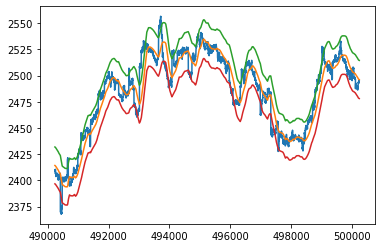

In [51]:
ax = prices_filtered[490000:500000].plot()
twap_1h_geo[490000:500000].plot(ax=ax)
twap_1h_geo_ask[490000:500000].plot(ax=ax)
twap_1h_geo_bid[490000:500000].plot(ax=ax)

# Not terrible. But ok, let's time shift the unwind TWAP 1h values 240 periods into the future and compare delta with build bid/ask prices, to plot how often timelag trade could be profitable

In [52]:
twap_1h_geo_1h_later = twap_1h_geo
twap_1h_geo_1h_later = twap_1h_geo_1h_later.shift(periods=-window_1h)
twap_1h_geo_1h_later

239       2257.076730
240       2257.226299
241       2257.378152
242       2257.527796
243       2257.678313
             ...     
518396            NaN
518397            NaN
518398            NaN
518399            NaN
518400            NaN
Name: sim-53, Length: 518162, dtype: float64

In [53]:
print(twap_1h_geo_1h_later[235:255])
print(twap_1h_geo_1h_later[len(twap_1h_geo_1h_later)-20-240:])

474    2279.186915
475    2279.215207
476    2279.234399
477    2279.251989
478    2279.269450
479    2279.286772
480    2279.307510
481    2279.323526
482    2279.341764
483    2279.359216
484    2279.380665
485    2279.404962
486    2279.428198
487    2279.453057
488    2279.478101
489    2279.502033
490    2279.526524
491    2279.551823
492    2279.576712
493    2279.598607
Name: sim-53, dtype: float64
518141    2160.249051
518142    2160.303117
518143    2160.356821
518144    2160.415235
518145    2160.473985
             ...     
518396            NaN
518397            NaN
518398            NaN
518399            NaN
518400            NaN
Name: sim-53, Length: 260, dtype: float64


# Now plot value of TWAP 1h into the future vs bands at current time

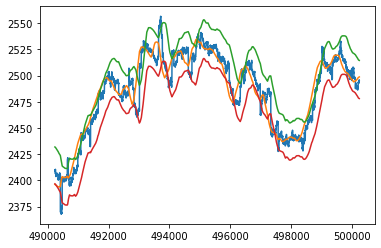

In [54]:
ax = prices_filtered[490000:500000].plot()
twap_1h_geo_1h_later[490000:500000].plot(ax=ax)
twap_1h_geo_ask[490000:500000].plot(ax=ax)
twap_1h_geo_bid[490000:500000].plot(ax=ax)

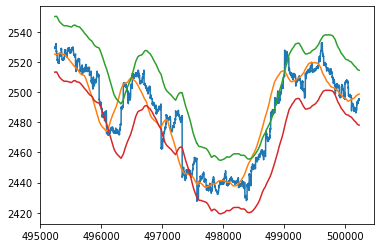

In [55]:
# zoom in ...
ax = prices_filtered[495000:500000].plot()
twap_1h_geo_1h_later[495000:500000].plot(ax=ax)
twap_1h_geo_ask[495000:500000].plot(ax=ax)
twap_1h_geo_bid[495000:500000].plot(ax=ax)

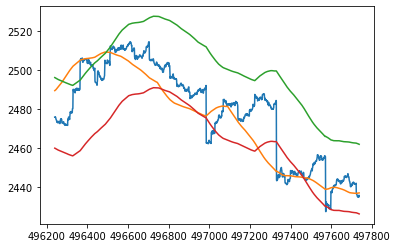

In [56]:
ax = prices_filtered[496000:497500].plot()
twap_1h_geo_1h_later[496000:497500].plot(ax=ax)
twap_1h_geo_ask[496000:497500].plot(ax=ax)
twap_1h_geo_bid[496000:497500].plot(ax=ax)

# There are select few cases where unwind value ends up being outside the bands in "normal" trading, although trading fees would take entire profit away.

# We want to prevent even the most insane jumps from printing. Use delta bw TWAP and spot. So what if we instead have:

## dB = max((spot-TWAP) * e^{ (1/T) * [E_B ] }, 0); dB is buy (long) spread
## dS = max((TWAP-spot) * e^{ (1/T) * [E_S ] }, 0); dS is sell (short) spread

In [57]:
dB = (prices_filtered*np.exp(SPREAD_X) - twap_1h_geo)
dB = dB.apply(lambda x: max(x, 0))
dB

239       15.090909
240       15.692410
241       15.866312
242       15.673407
243       15.527638
            ...    
518396    33.829128
518397    34.629117
518398    34.423515
518399    34.234038
518400    34.398050
Name: sim-53, Length: 518162, dtype: float64

In [58]:
dS = (twap_1h_geo - prices_filtered*np.exp(-SPREAD_X))
dS = dS.apply(lambda x: max(x, 0))
dS

239       17.504433
240       16.911550
241       16.740085
242       16.930051
243       17.073695
            ...    
518396     0.000000
518397     0.000000
518398     0.000000
518399     0.000000
518400     0.000000
Name: sim-53, Length: 518162, dtype: float64

In [59]:
twap_1h_geo_ask_spot_spread = twap_1h_geo + dB
twap_1h_geo_bid_spot_spread = twap_1h_geo - dS
print('twap_1h_geo_ask_spot_spread:', twap_1h_geo_ask_spot_spread)
print('twap_1h_geo_bid_spot_spread:', twap_1h_geo_bid_spot_spread)

twap_1h_geo_ask_spot_spread: 239       2253.979768
240       2254.575620
241       2254.744165
242       2254.540946
243       2254.394050
             ...     
518396    2195.094579
518397    2195.973470
518398    2195.846640
518399    2195.732025
518400    2195.970603
Name: sim-53, Length: 518162, dtype: float64
twap_1h_geo_bid_spot_spread: 239       2221.384426
240       2221.971661
241       2222.137768
242       2221.937489
243       2221.792717
             ...     
518396    2161.265451
518397    2161.344353
518398    2161.423125
518399    2161.497987
518400    2161.572553
Name: sim-53, Length: 518162, dtype: float64


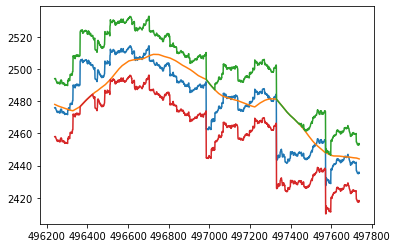

In [60]:
ax = prices_filtered[496000:497500].plot()
twap_1h_geo[496000:497500].plot(ax=ax)
twap_1h_geo_ask_spot_spread[496000:497500].plot(ax=ax)
twap_1h_geo_bid_spot_spread[496000:497500].plot(ax=ax)

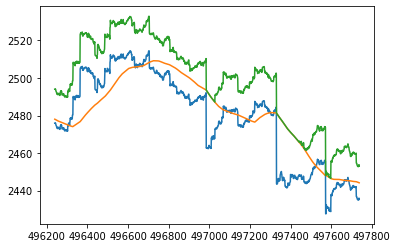

In [61]:
ax = prices_filtered[496000:497500].plot()
twap_1h_geo[496000:497500].plot(ax=ax)
twap_1h_geo_ask_spot_spread[496000:497500].plot(ax=ax)

# Ok, interesting .... will always stop at the TWAP. This isn't great. What we want is essentially the old band value to always be there. HOWEVER, when have a spike down (up), buy (sell) price stays the same BUT sell (buy) price spikes down to accomodate. So skews.

## Basically should reduce to:

## Ask: P_{t} = TWAP when TWAP > spot and = spot when TWAP < spot
## Bid: P_{t} = TWAP when TWAP < spot and = spot when TWAP > spot

## such that ...

## Ask = P_{t} * e^{E_S}
## Bid = P_{t} * e^{-E_S}

## where E_S is the spread to make it harder to make money in short term before funding kicks in -- harder to front run for users that have more info than us

In [62]:
twap_1h_geo_ask_skew = pd.concat([prices_filtered, twap_1h_geo], axis=1).max(axis=1) * np.exp(SPREAD_X)
twap_1h_geo_bid_skew = pd.concat([prices_filtered, twap_1h_geo], axis=1).min(axis=1) * np.exp(-SPREAD_X)

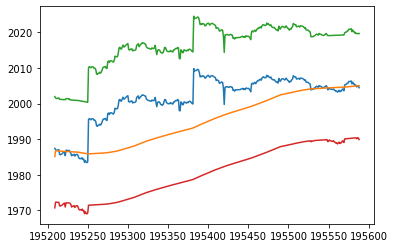

In [63]:
# Go back to the original jump ...
ax = prices_filtered[194970:195350].plot()
twap_1h_geo[194970:195350].plot(ax=ax)
twap_1h_geo_ask_skew[194970:195350].plot(ax=ax)
twap_1h_geo_bid_skew[194970:195350].plot(ax=ax)

# But isn't this susceptible to attack through manipulating the spot? Maybe?

# Let's look back at the most extreme jumps ...

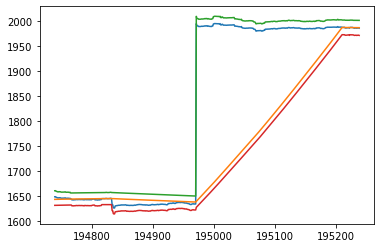

In [64]:
# Fine, but hard to see anything. Let's look at super extreme jump from 194500:195000
ax = prices_filtered[194500:195000].plot()
twap_1h_geo[194500:195000].plot(ax=ax)
twap_1h_geo_ask_skew[194500:195000].plot(ax=ax)
twap_1h_geo_bid_skew[194500:195000].plot(ax=ax)

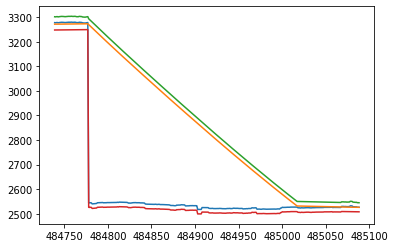

In [65]:
ax = prices_filtered[484500:484850].plot()
twap_1h_geo[484500:484850].plot(ax=ax)
twap_1h_geo_ask_skew[484500:484850].plot(ax=ax)
twap_1h_geo_bid_skew[484500:484850].plot(ax=ax)

# Definitively eliminates any chance of profit on the lag trade from the long ... but shorts will want to wait an hour for catch up in order to place next bet since they know they'll lose if they enter into a trade here.

# Problem then occurs for longs exiting? Since they get the red line but know they should wait to exit? But everyone has info spot jumped and so it's not us getting milked necessarily since they fairly made money

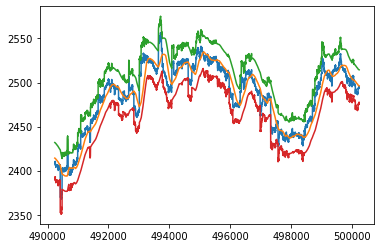

In [66]:
ax = prices_filtered[490000:500000].plot()
twap_1h_geo[490000:500000].plot(ax=ax)
twap_1h_geo_ask_skew[490000:500000].plot(ax=ax)
twap_1h_geo_bid_skew[490000:500000].plot(ax=ax)

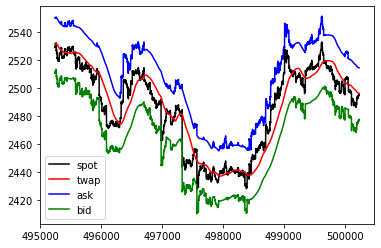

In [67]:
# zoom in ...
ax = prices_filtered[495000:500000].plot(c='k', label='spot')
twap_1h_geo[495000:500000].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[495000:500000].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew[495000:500000].plot(ax=ax, c='g', label='bid')
ax.legend()

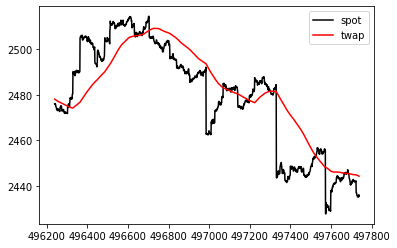

In [68]:
ax = prices_filtered[496000:497500].plot(c='k', label='spot')
twap_1h_geo[496000:497500].plot(ax=ax, c='r', label='twap')
ax.legend()

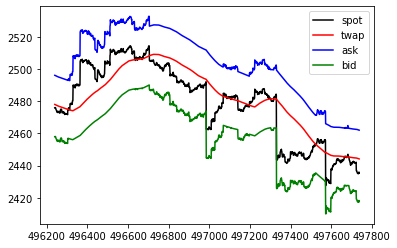

In [69]:
ax = prices_filtered[496000:497500].plot(c='k', label='spot')
twap_1h_geo[496000:497500].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[496000:497500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew[496000:497500].plot(ax=ax, c='g', label='bid')

ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_spread_vol.png')

In [70]:
print('spot entry', prices_filtered[496527-window_1h:496527-window_1h+5])
print('twap entry', twap_1h_geo[496527-window_1h:496527-window_1h+5])
print('ask entry', twap_1h_geo_ask_skew[496527-window_1h:496527-window_1h+5])
print('bid entry', twap_1h_geo_bid_skew[496527-window_1h:496527-window_1h+5])

spot entry 496526    2512.126386
496527    2512.234513
496528    2512.194264
496529    2511.817816
496530    2511.283742
Name: sim-53, dtype: float64
twap entry 496526    2495.687773
496527    2495.854993
496528    2496.023623
496529    2496.188664
496530    2496.350400
Name: sim-53, dtype: float64
ask entry 496526    2530.490030
496527    2530.598947
496528    2530.558404
496529    2530.179204
496530    2529.641226
dtype: float64
bid entry 496526    2477.576687
496527    2477.742694
496528    2477.910101
496529    2478.073944
496530    2478.234505
dtype: float64


In [71]:
print('spot exit', prices_filtered[497499:497501])
print('twap exit', twap_1h_geo[497499:497501])
print('ask exit', twap_1h_geo_ask_skew[497499:497501])
print('bid exit', twap_1h_geo_bid_skew[497499:497501])

spot exit 497738    2435.347407
497739    2435.633881
Name: sim-53, dtype: float64
twap exit 497738    2444.175897
497739    2444.125453
Name: sim-53, dtype: float64
ask exit 497738    2462.042823
497739    2461.992010
dtype: float64
bid exit 497738    2417.674208
497739    2417.958603
dtype: float64


In [72]:
print('delta spot', (2512.234513-2435.633881)/2512.234513)
print('delta twap', (2496.023623-2444.125453)/2496.023623)
print('delta short [-(ask-bid)/bid]', -(2461.992010-2477.910101)/2477.910101)

delta spot 0.030491035611371557
delta twap 0.020792339271862706
delta short [-(ask-bid)/bid] 0.006423998592029632


# Back to the original, less extreme jump plot w bid/ask spread...

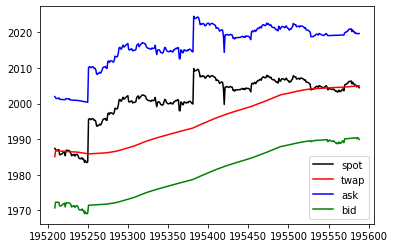

In [73]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew[194970:195350].plot(ax=ax, c='g', label='bid')

ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_spread.png')

In [74]:
print('spot at jump', prices_filtered[195010:195015])
print('twap at jump', twap_1h_geo[195010:195015])
print('ask at jump', twap_1h_geo_ask_skew[195010:195015])
print('bid at jump', twap_1h_geo_bid_skew[195010:195015])

spot at jump 195249    1983.410406
195250    1983.653382
195251    1995.482323
195252    1995.783461
195253    1995.607815
Name: sim-53, dtype: float64
twap at jump 195249    1985.893596
195250    1985.848948
195251    1985.863894
195252    1985.880668
195253    1985.891454
Name: sim-53, dtype: float64
ask at jump 195249    2000.410478
195250    2000.365504
195251    2010.069299
195252    2010.372638
195253    2010.195708
dtype: float64
bid at jump 195249    1969.016893
195250    1969.258105
195251    1971.452575
195252    1971.469228
195253    1971.479936
dtype: float64


In [75]:
print('spot 1h after jump', prices_filtered[195010+window_1h:195015+window_1h])
print('twap 1h after jump', twap_1h_geo[195010+window_1h:195015+window_1h])
print('ask 1h after jump', twap_1h_geo_ask_skew[195010+window_1h:195015+window_1h])
print('bid 1h after jump', twap_1h_geo_bid_skew[195010+window_1h:195015+window_1h])

spot 1h after jump 195489    2006.375940
195490    2006.265032
195491    2006.807187
195492    2006.988585
195493    2006.943630
Name: sim-53, dtype: float64
twap 1h after jump 195489    2002.341845
195490    2002.436412
195491    2002.483630
195492    2002.530344
195493    2002.577607
Name: sim-53, dtype: float64
ask 1h after jump 195489    2021.042548
195490    2020.930829
195491    2021.476948
195492    2021.659672
195493    2021.614387
dtype: float64
bid 1h after jump 195489    1987.810947
195490    1987.904828
195491    1987.951703
195492    1987.998078
195493    1988.044998
dtype: float64


# And for entire span of timeseries data ...

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


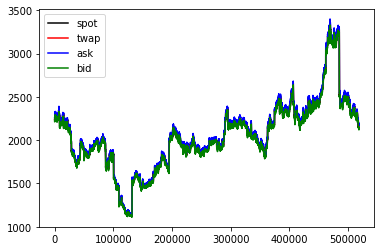

In [76]:
ax = prices_filtered.plot(c='k', label='spot')
twap_1h_geo.plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew.plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew.plot(ax=ax, c='g', label='bid')

ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_spread_all.png')

In [77]:
# 3 months of data ...
500000*15.0/86400.0

86.80555555555556

# Ok. Seems to be handling jumps nicely. Now, let's look at profitability of the long lag trade by examining ask price (long's build price) vs bid price 1h into the future (long's unwind price)

In [78]:
twap_1h_geo_ask_skew_1h_later = twap_1h_geo_ask_skew.shift(periods=-window_1h)
twap_1h_geo_bid_skew_1h_later = twap_1h_geo_bid_skew.shift(periods=-window_1h)

In [79]:
print(twap_1h_geo_ask_skew[240:260])
print(twap_1h_geo_ask_skew_1h_later[:20])

479    2291.640118
480    2290.717823
481    2291.442954
482    2290.696155
483    2290.756926
484    2290.702931
485    2290.418495
486    2290.858042
487    2290.854230
488    2290.786291
489    2291.108474
490    2290.913732
491    2290.807520
492    2290.883919
493    2290.909398
494    2290.396761
495    2290.415955
496    2293.653069
497    2293.466396
498    2293.740934
dtype: float64
239    2291.640118
240    2290.717823
241    2291.442954
242    2290.696155
243    2290.756926
244    2290.702931
245    2290.418495
246    2290.858042
247    2290.854230
248    2290.786291
249    2291.108474
250    2290.913732
251    2290.807520
252    2290.883919
253    2290.909398
254    2290.396761
255    2290.415955
256    2293.653069
257    2293.466396
258    2293.740934
dtype: float64


In [80]:
# Look at long scalp lag trade PnL. Compare the ask (long's build price) with the time-shifted bid (long's unwind price)
dp_long_scalp_skew = twap_1h_geo_bid_skew_1h_later / twap_1h_geo_ask_skew - 1
dp_long_scalp_skew[:100]

239   -0.006455
240   -0.006387
241   -0.006318
242   -0.006247
243   -0.006180
         ...   
334   -0.009292
335   -0.008935
336   -0.009247
337   -0.009473
338   -0.009414
Length: 100, dtype: float64

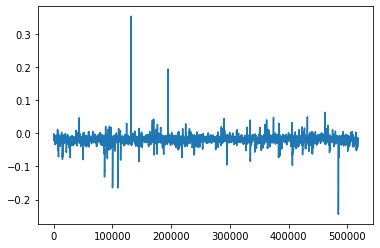

In [81]:
dp_long_scalp_skew.plot()

# Hmm how is there a positive 0.3 price delta? Zoom in ...

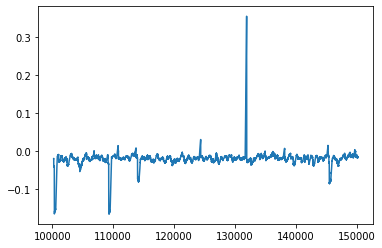

In [82]:
dp_long_scalp_skew[100000:150000].plot()

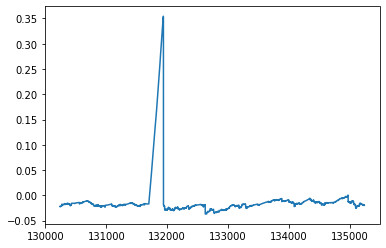

In [83]:
dp_long_scalp_skew[130000:135000].plot()

# Looks weird. Examine price data around there ...

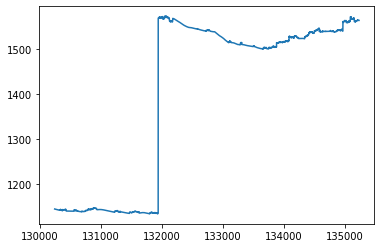

In [84]:
twap_1h_geo_ask_skew[130000:135000].plot()

# Oh, it's my time shift? Since user got in RIGHT before jump. so of course they'll make money. Check to be sure

In [85]:
print(twap_1h_geo_ask_skew[131700:131702])

131939    1137.090463
131940    1569.021661
dtype: float64


In [86]:
dp_long_scalp_skew[131700:131702]

131939    0.353228
131940   -0.019422
dtype: float64

# Ok good. Confirmed - only made money by getting in BEFORE jump occurs. After jump occurs, 1h scalp is no longer profitable. Still issues with manipulation, but this requires knowing price will jump. Either have to manipulate the price to do this (COA analysis) or have info on jump prior to it happening.

## Do we want market impact fees to prevent the latter?

# Check from plot with bands ...

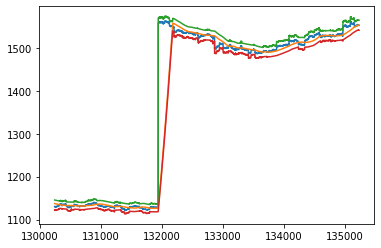

In [87]:
ax = prices_filtered[130000:135000].plot()
twap_1h_geo[130000:135000].plot(ax=ax)
twap_1h_geo_ask_skew[130000:135000].plot(ax=ax)
twap_1h_geo_bid_skew[130000:135000].plot(ax=ax)

# Zoom in ...

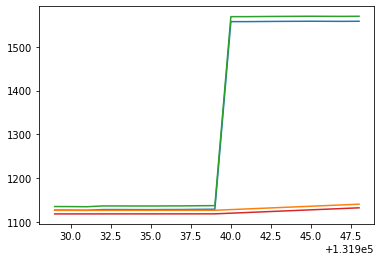

In [88]:
ax = prices_filtered[131690:131710].plot()
twap_1h_geo[131690:131710].plot(ax=ax)
twap_1h_geo_ask_skew[131690:131710].plot(ax=ax)
twap_1h_geo_bid_skew[131690:131710].plot(ax=ax)

In [89]:
# entry price still higher at moment of jump
(1569.021661 - 1137.090463) / 1137.090463

0.37985649519953807

# Look at long entry price (ask) vs long exit price (bid 1h later) on the jump up in price

## => Will only be profitable if user enters long trade BEFORE jump. Ask > bid+1h after jump

### ... suggests need to be manipulating spot OR trader knows jump is coming

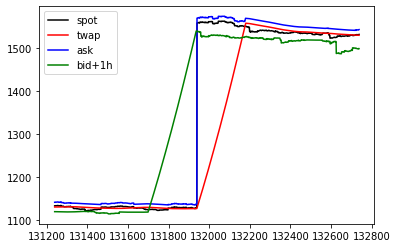

In [90]:
ax = prices_filtered[131000:132500].plot(c='k', label='spot')
twap_1h_geo[131000:132500].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[131000:132500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_1h_later[131000:132500].plot(ax=ax, c='g', label='bid+1h')
ax.legend()

# Look at short entry price (bid) vs short exit price (ask 1h later) on the jump up in price

## => Will never be profitable. Ask+1h > bid

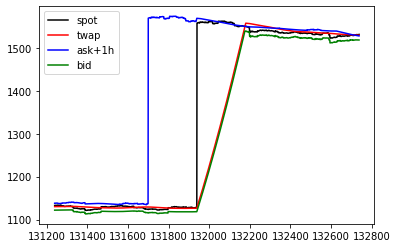

In [91]:
ax = prices_filtered[131000:132500].plot(c='k', label='spot')
twap_1h_geo[131000:132500].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew_1h_later[131000:132500].plot(ax=ax, c='b', label='ask+1h')
twap_1h_geo_bid_skew[131000:132500].plot(ax=ax, c='g', label='bid')
ax.legend()

# What's the average of the pnl on the trade. Careful here since not normally distributed so sample mean, sample variance aren't good to use

In [92]:
dp_long_scalp_skew_sample_mean = dp_long_scalp_skew.sum() / len(dp_long_scalp_skew)
dp_long_scalp_skew_sample_variance = ((dp_long_scalp_skew - dp_long_scalp_skew_sample_mean)**2).sum() / len(dp_long_scalp_skew)
print('sample mean', dp_long_scalp_skew_sample_mean)
print('sample variance', dp_long_scalp_skew_sample_variance)

sample mean -0.018517701378862626
sample variance 0.00018433876776685732


# And for the short lag trade?

In [93]:
# Look at short scalp lag trade PnL. Compare the bid (short's build price) with the time-shifted ask (short's unwind price)
dp_short_scalp_skew = 1 - twap_1h_geo_ask_skew_1h_later / twap_1h_geo_bid_skew
dp_short_scalp_skew[:100]

239   -0.031627
240   -0.030939
241   -0.031189
242   -0.030945
243   -0.031040
         ...   
334   -0.030714
335   -0.030692
336   -0.030492
337   -0.030547
338   -0.030697
Length: 100, dtype: float64

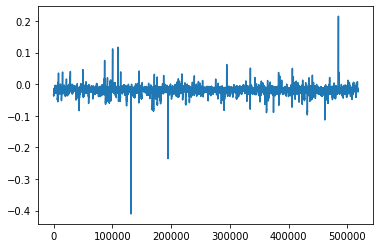

In [94]:
dp_short_scalp_skew.plot()

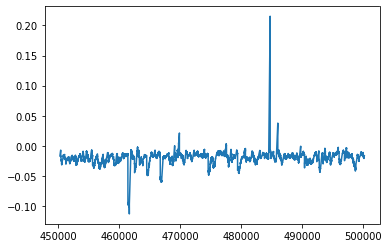

In [95]:
dp_short_scalp_skew[450000:500000].plot()

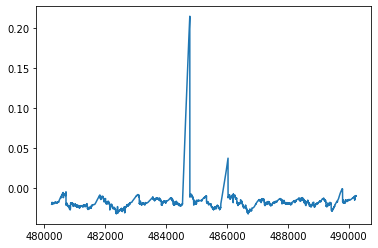

In [96]:
dp_short_scalp_skew[480000:490000].plot()

# Make sure short trade with 20% pnl needs to be entered into BEFORE jump occurred

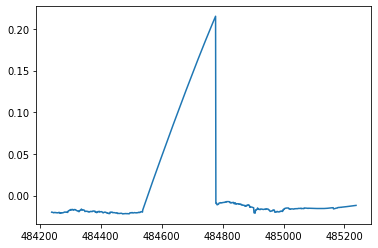

In [97]:
dp_short_scalp_skew[484000:485000].plot()

In [98]:
dp_short_scalp_skew[484000:485000]

484239   -0.019961
484240   -0.020155
484241   -0.019958
484242   -0.020133
484243   -0.020069
            ...   
485234   -0.011973
485235   -0.011927
485236   -0.011877
485237   -0.011826
485238   -0.011781
Length: 1000, dtype: float64

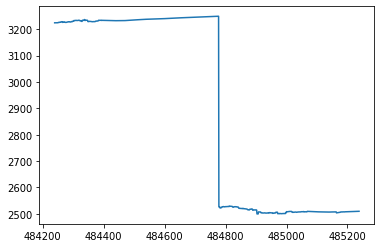

In [99]:
twap_1h_geo_bid_skew[484000:485000].plot()

In [100]:
print(twap_1h_geo_bid_skew[484538:484540])

484777    3249.480660
484778    2526.076849
dtype: float64


In [101]:
-(2526.076849 - 3249.480660) / 3249.480660

0.22262136220869216

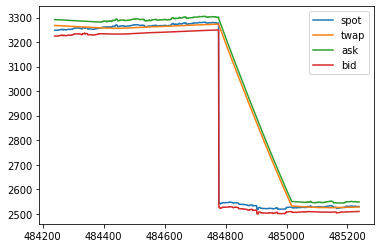

In [102]:
ax = prices_filtered[484000:485000].plot(label='spot')
twap_1h_geo[484000:485000].plot(ax=ax, label='twap')
twap_1h_geo_ask_skew[484000:485000].plot(ax=ax, label='ask')
twap_1h_geo_bid_skew[484000:485000].plot(ax=ax, label='bid')
ax.legend()

In [103]:
dp_short_scalp_skew_sample_mean = dp_short_scalp_skew.sum() / len(dp_short_scalp_skew)
dp_short_scalp_skew_sample_variance = ((dp_short_scalp_skew - dp_short_scalp_skew_sample_mean)**2).sum() / len(dp_short_scalp_skew)
print('sample mean', dp_short_scalp_skew_sample_mean)
print('sample variance', dp_short_scalp_skew_sample_variance)

sample mean -0.01903631428800741
sample variance 0.0002384172226334628


# OK. Bid adjusts properly. Looks good for short trade.

# Look at long entry price (ask) vs long exit price (bid 1h later) on the jump down in price

## => Will never be profitable. ask > bid+1h

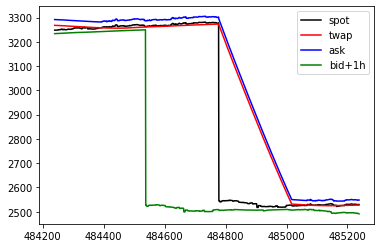

In [104]:
ax = prices_filtered[484000:485000].plot(c='k', label='spot')
twap_1h_geo[484000:485000].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[484000:485000].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_1h_later[484000:485000].plot(ax=ax, c='g', label='bid+1h')
ax.legend()

# Look at short entry price (bid) vs short exit price (ask 1h later) on the jump up in price

## => Will only be profitable if user enters short trade BEFORE jump. Ask+1h > bid after jump

### ... suggests need to be manipulating spot OR trader knows jump is coming

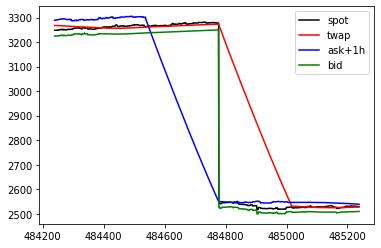

In [105]:
ax = prices_filtered[484000:485000].plot(c='k', label='spot')
twap_1h_geo[484000:485000].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew_1h_later[484000:485000].plot(ax=ax, c='b', label='ask+1h')
twap_1h_geo_bid_skew[484000:485000].plot(ax=ax, c='g', label='bid')
ax.legend()

# What about if we compare with the non-skewed approach?

## As in, where diff with spot isn't accounted for and we just have bands

In [106]:
twap_1h_geo_ask_1h_later = twap_1h_geo_ask.shift(periods=-window_1h)
twap_1h_geo_bid_1h_later = twap_1h_geo_bid.shift(periods=-window_1h)

In [107]:
print(twap_1h_geo_ask[240:260])
print(twap_1h_geo_ask_1h_later[:20])

479    2273.575961
480    2273.726623
481    2273.879586
482    2274.030324
483    2274.181942
484    2274.343914
485    2274.506417
486    2274.687491
487    2274.869002
488    2275.051531
489    2275.231639
490    2275.411111
491    2275.590810
492    2275.769565
493    2275.948084
494    2276.126046
495    2276.303252
496    2276.498537
497    2276.693118
498    2276.888693
Name: sim-53, dtype: float64
239    2273.575961
240    2273.726623
241    2273.879586
242    2274.030324
243    2274.181942
244    2274.343914
245    2274.506417
246    2274.687491
247    2274.869002
248    2275.051531
249    2275.231639
250    2275.411111
251    2275.590810
252    2275.769565
253    2275.948084
254    2276.126046
255    2276.303252
256    2276.498537
257    2276.693118
258    2276.888693
Name: sim-53, dtype: float64


In [108]:
dp_long_scalp = twap_1h_geo_bid_1h_later / twap_1h_geo_ask - 1
dp_long_scalp

239      -0.006455
240      -0.006387
241      -0.006318
242      -0.006247
243      -0.006180
            ...   
518396         NaN
518397         NaN
518398         NaN
518399         NaN
518400         NaN
Name: sim-53, Length: 518162, dtype: float64

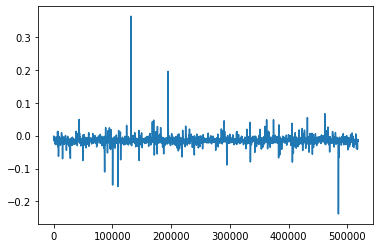

In [109]:
dp_long_scalp.plot()

In [110]:
dp_long_scalp_sample_mean = dp_long_scalp.sum() / len(dp_long_scalp)
dp_long_scalp_sample_variance = ((dp_long_scalp - dp_long_scalp_sample_mean)**2).sum() / len(dp_long_scalp)
print('sample mean', dp_long_scalp_sample_mean)
print('sample variance', dp_long_scalp_sample_variance)

sample mean -0.014388536605569505
sample variance 0.0001691201138230575


# Still not bad actually. But in reality would likely be worse given smart traders

# Test against adam's bump up, which seems to mimic a spot manipulation.

# Two cases to consider:

## 1. I enter a long w max leverage and increase spot price significantly over a few blocks

## 2. I manipulate spot price up over a few blocks and enter a short at the top

## In either case, can I EXIT with substantial profit after a few blocks << avg window?

In [111]:
def rsign():
    return 1 if np.random.random() < 0.5 else -1

In [112]:
class RandomFeed:
    def __init__(self,
                 vol,
                 px: float,
                 #mid,
                 window: int,
                 dist_args=None,
                 distribution=np.random.normal,
                 **kwargs):
        '''Args:
            vol: volatility
            px: beginning px for history
            mid: the market id
            window: the length of the windowSize for TWAP
            dist_args: args that go into the distribution;
                for a gaussian, the center and the std
            
        '''

        self.distribution = distribution
        self.vol = vol
        self.px = px
        #self.id = mid
        self.window = window
        self.dist_args = (0,1)
        self.block_times = [0]
        self.cumul_px = [px]
        self.prices = [px]
        self.twaps = []
        self.returns = []
        self.kwargs = kwargs

    @staticmethod
    def block_time():
        # time it took to mine ith block in seconds
        return 13.23 + rsign()*np.random.rand()
    
    def get_returns(self, arr:np.array):
        # to get returns of any series
        arr_init = np.roll(arr, 1)
        returns = (arr/arr_init) - 1
        return returns[1:] #delete spurious return
    
    def get_twap(self, i:int, window=-1):
        if window < 0:
            window = self.window
        #ith block , window is number of blocks we average over
        if i < self.window:
            return
        else:
            return (self.cumul_px[i] - self.cumul_px[i - window])/window
    
    def update(self, modify_vol=False, **kwargs):      
        #WARNING!  an in-place method that mutates the class                                             
                                                     
        delta = self.get_delta(**kwargs)
        self.px += (self.vol * delta) 
        
        if self.px <= 0:
             raise Exception('the market price went to zero')
               
        block_time = self.block_time()
        
        #here we populate all the dynamic lists and 
        self.prices.append(self.px)
        self.cumul_px.append(self.cumul_px[-1] + block_time*self.px)
        self.block_times.append(block_time)
        self.returns.append(self.prices[-1]/self.prices[-2] - 1)
        
        if modify_vol:
            self.vol = kwargs['vol']

    def get_delta(self, **kwargs):
        #if the % moves are small relative to self.px, then the trader results will be unrealistic. 
        #px needs to move as a % of the price level to reflect compounding
        if kwargs.get('pct', False):
            standard_dev = self.vol*self.px/100   
            center = standard_dev/10  #self.dist_args[0]
            args = (center, standard_dev)
            delta = self.distribution(*args)  # if self.dist_args else self.distribution()    
        else:
            delta = self.distribution(*self.dist_args) if self.dist_args else self.distribution()
        delta = self.distribution(*self.dist_args) if self.dist_args else self.distribution()
        return delta  
    


In [113]:
np.random.seed(1)
markets = {
    0:RandomFeed(vol=1, px = 1e3, window=50, dist_args=(0, 1)),
    #1:RandomFeed(vol=1, px = 1e3, window=150, dist_args=(0, 1)),
    #2:RandomFeed(vol=1, px = 1e3, window=300, dist_args=(0, 1)),
    #3:RandomFeed(vol=1, px = 1e3, window=150, dist_args=(0, 1)),
    }
m = markets[0]
for _ in range(10000):
    m.update()

In [114]:
### test your get_returns method
rets = m.get_returns(m.prices)
all(map(np.isclose, m.returns, rets))

True

In [115]:
twaps = np.array([m.get_twap(i) for i in range(50,10000)])

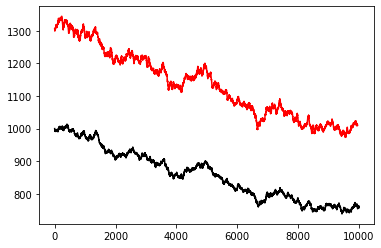

In [116]:
plt.plot(m.prices, c='k')
plt.plot(twaps/10, c='r')

# The TWAP and the spot price are very different numbers , what about the returns?

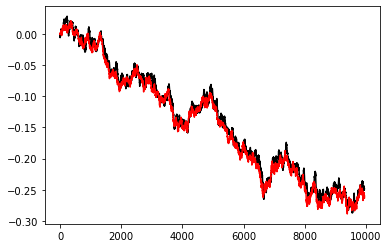

In [117]:
twap_crets = np.cumsum(m.get_returns(twaps))
crets = np.cumsum(m.returns[m.window:])

plt.plot(twap_crets, c='k')
plt.plot(crets, c='r')

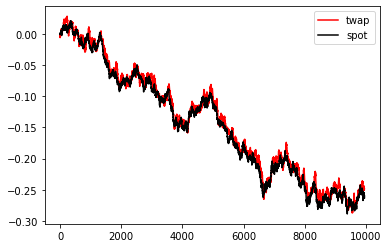

In [118]:
plt.plot(twap_crets, c='r', label='twap')
plt.plot(crets, c='k', label='spot')
plt.legend()

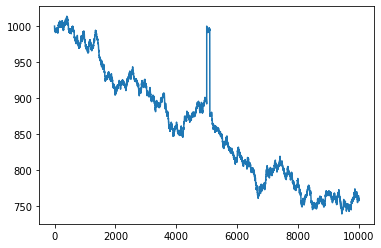

In [119]:
prices_w_shock_norm = m.prices.copy()
shock_block = 5000
for i in range(100):
    prices_w_shock_norm[shock_block + i] = prices_w_shock_norm[i]  
plt.plot(prices_w_shock_norm)

# Recalculate TWAP here from prices_w_shock since something's up w scale on Adam's TWAP

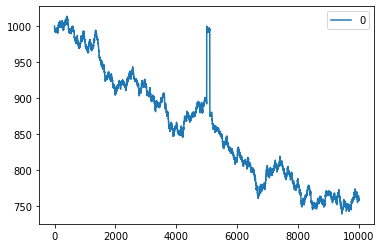

In [120]:
df_prices_w_shock = pd.DataFrame(data=prices_w_shock_norm)
df_prices_w_shock.plot(label='spot')

In [121]:
window_40 = 40
window_50 = 50
window_150 = 150
window_240 = 240

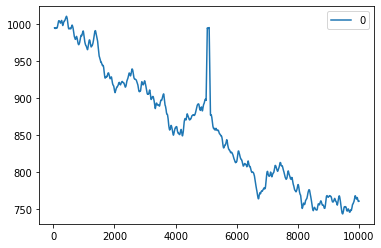

In [122]:
df_twap_40_geo_w_shock = df_prices_w_shock.rolling(window=window_40).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_40), raw=True)
df_twap_40_geo_w_shock = df_twap_40_geo_w_shock[~df_twap_40_geo_w_shock.isnull()]
df_twap_40_geo_w_shock.plot()

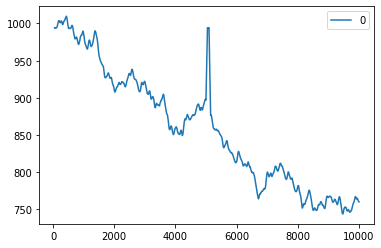

In [123]:
df_twap_50_geo_w_shock = df_prices_w_shock.rolling(window=window_50).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_50), raw=True)
df_twap_50_geo_w_shock = df_twap_50_geo_w_shock[~df_twap_50_geo_w_shock.isnull()]
df_twap_50_geo_w_shock.plot()

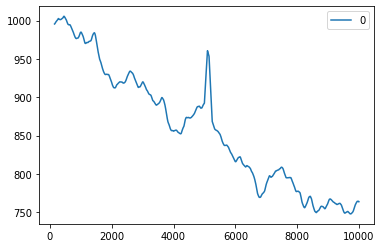

In [124]:
df_twap_150_geo_w_shock = df_prices_w_shock.rolling(window=window_150).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_150), raw=True)
df_twap_150_geo_w_shock = df_twap_150_geo_w_shock[~df_twap_150_geo_w_shock.isnull()]
df_twap_150_geo_w_shock.plot()

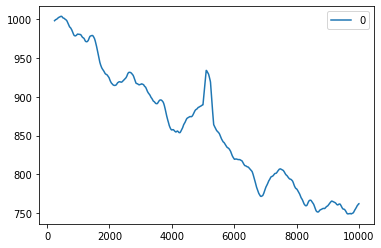

In [125]:
df_twap_240_geo_w_shock = df_prices_w_shock.rolling(window=window_240).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_240), raw=True)
df_twap_240_geo_w_shock = df_twap_240_geo_w_shock[~df_twap_240_geo_w_shock.isnull()]
df_twap_240_geo_w_shock.plot()

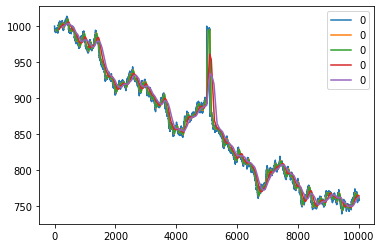

In [126]:
ax = df_prices_w_shock.plot(label='spot')
df_twap_40_geo_w_shock.plot(ax=ax, label='twap-40')
df_twap_50_geo_w_shock.plot(ax=ax, label='twap-50')
df_twap_150_geo_w_shock.plot(ax=ax, label='twap-150')
df_twap_240_geo_w_shock.plot(ax=ax, label='twap-240')
ax.legend()

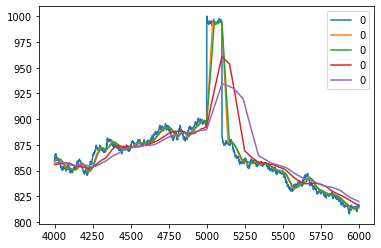

In [127]:
ax = df_prices_w_shock[4000:6000].plot(label='spot')
df_twap_40_geo_w_shock[4000:6000].plot(ax=ax, label='twap-40')
df_twap_50_geo_w_shock[4000:6000].plot(ax=ax, label='twap-50')
df_twap_150_geo_w_shock[4000:6000].plot(ax=ax, label='twap-150')
df_twap_240_geo_w_shock[4000:6000].plot(ax=ax, label='twap-240')
ax.legend()

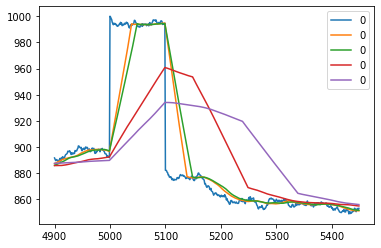

In [128]:
shock_time = 5000
ax = df_prices_w_shock[shock_time-100:shock_time+450].plot(label='spot')
df_twap_40_geo_w_shock[shock_time-100:shock_time+450].plot(ax=ax, label='twap-40')
df_twap_50_geo_w_shock[shock_time-100:shock_time+450].plot(ax=ax, label='twap-50')
df_twap_150_geo_w_shock[shock_time-100:shock_time+450].plot(ax=ax, label='twap-150')
df_twap_240_geo_w_shock[shock_time-100:shock_time+450].plot(ax=ax, label='twap-240')
ax.legend()

# Analyze the most extreme lag case with window of 240 ...

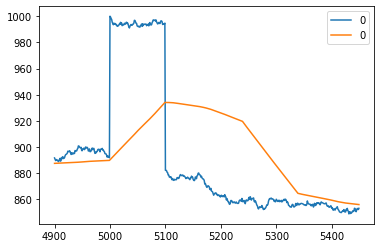

In [129]:
ax = df_prices_w_shock[shock_time-100:shock_time+450].plot(label='spot')
df_twap_240_geo_w_shock[shock_time-100:shock_time+450].plot(ax=ax, label='twap-240')
ax.legend()

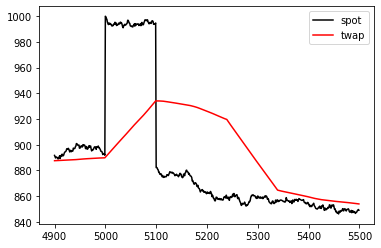

In [130]:
plt.plot(df_prices_w_shock[shock_time-100:shock_time+500], c='k', label='spot')
plt.plot(df_twap_240_geo_w_shock[shock_time-100:shock_time+500], c='r', label='twap')

plt.legend()
plt.savefig('png/sim_twap_attack.png')

# Calculate the bid/ask with spread using skew formula:

## Ask: P_{t} = TWAP when TWAP > spot and = spot when TWAP < spot
## Bid: P_{t} = TWAP when TWAP < spot and = spot when TWAP > spot

## such that ...

## Ask = P_{t} * e^{E_S}
## Bid = P_{t} * e^{-E_S}

In [131]:
df_twap_240_geo_w_shock_ask_skew = pd.concat([df_prices_w_shock, df_twap_240_geo_w_shock], axis=1).max(axis=1) * np.exp(SPREAD_X)
df_twap_240_geo_w_shock_bid_skew = pd.concat([df_prices_w_shock, df_twap_240_geo_w_shock], axis=1).min(axis=1) * np.exp(-SPREAD_X)

In [132]:
SPREAD_X

0.007283411446258746

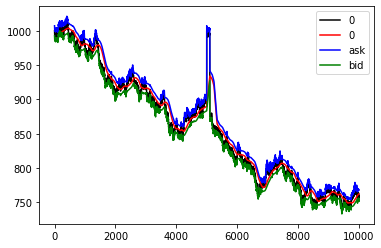

In [133]:
ax = df_prices_w_shock.plot(c='k', label='spot')
df_twap_240_geo_w_shock.plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_shock_ask_skew.plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_bid_skew.plot(ax=ax, c='g', label='bid')
ax.legend()

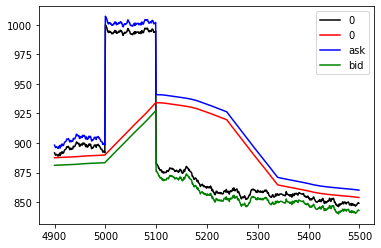

In [134]:
ax = df_prices_w_shock[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_shock[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_shock_ask_skew[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_bid_skew[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid')
ax.legend()

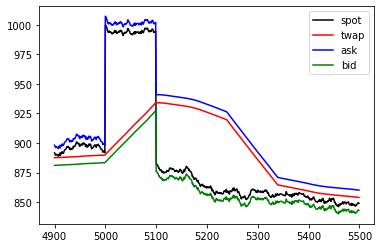

In [135]:
plt.plot(df_prices_w_shock[shock_time-100:shock_time+500], c='k', label='spot')
plt.plot(df_twap_240_geo_w_shock[shock_time-100:shock_time+500], c='r', label='twap')
plt.plot(df_twap_240_geo_w_shock_ask_skew[shock_time-100:shock_time+500], c='b', label='ask')
plt.plot(df_twap_240_geo_w_shock_bid_skew[shock_time-100:shock_time+500], c='g', label='bid')

plt.legend()
plt.savefig('png/sim_twap_attack_spread.png')

# Ask -- Entry price for longs, Exit price for shorts
# Bid -- Entry price for shorts, Exit price for longs

# Analyze PnL if I do attack trades 1. & 2. above over 240 block window.

## Do this by looking at PnL of long and of short trade (similar to before with mc sim path), exiting after 1h in trade

## 1. long: entry at ask, exit at bid
## 2. short: entry at bid, exit at ask

In [136]:
df_twap_240_geo_w_shock_ask_skew_1h_later = df_twap_240_geo_w_shock_ask_skew.shift(periods=-window_240)
df_twap_240_geo_w_shock_bid_skew_1h_later = df_twap_240_geo_w_shock_bid_skew.shift(periods=-window_240)

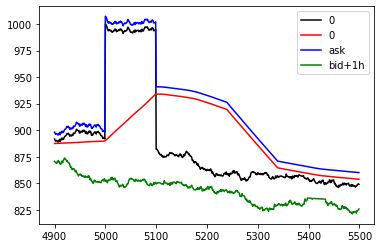

In [137]:
# trade 1 (long): ... yes it looks impossible to profit since blue > green_1h_later for entire graph
ax = df_prices_w_shock[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_shock[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_shock_ask_skew[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_bid_skew_1h_later[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid+1h')
ax.legend()

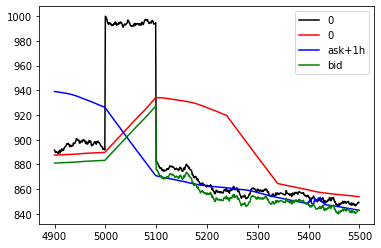

In [138]:
# trade 2 (short): After halfway through the spot manipulation, if I enter into a short, I would have made ~ 4% profit ... due to drift down after?
ax = df_prices_w_shock[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_shock[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_shock_ask_skew_1h_later[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask+1h')
df_twap_240_geo_w_shock_bid_skew[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid')
ax.legend()

# With trade 2 here I made 4% from shorting immediately after spike back down. Cost to produce spike on spot for 20M pool is about 50M.

# Cost of attack including capital to overcome 50M sunk cost with offered max leverage of 5x is 50M/0.2 = 250M

## Is this 4% profit simply due to drift down after? or is it an attack?

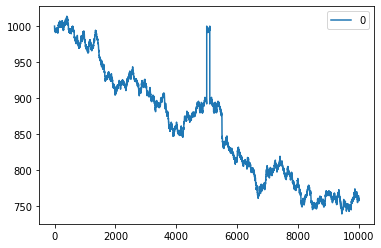

In [139]:
prices_w_shock_and_plateau = df_prices_w_shock[0].to_numpy().copy()
prices_w_shock_and_plateau
for i in range(400):
    prices_w_shock_and_plateau[shock_block + 100 + i] = prices_w_shock_and_plateau[shock_block - i]

df_prices_w_shock_and_plateau = pd.DataFrame(data=prices_w_shock_and_plateau)    
df_prices_w_shock_and_plateau.plot()

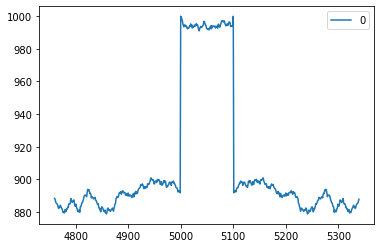

In [140]:
df_prices_w_shock_and_plateau[shock_block-240:shock_block+100+240].plot()

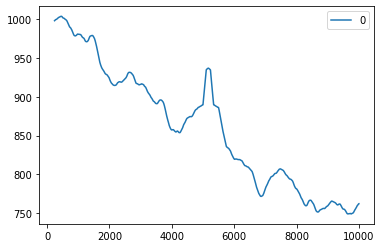

In [141]:
df_twap_240_geo_w_shock_and_plateau = df_prices_w_shock_and_plateau.rolling(window=window_240).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_240), raw=True)
df_twap_240_geo_w_shock_and_plateau = df_twap_240_geo_w_shock_and_plateau[~df_twap_240_geo_w_shock_and_plateau.isnull()]
df_twap_240_geo_w_shock_and_plateau.plot()

In [142]:
df_twap_240_geo_w_shock_and_plateau_ask_skew = pd.concat([df_prices_w_shock_and_plateau, df_twap_240_geo_w_shock_and_plateau], axis=1).max(axis=1) * np.exp(SPREAD_X)
df_twap_240_geo_w_shock_and_plateau_bid_skew = pd.concat([df_prices_w_shock_and_plateau, df_twap_240_geo_w_shock_and_plateau], axis=1).min(axis=1) * np.exp(-SPREAD_X)

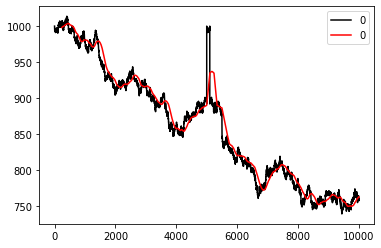

In [143]:
ax = df_prices_w_shock_and_plateau.plot(c='k', label='spot')
df_twap_240_geo_w_shock_and_plateau.plot(ax=ax, c='r', label='twap')
ax.legend()

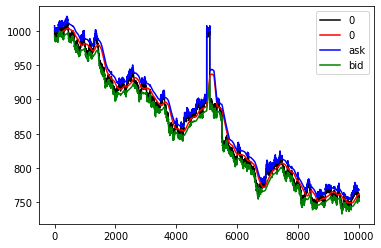

In [144]:
ax = df_prices_w_shock_and_plateau.plot(c='k', label='spot')
df_twap_240_geo_w_shock_and_plateau.plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_shock_and_plateau_ask_skew.plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_and_plateau_bid_skew.plot(ax=ax, c='g', label='bid')
ax.legend()

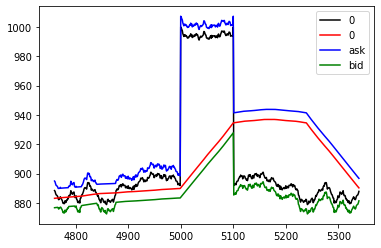

In [145]:
# zoom in
ax = df_prices_w_shock_and_plateau[shock_block-240:shock_block+100+240].plot(c='k', label='spot')
df_twap_240_geo_w_shock_and_plateau[shock_block-240:shock_block+100+240].plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_shock_and_plateau_ask_skew[shock_block-240:shock_block+100+240].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_and_plateau_bid_skew[shock_block-240:shock_block+100+240].plot(ax=ax, c='g', label='bid')
ax.legend()

In [146]:
# timeshift bid/ask values to check pnl ...
df_twap_240_geo_w_shock_and_plateau_ask_skew_1h_later = df_twap_240_geo_w_shock_and_plateau_ask_skew.shift(periods=-window_240)
df_twap_240_geo_w_shock_and_plateau_bid_skew_1h_later = df_twap_240_geo_w_shock_and_plateau_bid_skew.shift(periods=-window_240)

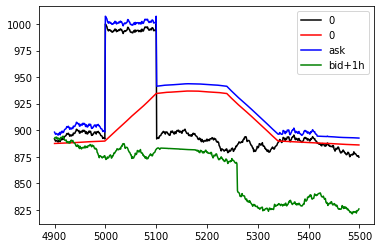

In [147]:
# trade 1 (long): ... yes still looks impossible to profit
ax = df_prices_w_shock_and_plateau[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_shock_and_plateau[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_shock_and_plateau_ask_skew[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_and_plateau_bid_skew_1h_later[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid+1h')
ax.legend()

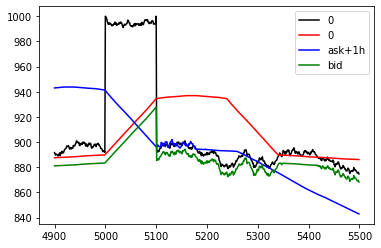

In [148]:
# trade 2 (short): Still ... After halfway through the spot manipulation, if I enter into a short, I would have made ~ 4% profit ... due to drift down after?
ax = df_prices_w_shock_and_plateau[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_shock_and_plateau[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_shock_and_plateau_ask_skew_1h_later[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask+1h')
df_twap_240_geo_w_shock_and_plateau_bid_skew[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid')
ax.legend()

In [149]:
# PnL is about 3.30% profit
print('bid', df_twap_240_geo_w_shock_and_plateau_bid_skew[shock_time+99])
print('ask (1h later)', df_twap_240_geo_w_shock_and_plateau_ask_skew_1h_later[shock_time+99])
print('pnl', -(df_twap_240_geo_w_shock_and_plateau_ask_skew_1h_later[shock_time+99] - df_twap_240_geo_w_shock_and_plateau_bid_skew[shock_time+99]) / df_twap_240_geo_w_shock_and_plateau_bid_skew[shock_time+99])

bid 927.2804917837719
ask (1h later) 896.7052258818936
pnl 0.032973049873034545


In [150]:
print('cost of manipulation on $20M spot pool with max 5x leverage for 100 block 12% jump (in $M):', 100*(20/2)*(1000.0-891.77)/891.77)
print('cost of attack on $20M spot pool with max 5x leverage for 100 block 12% jump (in $M):', 100*(20/2)*(np.sqrt(1+(1000.0-891.77)/891.77)-1) * (1 + 1/(0.033*5.0)))

cost of manipulation on $20M spot pool with max 5x leverage for 100 block 12% jump (in $M): 121.36537447996683
cost of attack on $20M spot pool with max 5x leverage for 100 block 12% jump (in $M): 416.1902961540871


# Price delta short gets from manipulating the spot then shorting right before stop manipulation is about 3.3% here. To do this profitably, costs upfront about 400M in this example.

# What if shock only happens over e.g. 10 blocks? ... goes from 50M to 5M to manip spot. 

In [151]:
df_prices_w_shock_and_plateau[shock_time-1: shock_time+1]

0
4999   891.770167
5000  1000.000000

In [152]:
print((1000.0-891.77)/891.77)

0.12136537447996683


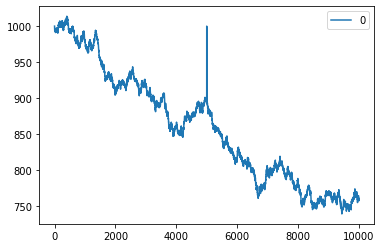

In [153]:
prices_w_short_shock = m.prices.copy()
shock_block = 5000
# 10 blocks is about 2-2.5 min
for i in range(10):
    prices_w_short_shock[shock_block + i] = prices_w_short_shock[i]
df_prices_w_short_shock = pd.DataFrame(data=prices_w_short_shock)    
df_prices_w_short_shock.plot()

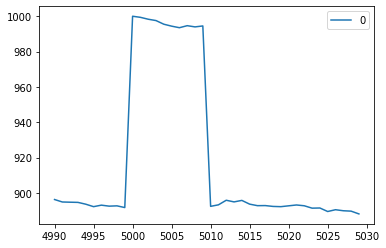

In [154]:
df_prices_w_short_shock[shock_block-10:shock_block+30].plot()

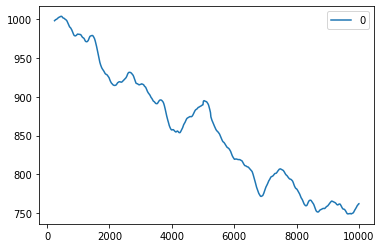

In [155]:
df_twap_240_geo_w_short_shock = df_prices_w_short_shock.rolling(window=window_240).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_240), raw=True)
df_twap_240_geo_w_short_shock = df_twap_240_geo_w_short_shock[~df_twap_240_geo_w_short_shock.isnull()]
df_twap_240_geo_w_short_shock.plot()

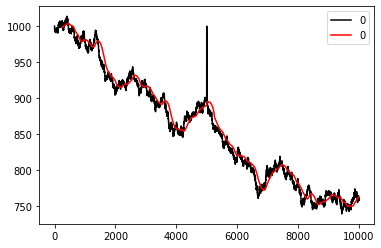

In [156]:
ax = df_prices_w_short_shock.plot(c='k', label='spot')
df_twap_240_geo_w_short_shock.plot(ax=ax, c='r', label='twap')
ax.legend()

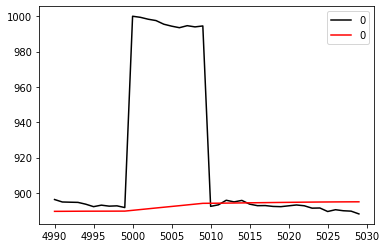

In [157]:
ax = df_prices_w_short_shock[shock_block-10:shock_block+30].plot(c='k', label='spot')
df_twap_240_geo_w_short_shock[shock_block-10:shock_block+30].plot(ax=ax, c='r', label='twap')
ax.legend()

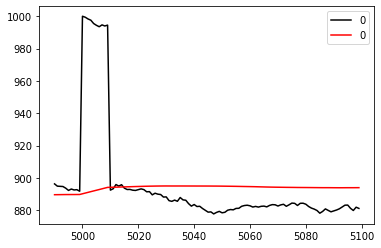

In [158]:
ax = df_prices_w_short_shock[shock_block-10:shock_block+100].plot(c='k', label='spot')
df_twap_240_geo_w_short_shock[shock_block-10:shock_block+100].plot(ax=ax, c='r', label='twap')
ax.legend()

In [159]:
df_twap_240_geo_w_short_shock_ask_skew = pd.concat([df_prices_w_short_shock, df_twap_240_geo_w_short_shock], axis=1).max(axis=1) * np.exp(SPREAD_X)
df_twap_240_geo_w_short_shock_bid_skew = pd.concat([df_prices_w_short_shock, df_twap_240_geo_w_short_shock], axis=1).min(axis=1) * np.exp(-SPREAD_X)

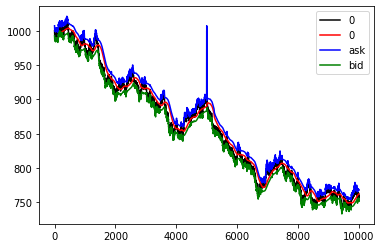

In [160]:
ax = df_prices_w_short_shock.plot(c='k', label='spot')
df_twap_240_geo_w_short_shock.plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_short_shock_ask_skew.plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_shock_bid_skew.plot(ax=ax, c='g', label='bid')
ax.legend()

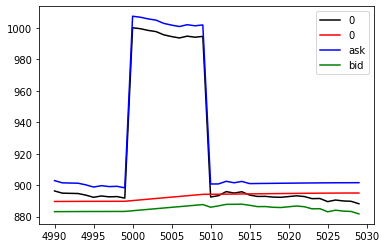

In [161]:
# zoom in
ax = df_prices_w_short_shock[shock_block-10:shock_block+30].plot(c='k', label='spot')
df_twap_240_geo_w_short_shock[shock_block-10:shock_block+30].plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_short_shock_ask_skew[shock_block-10:shock_block+30].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_shock_bid_skew[shock_block-10:shock_block+30].plot(ax=ax, c='g', label='bid')
ax.legend()

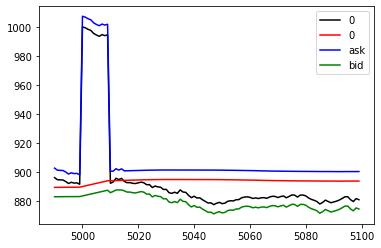

In [162]:
ax = df_prices_w_short_shock[shock_block-10:shock_block+100].plot(c='k', label='spot')
df_twap_240_geo_w_short_shock[shock_block-10:shock_block+100].plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_short_shock_ask_skew[shock_block-10:shock_block+100].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_shock_bid_skew[shock_block-10:shock_block+100].plot(ax=ax, c='g', label='bid')
ax.legend()

# Timelag to check whether the short leg of the trade on shorter spot manip is still profitable

In [163]:
df_twap_240_geo_w_short_shock_ask_skew_1h_later = df_twap_240_geo_w_short_shock_ask_skew.shift(periods=-window_240)
df_twap_240_geo_w_short_shock_bid_skew_1h_later = df_twap_240_geo_w_short_shock_bid_skew.shift(periods=-window_240)

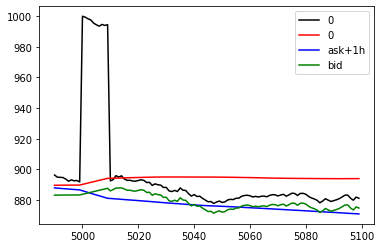

In [164]:
ax = df_prices_w_short_shock[shock_time-10:shock_time+100].plot(c='k', label='spot')
df_twap_240_geo_w_short_shock[shock_time-10:shock_time+100].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_short_shock_ask_skew_1h_later[shock_time-10:shock_time+100].plot(ax=ax, c='b', label='ask+1h')
df_twap_240_geo_w_short_shock_bid_skew[shock_time-10:shock_time+100].plot(ax=ax, c='g', label='bid')
ax.legend()

# PnL for scalp over shorter duration of 2.5min is only about 0.74%. Likely not worth it...

In [165]:
print('bid (short entry)', df_twap_240_geo_w_short_shock_bid_skew[shock_time+10-1])
print('ask+1h (short exit)', df_twap_240_geo_w_short_shock_ask_skew_1h_later[shock_time+10-1])
print('pnl (short 1h scalp)', -(df_twap_240_geo_w_short_shock_ask_skew_1h_later[shock_time+10-1] - df_twap_240_geo_w_short_shock_bid_skew[shock_time+10-1])/df_twap_240_geo_w_short_shock_bid_skew[shock_time+10-1])

bid (short entry) 887.6672804778636
ask+1h (short exit) 881.1339052055963
pnl (short 1h scalp) 0.007360162322024736


In [166]:
print('cost of manipulation on $20M spot pool with max 5x leverage for 10 block 12% jump (in $M):', 10*(20/2)*(np.sqrt(1+(1000.0-891.77)/891.77)-1))
print('cost of attack on $20M spot pool with max 5x leverage for 10 block 12% jump (in $M):', 10*(20/2)*(np.sqrt(1+(1000.0-891.77)/891.77)-1) * (1 + 1/(0.0074*5.0)))

cost of manipulation on $20M spot pool with max 5x leverage for 10 block 12% jump (in $M): 5.894540675143722
cost of attack on $20M spot pool with max 5x leverage for 10 block 12% jump (in $M): 165.20645081416322


# Still requires ~ 165M for PnL > 0 with attack. And 160M of it is attempting to go into the Overlay market.

# So this appears robust. Falls under original cost of attack on TWAP analysis of note 2

# Try a short LARGE shock to be safe ...

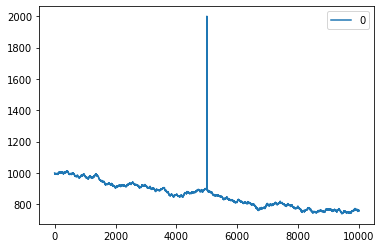

In [167]:
prices_w_short_large_shock = m.prices.copy()
shock_block = 5000
# 10 blocks is about 2-2.5 min
for i in range(10):
    prices_w_short_large_shock[shock_block + i] = prices_w_short_large_shock[i]*2
df_prices_w_short_large_shock = pd.DataFrame(data=prices_w_short_large_shock)    
df_prices_w_short_large_shock.plot()

In [168]:
# cost to manipulate spot 2x over 10 blocks w 20M pool is about $40M 
10*10*(np.sqrt(1+1)-1)

41.42135623730952

In [169]:
df_twap_240_geo_w_short_large_shock = df_prices_w_short_large_shock.rolling(window=window_240).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_240), raw=True)
df_twap_240_geo_w_short_large_shock_ask_skew = pd.concat([df_prices_w_short_large_shock, df_twap_240_geo_w_short_large_shock], axis=1).max(axis=1) * np.exp(SPREAD_X)
df_twap_240_geo_w_short_large_shock_bid_skew = pd.concat([df_prices_w_short_large_shock, df_twap_240_geo_w_short_large_shock], axis=1).min(axis=1) * np.exp(-SPREAD_X)

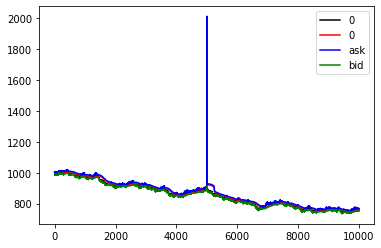

In [170]:
ax = df_prices_w_short_large_shock.plot(c='k', label='spot')
df_twap_240_geo_w_short_large_shock.plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_short_large_shock_ask_skew.plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_large_shock_bid_skew.plot(ax=ax, c='g', label='bid')
ax.legend()

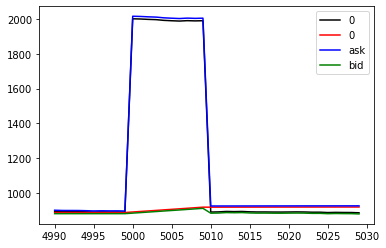

In [171]:
ax = df_prices_w_short_large_shock[shock_time-10:shock_time+30].plot(c='k', label='spot')
df_twap_240_geo_w_short_large_shock[shock_time-10:shock_time+30].plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_short_large_shock_ask_skew[shock_time-10:shock_time+30].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_large_shock_bid_skew[shock_time-10:shock_time+30].plot(ax=ax, c='g', label='bid')
ax.legend()

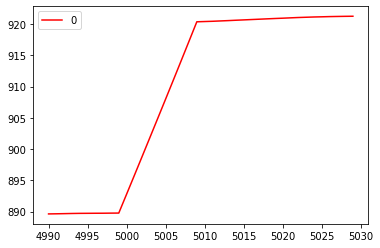

In [172]:
df_twap_240_geo_w_short_large_shock[shock_time-10:shock_time+30].plot(c='r', label='twap')

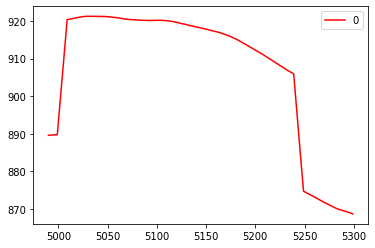

In [173]:
df_twap_240_geo_w_short_large_shock[shock_time-10:shock_time+300].plot(c='r', label='twap')

In [174]:
df_twap_240_geo_w_short_large_shock_ask_skew_1h_later = df_twap_240_geo_w_short_large_shock_ask_skew.shift(periods=-window_240)
df_twap_240_geo_w_short_large_shock_bid_skew_1h_later = df_twap_240_geo_w_short_large_shock_bid_skew.shift(periods=-window_240)

# And what about the trades? on the long side => zero profit again ...

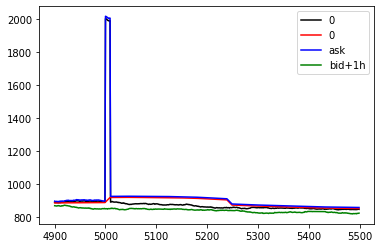

In [175]:
# trade 1 (long): ... yes still looks impossible to profit
ax = df_prices_w_short_large_shock[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_short_large_shock[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_short_large_shock_ask_skew[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_large_shock_bid_skew_1h_later[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid+1h')
ax.legend()

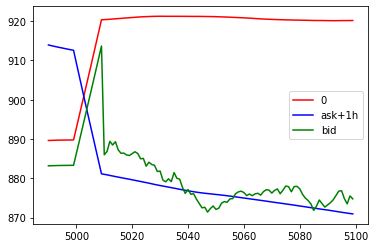

In [176]:
# trade 2 (short): After halfway through the spot manipulation, if I enter into a short, I would have made ~ 4% profit ... due to drift down after?
ax = df_twap_240_geo_w_short_large_shock[shock_time-10:shock_time+100].plot(c='r', label='twap-240')
df_twap_240_geo_w_short_large_shock_ask_skew_1h_later[shock_time-10:shock_time+100].plot(ax=ax, c='b', label='ask+1h')
df_twap_240_geo_w_short_large_shock_bid_skew[shock_time-10:shock_time+100].plot(ax=ax, c='g', label='bid')
ax.legend()

In [177]:
print('bid (short entry)', df_twap_240_geo_w_short_large_shock_bid_skew[shock_time+10-1])
print('ask+1h (short exit)', df_twap_240_geo_w_short_large_shock_ask_skew_1h_later[shock_time+10-1])
print('pnl (short)', -(df_twap_240_geo_w_short_large_shock_ask_skew_1h_later[shock_time+10-1]-df_twap_240_geo_w_short_large_shock_bid_skew[shock_time+10-1])/df_twap_240_geo_w_short_large_shock_bid_skew[shock_time+10-1])

bid (short entry) 913.677917191111
ask+1h (short exit) 881.1339052055963
pnl (short) 0.0356186916343164


In [178]:
print('spot start', df_prices_w_short_large_shock[shock_time-1:shock_time])
print('spot jumps to', df_prices_w_short_large_shock[shock_time:shock_time+1])
print('price change', (2000.0-891.770167)/891.770167)

spot start                0
4999  891.770167
spot jumps to            0
5000  2000.0
price change 1.242730328968271


# 3.56% profit is large and similar to longer attack (100 blocks). This attack is 124.27% jump in price over 10 blocks

## But costs 330M to execute if want PnL > 0. So we're good

In [179]:
print('cost of manipulation on $20M spot pool with max 5x leverage for 10 block 125% jump (in $M):', 10*(20/2)*(np.sqrt(1+(2000.0-891.77)/891.77)-1))
print('cost of attack on $20M spot pool with max 5x leverage for 10 block 125% jump (in $M):', 10*(20/2)*(np.sqrt(1+(2000.0-891.77)/891.77)-1) * (1 + 1/(0.0356*5.0)))

cost of manipulation on $20M spot pool with max 5x leverage for 10 block 125% jump (in $M): 49.757495604057624
cost of attack on $20M spot pool with max 5x leverage for 10 block 125% jump (in $M): 329.2939877616847


# Look at the long side of the spot manipulation scenario. I know the spike is coming because I'm paying to manipulate spot, and I go long on Overlay before manipulating.

# How much can I make? Because the ask is close to the TWAP before BUT the bid is the TWAP at the end of the attack, cost of attack (COA) analysis from note 2 applies here

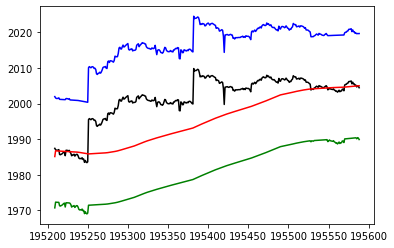

In [180]:
# Come back to this jump ...
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew[194970:195350].plot(ax=ax, c='g', label='bid')

# There actually might be another attack users can do to manipulate the spot ... IF a big real price jump occurs, a user can manipulate the spot in the *opposite* direction to that jump and lock in the better entry price vs the worse case entry price they would have gotten due to the jump.

# This means they effectively can execute the scalp trade but it costs them upfront capital to bring spot price below/above TWAP to manipulate spread. It also takes them only one block of capital for spot manipulation to lock in the smaller spread desired.

In [181]:
(2000-1985)/2000.0

0.0075

In [182]:
# Doesn't cost much capital to bring price back down over just one block
10*1e6*(np.sqrt(1.0075)-1)

37429.949942366926

# Apply a smaller spread envelope ...

In [183]:
# apply a smaller spread ...
SPREAD_X

0.007283411446258746

In [184]:
SPREAD_Y = SPREAD_X / 10.0
SPREAD_Y

0.0007283411446258746

In [185]:
twap_1h_geo_ask_skew_small = pd.concat([prices_filtered, twap_1h_geo], axis=1).max(axis=1) * np.exp(SPREAD_Y)
twap_1h_geo_bid_skew_small = pd.concat([prices_filtered, twap_1h_geo], axis=1).min(axis=1) * np.exp(-SPREAD_Y)

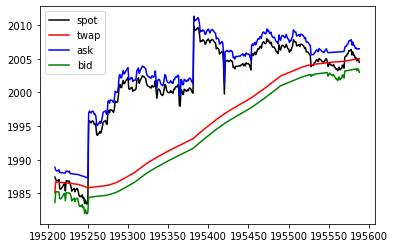

In [186]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew_small[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_small[194970:195350].plot(ax=ax, c='g', label='bid')

ax.legend()

# Add a downward shock over only a block but after the initial jump ...

In [187]:
prices_w_shock = prices.copy()
prices_w_shock

0         2239.570000
1         2239.667466
2         2240.655710
3         2238.304510
4         2239.584944
             ...     
518396    2179.164884
518397    2180.037396
518398    2179.911487
518399    2179.797703
518400    2180.034550
Name: sim-53, Length: 518401, dtype: float64

In [188]:
attack_block = 195271
print('195250', prices_w_shock[195250])
print('195251', prices_w_shock[195251])
print('195271', prices_w_shock[195271])
print('attack_block-25', prices_w_shock[attack_block-25])

195250 1983.6533818688665
195251 1995.4823229234973
195271 1995.6933244649551
attack_block-25 1983.4974026850225


In [189]:
prices_w_shock[attack_block] = prices_w_shock[attack_block-25]
print('prices_w_shock[attack_block]', prices_w_shock[attack_block])
print('prices_w_shock[attack_block-1]', prices_w_shock[attack_block-1])
print('prices_w_shock[attack_block+1]', prices_w_shock[attack_block+1])

prices_w_shock[attack_block] 1983.4974026850225
prices_w_shock[attack_block-1] 1995.6825197648093
prices_w_shock[attack_block+1] 1995.8247112436645


In [190]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 240 blocks in this sim
twap_1h_geo_w_shock = prices_w_shock.rolling(window=window_1h).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_1h), raw=True)
twap_1h_geo_w_shock = twap_1h_geo_w_shock[~twap_1h_geo_w_shock.isnull()]
twap_1h_geo_w_shock

239       2238.888859
240       2238.883210
241       2238.877853
242       2238.867539
243       2238.866412
             ...     
518396    2161.265451
518397    2161.344353
518398    2161.423125
518399    2161.497987
518400    2161.572553
Name: sim-53, Length: 518162, dtype: float64

In [191]:
prices_filtered_w_shock = prices_w_shock[239:]
prices_filtered_w_shock

239       2237.622746
240       2238.214274
241       2238.381596
242       2238.179852
243       2238.034022
             ...     
518396    2179.164884
518397    2180.037396
518398    2179.911487
518399    2179.797703
518400    2180.034550
Name: sim-53, Length: 518162, dtype: float64

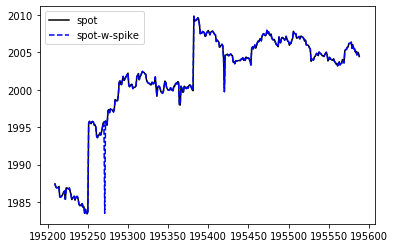

In [192]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
prices_filtered_w_shock[194970:195350].plot(ax=ax, c='b', linestyle='dashed', label='spot-w-spike')
ax.legend()

In [193]:
twap_1h_geo_w_shock_ask_skew_small = pd.concat([prices_filtered_w_shock, twap_1h_geo_w_shock], axis=1).max(axis=1) * np.exp(SPREAD_Y)
twap_1h_geo_w_shock_bid_skew_small = pd.concat([prices_filtered_w_shock, twap_1h_geo_w_shock], axis=1).min(axis=1) * np.exp(-SPREAD_Y)

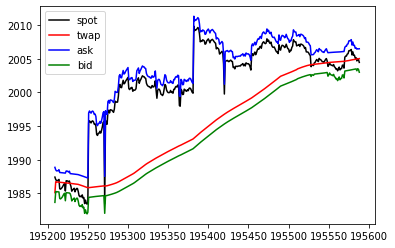

In [194]:
ax = prices_filtered_w_shock[194970:195350].plot(c='k', label='spot')
twap_1h_geo_w_shock[194970:195350].plot(ax=ax, c='r', label='twap')
twap_1h_geo_w_shock_ask_skew_small[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_w_shock_bid_skew_small[194970:195350].plot(ax=ax, c='g', label='bid')

ax.legend()

# Zoom in to see the ask the trader gets when manipulating ...

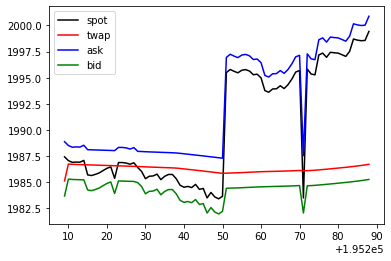

In [195]:
ax = prices_filtered_w_shock[194970:195050].plot(c='k', label='spot')
twap_1h_geo_w_shock[194970:195050].plot(ax=ax, c='r', label='twap')
twap_1h_geo_w_shock_ask_skew_small[194970:195050].plot(ax=ax, c='b', label='ask')
twap_1h_geo_w_shock_bid_skew_small[194970:195050].plot(ax=ax, c='g', label='bid')

ax.legend()

In [196]:
print('ask around shock', twap_1h_geo_w_shock_ask_skew_small[195030:195035])
print('ask at shock/manip', twap_1h_geo_w_shock_ask_skew_small[195271])

ask around shock 195269    1996.991991
195270    1997.136587
195271    1987.537066
195272    1997.278882
195273    1996.803485
dtype: float64
ask at shock/manip 1987.5370656465393


# Then I exit at the bid an hour later ...

In [197]:
print('bid around 1h after shock', twap_1h_geo_w_shock_ask_skew_small[195030+240:195035+240])
print('bid at 1h after shock/manip', twap_1h_geo_w_shock_ask_skew_small[195271+240])

bid around 1h after shock 195509    2008.960280
195510    2008.356179
195511    2008.428401
195512    2008.454163
195513    2008.588193
dtype: float64
bid at 1h after shock/manip 2008.428401327608


In [198]:
print('pnl from lag trade (excluding manip costs)', (2008.428401327608-1987.5370656465393)/1987.5370656465393)

pnl from lag trade (excluding manip costs) 0.010511167837905394


# Capital required to move spot down? dy = y * (1/np.sqrt(1+e)-1)

## Assume y = 10M for 20M pool ...

In [199]:
# capital required to move spot down? dy = y * (1/np.sqrt(1+e)-1)
e_shock = (1983.4974026850225-1995.6825197648093)/1995.6825197648093
print('e_shock', e_shock)

e_shock -0.006105739244147306


In [200]:
dy = 10 * (1/np.sqrt(1+e_shock)-1)
dy * 1e6

30669.211555527378

In [201]:
# So profitable with lag trade if PnL from trade > cost to shock over 1 block
print('Break even OI to be profitable:', dy * 1e6 / 0.010511167837905394)

Break even OI to be profitable: 2917773.9361108863


# So 30M dollars of OI ends up making this profitable scalp. We'd bleed from this continously with high enough caps *and* small enough spread envelope e^{E_s}

# Instead of using spot directly, use the 10m TWAP. Cost to shock over 40 blocks (~ 10min) is much larger => min 40M dollars for 5x leverage

In [202]:
# excludes cost to enter into a trade on Overlay market to scalp a profit
dy * 1e6 * 40

1226768.462221095

In [203]:
l_max = 5
l_max

5

In [204]:
# cost to enter max lev trade that's profitable is 1/(L*e_shock). Approx below ...
tc_b = 10 * 40 * (np.sqrt(1-e_shock) - 1) * (1 + 1/(l_max*(-e_shock)))
tc_b # in millions of dollars

41.1584178147016

In [205]:
# vs only 1M over 1 block
10 * (np.sqrt(1-e_shock) - 1) * (1 + 1/(l_max*(-e_shock)))

1.02896044536754

# Calculate the 10m TWAP (40 blocks) and use it as proxy for spot with these jumps.

# Calibrate e^{+/- E_s} such that 99% of time, 10m TWAP can't be front run profitably. For ETH-DAI, gives E_s = 0.00624957

In [206]:
SPREAD_X_10M = 0.00624957

In [207]:
window_10m = 4*10
window_10m

40

In [208]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 40 blocks in this sim
twap_10m_geo = prices.rolling(window=window_10m).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_10m), raw=True)
twap_10m_geo = twap_10m_geo[~twap_10m_geo.isnull()]
twap_10m_geo

39        2238.330164
40        2238.203490
41        2238.081433
42        2237.947631
43        2237.891592
             ...     
518396    2174.866962
518397    2175.003304
518398    2175.138929
518399    2175.282396
518400    2175.447723
Name: sim-53, Length: 518362, dtype: float64

In [209]:
# Filter the 10m such that length coincides with the 1h TWAP
twap_10m_geo = twap_10m_geo[239-39:]
twap_10m_geo

239       2237.645213
240       2237.707604
241       2237.767635
242       2237.819742
243       2237.874367
             ...     
518396    2174.866962
518397    2175.003304
518398    2175.138929
518399    2175.282396
518400    2175.447723
Name: sim-53, Length: 518162, dtype: float64

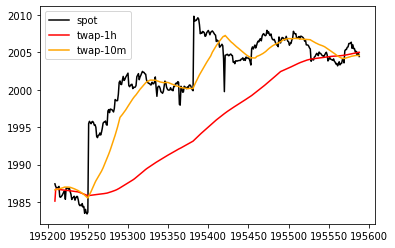

In [210]:
# Plot 10m, 1h TWAPs and spot around jump
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[194970:195350].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double.png')

In [211]:
# New skew around min/max bw 1h and 10m. Use twap_10m_geo as proxy for spot
twap_1h_geo_ask_skew_10m = pd.concat([twap_10m_geo, twap_1h_geo], axis=1).max(axis=1) * np.exp(SPREAD_X_10M)
twap_1h_geo_bid_skew_10m = pd.concat([twap_10m_geo, twap_1h_geo], axis=1).min(axis=1) * np.exp(-SPREAD_X_10M)

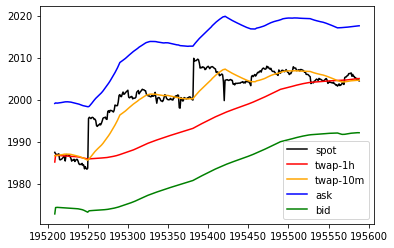

In [212]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[194970:195350].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[194970:195350].plot(ax=ax, c='g', label='bid')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double_spread.png')

In [213]:
print('spot at jump', prices_filtered[195010:195015])
print('twap-1h at jump', twap_1h_geo[195010:195015])
print('twap-10m at jump', twap_10m_geo[195010:195015])
print('ask at jump', twap_1h_geo_ask_skew_10m[195010:195015])
print('bid at jump', twap_1h_geo_bid_skew_10m[195010:195015])
print('bid 1h after jump', twap_1h_geo_bid_skew_10m[195010+window_1h:195015+window_1h])

spot at jump 195249    1983.410406
195250    1983.653382
195251    1995.482323
195252    1995.783461
195253    1995.607815
Name: sim-53, dtype: float64
twap-1h at jump 195249    1985.893596
195250    1985.848948
195251    1985.863894
195252    1985.880668
195253    1985.891454
Name: sim-53, dtype: float64
twap-10m at jump 195249    1985.624060
195250    1985.538856
195251    1985.752748
195252    1985.973597
195253    1986.190393
Name: sim-53, dtype: float64
ask at jump 195249    1998.343439
195250    1998.298512
195251    1998.313551
195252    1998.423942
195253    1998.642098
dtype: float64
bid at jump 195249    1973.253460
195250    1973.168786
195251    1973.381345
195252    1973.508468
195253    1973.519188
dtype: float64
bid 1h after jump 195489    1989.867091
195490    1989.961069
195491    1990.007993
195492    1990.054416
195493    1990.101384
dtype: float64


# How does spread around the 10m TWAP as proxy for spot perform in relatively normal periods? ...

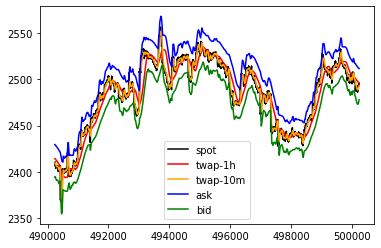

In [214]:
# 490000:500000, 496000:497500, and 495000:500000 from above
ax = prices_filtered[490000:500000].plot(c='k', label='spot')
twap_1h_geo[490000:500000].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[490000:500000].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[490000:500000].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[490000:500000].plot(ax=ax, c='g', label='bid')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double_spread_vol_zoom_1x.png')

In [215]:
(500000-490000)*15/86400.0

1.7361111111111112

# Doesn't look that bad. Zoom in ...

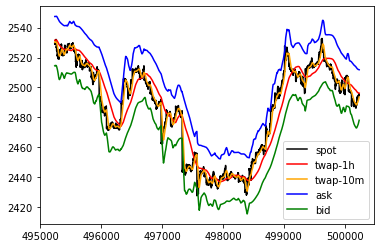

In [216]:
ax = prices_filtered[495000:500000].plot(c='k', label='spot')
twap_1h_geo[495000:500000].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[495000:500000].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[495000:500000].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[495000:500000].plot(ax=ax, c='g', label='bid')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double_spread_vol_zoom_2x.png')

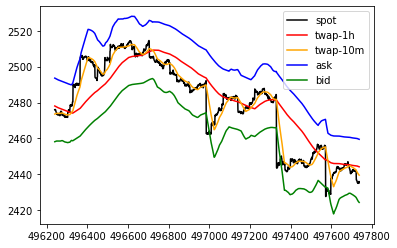

In [217]:
# 496000:497500
ax = prices_filtered[496000:497500].plot(c='k', label='spot')
twap_1h_geo[496000:497500].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[496000:497500].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[496000:497500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[496000:497500].plot(ax=ax, c='g', label='bid')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double_spread_vol_zoom_3x.png')

In [218]:
print('spot at top', prices_filtered[496369:496379])
print('twap-1h at top', twap_1h_geo[496369:496379])
print('twap-10m at top', twap_10m_geo[496369:496379])
print('ask at top', twap_1h_geo_ask_skew_10m[496369:496379])
print('bid at top', twap_1h_geo_bid_skew_10m[496369:496379])
print('ask 6h after top', twap_1h_geo_ask_skew_10m[497500-10:497500])
print('spot 6h after top', prices_filtered[497500-10:497500])

spot at top 496608    2514.315885
496609    2514.400384
496610    2514.081685
496611    2513.963872
496612    2514.305530
496613    2514.236195
496614    2514.031408
496615    2513.649435
496616    2513.237583
496617    2512.364085
Name: sim-53, dtype: float64
twap-1h at top 496608    2505.245007
496609    2505.280943
496610    2505.317860
496611    2505.352766
496612    2505.389623
496613    2505.424414
496614    2505.457059
496615    2505.490553
496616    2505.528605
496617    2505.562368
Name: sim-53, dtype: float64
twap-10m at top 496608    2511.783112
496609    2511.848208
496610    2511.914051
496611    2511.968213
496612    2512.054643
496613    2512.124658
496614    2512.182777
496615    2512.225218
496616    2512.236462
496617    2512.269418
Name: sim-53, dtype: float64
ask at top 496608    2527.529830
496609    2527.595334
496610    2527.661590
496611    2527.716092
496612    2527.803064
496613    2527.873518
496614    2527.932001
496615    2527.974708
496616    2527.986022
4

In [219]:
# pnl of trade over 6h
(2489.709524-2459.498776)/2489.709524

0.012134246067172923

# Zoom in more at the large downlegs around 497000 and 497300

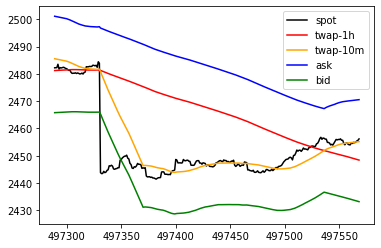

In [220]:
# 497000
ax = prices_filtered[497050:497050+240+40].plot(c='k', label='spot')
twap_1h_geo[497050:497050+240+40].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[497050:497050+240+40].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[497050:497050+240+40].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[497050:497050+240+40].plot(ax=ax, c='g', label='bid')
ax.legend()

In [221]:
# Looks close. Timelag to check profitability of trades
twap_1h_geo_ask_skew_10m_shift_1h_later = twap_1h_geo_ask_skew_10m.shift(periods=-window_1h)
twap_1h_geo_bid_skew_10m_shift_1h_later = twap_1h_geo_bid_skew_10m.shift(periods=-window_1h)

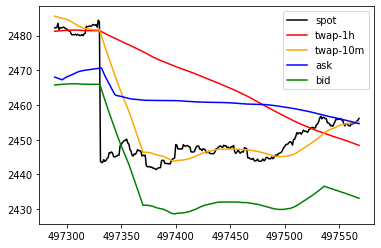

In [222]:
ax = prices_filtered[497050:497050+240+40].plot(c='k', label='spot')
twap_1h_geo[497050:497050+240+40].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[497050:497050+240+40].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m_shift_1h_later[497050:497050+240+40].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[497050:497050+240+40].plot(ax=ax, c='g', label='bid')
ax.legend()

# Interesting. Not profitable still even with 1.6% jump down over 1 block ...

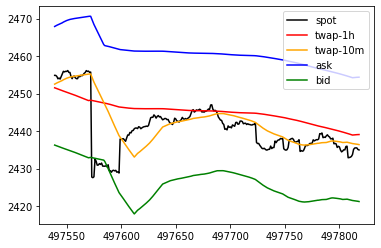

In [223]:
# 497300
ax = prices_filtered[497300:497300+240+40].plot(c='k', label='spot')
twap_1h_geo[497300:497300+240+40].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[497300:497300+240+40].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[497300:497300+240+40].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[497300:497300+240+40].plot(ax=ax, c='g', label='bid')
ax.legend()

# Not nearly as bad. Def not profitable ... but let's check to be sure

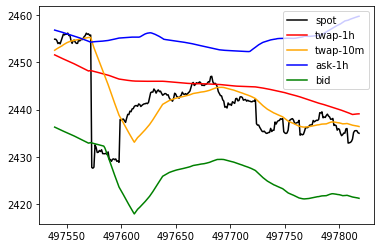

In [224]:
ax = prices_filtered[497300:497300+240+40].plot(c='k', label='spot')
twap_1h_geo[497300:497300+240+40].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[497300:497300+240+40].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m_shift_1h_later[497300:497300+240+40].plot(ax=ax, c='b', label='ask-1h')
twap_1h_geo_bid_skew_10m[497300:497300+240+40].plot(ax=ax, c='g', label='bid')
ax.legend()

# Ok look at the crazy unrealistic jumps from earlier.

# First at 131000. Jump is 50% in *1 block* -- which is insane but let's entertain it

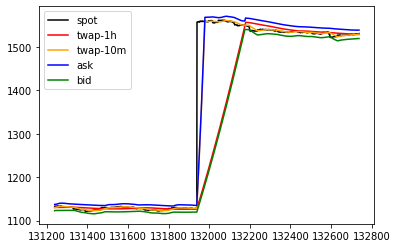

In [225]:
ax = prices_filtered[131000:132500].plot(c='k', label='spot')
twap_1h_geo[131000:132500].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[131000:132500].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[131000:132500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[131000:132500].plot(ax=ax, c='g', label='bid')
ax.legend()

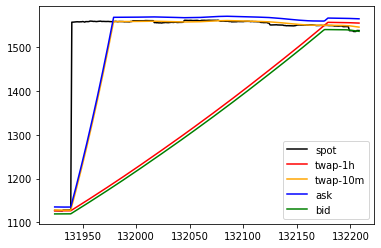

In [226]:
ax = prices_filtered[131685:131650+240+80].plot(c='k', label='spot')
twap_1h_geo[131685:131650+240+80].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[131685:131650+240+80].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[131685:131650+240+80].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[131685:131650+240+80].plot(ax=ax, c='g', label='bid')
ax.legend()

# Look at time lagged to see profit made from bid ask scalp

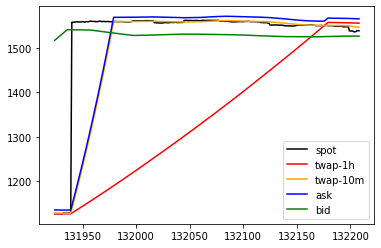

In [227]:
ax = prices_filtered[131685:131650+240+80].plot(c='k', label='spot')
twap_1h_geo[131685:131650+240+80].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[131685:131650+240+80].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[131685:131650+240+80].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m_shift_1h_later[131685:131650+240+80].plot(ax=ax, c='g', label='bid')
ax.legend()

# For that 10m interval, protocol is completely exposed. Need worst case market impact OI fee (lambda * OI^2) to cover this situation

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


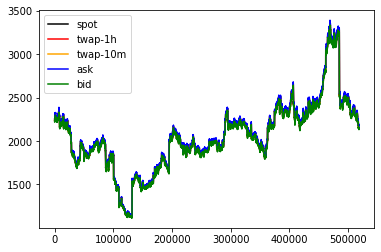

In [228]:
ax = prices_filtered.plot(c='k', label='spot')
twap_1h_geo.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo.plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m.plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m.plot(ax=ax, c='g', label='bid')

ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double_spread_all.png')

# Check how often scalp trade is profitable *given* entry 1 block after a large jump.

# Large jump is

## - spot(t+10m) > spot(t)*e^{E_s} for long scalp
## - spot(t+10m) < spot(t)*e^{-E_s} for short scalp

In [229]:
# Get the indices where spot jumps up happen
spot_jump_long_filtered = prices_filtered.rolling(window=window_10m).apply(lambda w: np.log(w[-1]/w[0]) if np.log(w[-1]/w[0]) > SPREAD_X_10M else 0.0, raw=True)
spot_jump_long_idxs = [ index for index, value in spot_jump_long_filtered.items() if value > 0.0 ]
print(f"{len(spot_jump_long_idxs)} number of occurrences of large spot jumps up")
print(f"{len(prices_filtered)} number of sample bars")
print(f"{100*len(spot_jump_long_idxs)/len(prices_filtered)}% of sample bars have large spot jumps up to execute long scalp trade")

15039 number of occurrences of large spot jumps up
518162 number of sample bars
2.902374160976683% of sample bars have large spot jumps up to execute long scalp trade


In [230]:
# Get the indices where spot jumps down happen
spot_jump_short_filtered = prices_filtered.rolling(window=window_10m).apply(lambda w: np.log(w[-1]/w[0]) if np.log(w[-1]/w[0]) < -SPREAD_X_10M else 0.0, raw=True)
spot_jump_short_idxs = [ index for index, value in spot_jump_short_filtered.items() if value < 0.0 ]
print(f"{len(spot_jump_short_idxs)} number of occurrences of large spot jumps down")
print(f"{len(prices_filtered)} number of sample bars")
print(f"{100*len(spot_jump_short_idxs)/len(prices_filtered)}% of sample bars have large spot jumps down to execute short scalp trade")

15767 number of occurrences of large spot jumps down
518162 number of sample bars
3.042870762425651% of sample bars have large spot jumps down to execute short scalp trade


In [231]:
# Looks consistent w mathematica numbers at end of note-2.nb

# Out of the indices where price jumps substantially, calculate PnL of scalp assuming exit 1h later

In [232]:
#### NOTE: recurring indices after the jump given the 10m window (40 indices/blocks)
start_idx = 239
print('idxs', spot_jump_long_idxs[:45])
print('values', spot_jump_long_filtered[spot_jump_long_idxs[0]-239:spot_jump_long_idxs[0]-239+10])
print('value', spot_jump_long_filtered[spot_jump_long_idxs[0]])

idxs [293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 1081, 1082, 1083, 1084, 1085, 1086]
values 293    0.010883
294    0.010915
295    0.011369
296    0.011433
297    0.011060
298    0.011215
299    0.011592
300    0.011857
301    0.011844
302    0.012036
Name: sim-53, dtype: float64
value 0.01088250402371506


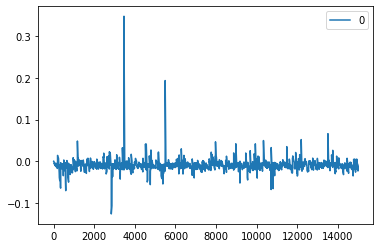

In [233]:
pnl_scalp_spot_jump_long = [ twap_1h_geo_bid_skew_10m[idx+window_1h] / twap_1h_geo_ask_skew_10m[idx] - 1 for idx in spot_jump_long_idxs if idx+window_1h in twap_1h_geo_bid_skew_10m ]
pd.DataFrame(data=pnl_scalp_spot_jump_long).plot()


# Still looks like a bit of a problem for scalp trade PnL given large wins still remain when in front-running the 10m.

# How well does it work with Adam's original manipulation jump?

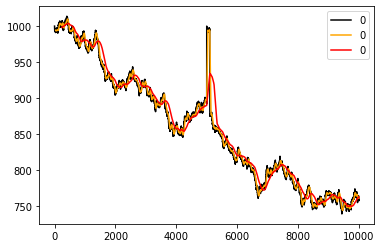

In [234]:
ax = df_prices_w_shock.plot(label='spot', c='k')
df_twap_40_geo_w_shock.plot(ax=ax, label='twap-40', c='orange')
df_twap_240_geo_w_shock.plot(ax=ax, label='twap-240', c='r')
ax.legend()

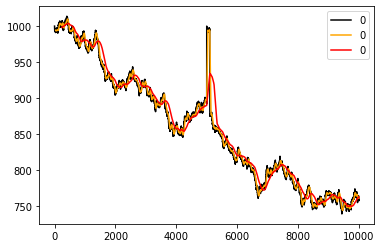

In [235]:
ax = df_prices_w_shock.plot(label='spot', c='k')
df_twap_40_geo_w_shock.plot(ax=ax, label='twap-40', c='orange')
df_twap_240_geo_w_shock.plot(ax=ax, label='twap-240', c='r')
ax.legend()

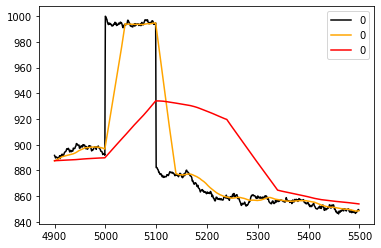

In [236]:
# [shock_time-100:shock_time+500]
ax = df_prices_w_shock[shock_time-100:shock_time+500].plot(label='spot', c='k')
df_twap_40_geo_w_shock[shock_time-100:shock_time+500].plot(ax=ax, label='twap-40', c='orange')
df_twap_240_geo_w_shock[shock_time-100:shock_time+500].plot(ax=ax, label='twap-240', c='r')
ax.legend()

In [237]:
# zoom in around shock ...

# Below ... Market impact OI fee for extreme case to cover remaining 1% of cases

In [238]:
qs = np.array([q for q in np.arange(0.001, 0.1, 0.001)])

In [239]:
H_STABLE_USDC_WETH = 0.03286104153987142
lambda_stable_usdc_weth = [ H_STABLE_USDC_WETH / q for q in qs ]
df_lambda_stable_usdc_weth = pd.DataFrame(data=[qs, lambda_stable_usdc_weth]).T
df_lambda_stable_usdc_weth.columns = ['q', 'lambda-stable']
df_lambda_stable_usdc_weth

q  lambda-stable
0   0.001      32.861042
1   0.002      16.430521
2   0.003      10.953681
3   0.004       8.215260
4   0.005       6.572208
..    ...            ...
94  0.095       0.345906
95  0.096       0.342303
96  0.097       0.338774
97  0.098       0.335317
98  0.099       0.331930

[99 rows x 2 columns]

In [240]:
# Instead, import from csv
lambdas_ethusd_ftx = pd.read_csv(f"csv/metrics/{FILENAME_FTX_2YR}-lambdas.csv")
lambdas_ethusd_ftx

Unnamed: 0    q0=0.01   q0=0.02   q0=0.03   q0=0.04   q0=0.05   q0=0.06  \
0   alpha=0.01  10.248342  5.124171  3.416114  2.562085  2.049668  1.708057   
1  alpha=0.025   5.236932  2.618466  1.745644  1.309233  1.047386  0.872822   
2   alpha=0.05   3.135162  1.567581  1.045054  0.783790  0.627032  0.522527   
3  alpha=0.075   2.324511  1.162255  0.774837  0.581128  0.464902  0.387418   
4    alpha=0.1   1.884925  0.942463  0.628308  0.471231  0.376985  0.314154   

    q0=0.07   q0=0.08   q0=0.09    q0=0.1  
0  1.464049  1.281043  1.138705  1.024834  
1  0.748133  0.654617  0.581881  0.523693  
2  0.447880  0.391895  0.348351  0.313516  
3  0.332073  0.290564  0.258279  0.232451  
4  0.269275  0.235616  0.209436  0.188493

In [241]:
h_ethusd_ftx = 0.05 * float(lambdas_ethusd_ftx[lambdas_ethusd_ftx["Unnamed: 0"]=="alpha=0.05"]["q0=0.05"])
h_ethusd_ftx

0.03135161632412748

In [242]:
lambda_stable_eth_usd = [ h_ethusd_ftx / q for q in qs ]
df_lambda_stable_eth_usd = pd.DataFrame(data=[qs, lambda_stable_eth_usd]).T
df_lambda_stable_eth_usd.columns = ['q', 'lambda-stable']
df_lambda_stable_eth_usd

q  lambda-stable
0   0.001      31.351616
1   0.002      15.675808
2   0.003      10.450539
3   0.004       7.837904
4   0.005       6.270323
..    ...            ...
94  0.095       0.330017
95  0.096       0.326579
96  0.097       0.323213
97  0.098       0.319914
98  0.099       0.316683

[99 rows x 2 columns]

In [243]:
H_NORMAL_USDC_WETH = 0.00110089
lambda_normal_usdc_weth = [ H_NORMAL_USDC_WETH / q for q in qs ]
df_lambda_normal_usdc_weth = pd.DataFrame(data=[qs, lambda_normal_usdc_weth]).T
df_lambda_normal_usdc_weth.columns = ['q', 'lambda-normal']
df_lambda_normal_usdc_weth

q  lambda-normal
0   0.001       1.100890
1   0.002       0.550445
2   0.003       0.366963
3   0.004       0.275222
4   0.005       0.220178
..    ...            ...
94  0.095       0.011588
95  0.096       0.011468
96  0.097       0.011349
97  0.098       0.011234
98  0.099       0.011120

[99 rows x 2 columns]

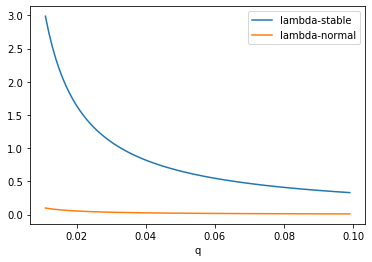

In [244]:
ax = df_lambda_stable_usdc_weth[10:].plot(x='q', y='lambda-stable')
df_lambda_normal_usdc_weth[10:].plot(ax=ax, x='q', y='lambda-normal')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_lambda_norm_v_stable.png')

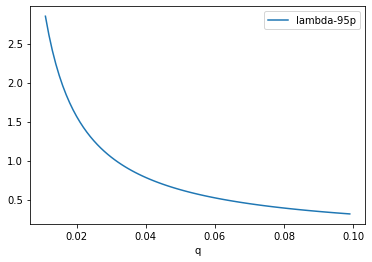

In [245]:
df_lambda_stable_eth_usd[10:].plot(x='q', y='lambda-stable', label='lambda-95p')
ax.get_figure().savefig('png/sim_twap_lag_lambda_stable_95p.png')

In [246]:
l_stable_99_350bps = df_lambda_stable_usdc_weth['lambda-stable'][34]
l_stable_99_350bps

0.9388869011391833

In [247]:
l_stable_95_500bps = df_lambda_stable_eth_usd['lambda-stable'][49]
l_stable_95_500bps

0.6270323264825496

In [248]:
full_qs = np.array([q for q in np.arange(0.001, 1.0, 0.001)])

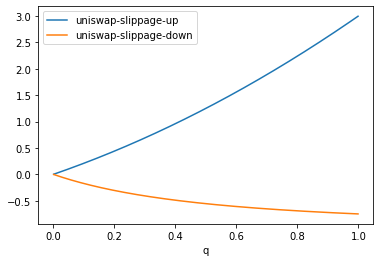

In [249]:
uniswap_slippage_up = (1+full_qs)**2 - 1
uniswap_slippage_down = 1/(1+full_qs)**2 - 1
df_uniswap_slippage = pd.DataFrame(data=[full_qs, uniswap_slippage_up, uniswap_slippage_down]).T
df_uniswap_slippage.columns = ['q', 'uniswap-slippage-up', 'uniswap-slippage-down']
df_uniswap_slippage.plot(x='q')

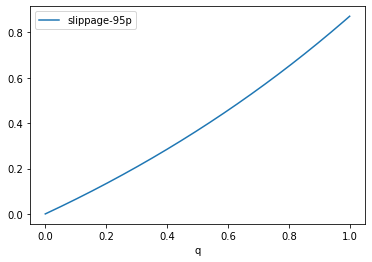

In [250]:
slippage_stable_95 = np.exp(l_stable_95_500bps*full_qs)-1
df_slippage_stable_95_eth_usd = pd.DataFrame(data=[full_qs, slippage_stable_95]).T
df_slippage_stable_95_eth_usd.columns = ['q', 'slippage-95p']
df_slippage_stable_95_eth_usd.plot(x='q', y='slippage-95p')

In [251]:
#print(df_lambda_stable_usdc_weth[19:20])
df_lambda_stable_usdc_weth.loc[34]

q                0.035000
lambda-stable    0.938887
Name: 34, dtype: float64

In [252]:
df_lambda_stable_usdc_weth.loc[49]

q                0.050000
lambda-stable    0.657221
Name: 49, dtype: float64

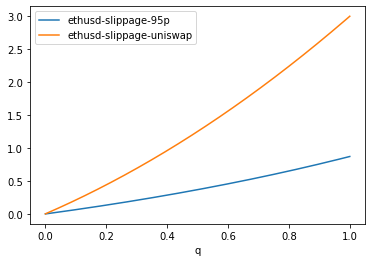

In [253]:
# Compare uniswap with 95p ETH/USD slippage
ax = df_slippage_stable_95_eth_usd.plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
df_uniswap_slippage.plot(ax=ax, x='q', y='uniswap-slippage-up', label='ethusd-slippage-uniswap')
ax.get_figure().savefig('png/sim_twap_lag_ethusd_slippage_95p.png')

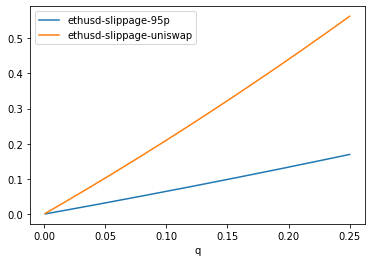

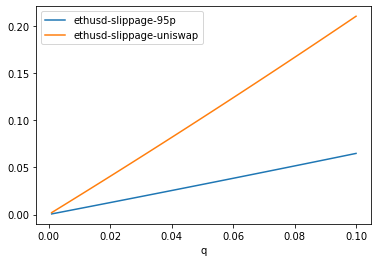

In [254]:
ax = df_slippage_stable_95_eth_usd[:250].plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
df_uniswap_slippage[:250].plot(ax=ax, x='q', y='uniswap-slippage-up', label='ethusd-slippage-uniswap')

ax_2 = df_slippage_stable_95_eth_usd[:100].plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
df_uniswap_slippage[:100].plot(ax=ax_2, x='q', y='uniswap-slippage-up', label='ethusd-slippage-uniswap')

In [255]:
df_slippage_stable_95_eth_usd

q  slippage-95p
0    0.001      0.000627
1    0.002      0.001255
2    0.003      0.001883
3    0.004      0.002511
4    0.005      0.003140
..     ...           ...
994  0.995      0.866187
995  0.996      0.867357
996  0.997      0.868529
997  0.998      0.869701
998  0.999      0.870873

[999 rows x 2 columns]

In [256]:
print('q[19]', df_lambda_normal_usdc_weth['q'][19])
print('lambda-normal[19]', df_lambda_normal_usdc_weth['lambda-normal'][19])

q[19] 0.02
lambda-normal[19] 0.055044499999999996


In [257]:
print('q[19]', df_lambda_stable_usdc_weth['q'][19])
print('lambda-stable[19]', df_lambda_stable_usdc_weth['lambda-stable'][19])

q[19] 0.02
lambda-stable[19] 1.6430520769935708


In [258]:
# Calc percent diff between normal and stable
print(f"Diff: {100*(df_lambda_stable_usdc_weth['lambda-stable'][19]/df_lambda_normal_usdc_weth['lambda-normal'][19] -1)}%")

Diff: 2884.952314933501%


In [259]:
# What about further out on q curve. Shouldn't matter given expression ..
print('q[80]', df_lambda_normal_usdc_weth['q'][80])
print('lambda-normal[80]', df_lambda_normal_usdc_weth['lambda-normal'][80])

q[80] 0.081
lambda-normal[80] 0.013591234567901234


In [260]:
# Examine for alcx usd crazy tails
H_STABLE_ALCX_USD = 0.5567142705739281 # ftx data
lambda_stable_alcx_usd = [ H_STABLE_ALCX_USD / q for q in qs ]
df_lambda_stable_alcx_usd = pd.DataFrame(data=[qs, lambda_stable_alcx_usd]).T
df_lambda_stable_alcx_usd.columns = ['q', 'lambda-stable']
df_lambda_stable_alcx_usd

q  lambda-stable
0   0.001     556.714271
1   0.002     278.357135
2   0.003     185.571424
3   0.004     139.178568
4   0.005     111.342854
..    ...            ...
94  0.095       5.860150
95  0.096       5.799107
96  0.097       5.739322
97  0.098       5.680758
98  0.099       5.623376

[99 rows x 2 columns]

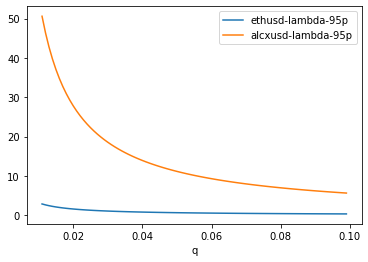

In [261]:
ax = df_lambda_stable_eth_usd[10:].plot(x='q', y='lambda-stable', label='ethusd-lambda-95p')
df_lambda_stable_alcx_usd[10:].plot(ax=ax, x='q', y='lambda-stable', label='alcxusd-lambda-95p')

lambda alcxusd 11.134285411478562


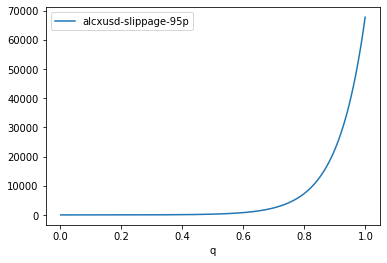

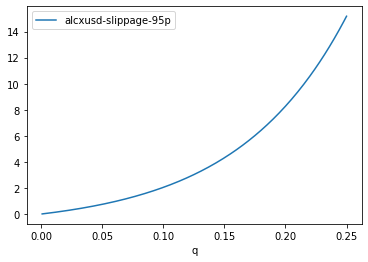

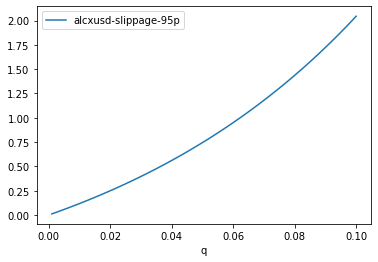

In [262]:
# And slippage plots as well ...
l_stable_95_500bps_alcxusd = df_lambda_stable_alcx_usd['lambda-stable'][49]
print('lambda alcxusd', l_stable_95_500bps_alcxusd)

slippage_stable_95_alcx_usd = np.exp(l_stable_95_500bps_alcxusd*full_qs)-1
df_slippage_stable_95_alcx_usd = pd.DataFrame(data=[full_qs, slippage_stable_95_alcx_usd]).T
df_slippage_stable_95_alcx_usd.columns = ['q', 'slippage-95p']

df_slippage_stable_95_alcx_usd.plot(x='q', y='slippage-95p', label='alcxusd-slippage-95p')
df_slippage_stable_95_alcx_usd[:250].plot(x='q', y='slippage-95p', label='alcxusd-slippage-95p')
df_slippage_stable_95_alcx_usd[:100].plot(x='q', y='slippage-95p', label='alcxusd-slippage-95p')

In [263]:
# Yea this makes it insanely hard to enter into a full whale trade unless you chunk over multiple 10m intervals
# This is likely very good for extreme scenarios, with something that has massive tails.

In [264]:
# Look at YFI/USD and UNI/USD for larger cap defi price analysis
H_STABLE_YFI_USD = 0.18950329933925197 # ftx data
lambda_stable_yfi_usd = [ H_STABLE_YFI_USD / q for q in qs ]
df_lambda_stable_yfi_usd = pd.DataFrame(data=[qs, lambda_stable_yfi_usd]).T
df_lambda_stable_yfi_usd.columns = ['q', 'lambda-stable']
print('yfiusd', df_lambda_stable_yfi_usd)

H_STABLE_UNI_USD = 0.09334632919218114 # ftx data
lambda_stable_uni_usd = [ H_STABLE_UNI_USD / q for q in qs ]
df_lambda_stable_uni_usd = pd.DataFrame(data=[qs, lambda_stable_uni_usd]).T
df_lambda_stable_uni_usd.columns = ['q', 'lambda-stable']
print('uniusd', df_lambda_stable_uni_usd)

yfiusd         q  lambda-stable
0   0.001     189.503299
1   0.002      94.751650
2   0.003      63.167766
3   0.004      47.375825
4   0.005      37.900660
..    ...            ...
94  0.095       1.994772
95  0.096       1.973993
96  0.097       1.953642
97  0.098       1.933707
98  0.099       1.914175

[99 rows x 2 columns]
uniusd         q  lambda-stable
0   0.001      93.346329
1   0.002      46.673165
2   0.003      31.115443
3   0.004      23.336582
4   0.005      18.669266
..    ...            ...
94  0.095       0.982593
95  0.096       0.972358
96  0.097       0.962333
97  0.098       0.952514
98  0.099       0.942892

[99 rows x 2 columns]


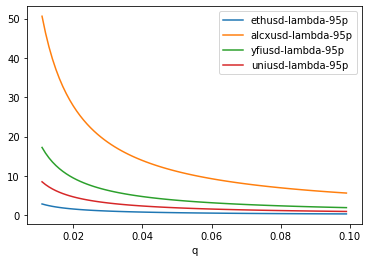

In [265]:
ax = df_lambda_stable_eth_usd[10:].plot(x='q', y='lambda-stable', label='ethusd-lambda-95p')
df_lambda_stable_alcx_usd[10:].plot(ax=ax, x='q', y='lambda-stable', label='alcxusd-lambda-95p')
df_lambda_stable_yfi_usd[10:].plot(ax=ax, x='q', y='lambda-stable', label='yfiusd-lambda-95p')
df_lambda_stable_uni_usd[10:].plot(ax=ax, x='q', y='lambda-stable', label='uniusd-lambda-95p')
ax.get_figure().savefig('png/sim_twap_lag_lambda_95p.png')

In [266]:
l_stable_95_500bps_yfiusd = df_lambda_stable_yfi_usd['lambda-stable'][49]
print('lambda yfiusd', l_stable_95_500bps_yfiusd)
l_stable_95_500bps_uniusd = df_lambda_stable_uni_usd['lambda-stable'][49]
print('lambda uniusd', l_stable_95_500bps_uniusd)

slippage_stable_95_yfi_usd = np.exp(l_stable_95_500bps_yfiusd*full_qs)-1
df_slippage_stable_95_yfi_usd = pd.DataFrame(data=[full_qs, slippage_stable_95_yfi_usd]).T
df_slippage_stable_95_yfi_usd.columns = ['q', 'slippage-95p']

slippage_stable_95_uni_usd = np.exp(l_stable_95_500bps_uniusd*full_qs)-1
df_slippage_stable_95_uni_usd = pd.DataFrame(data=[full_qs, slippage_stable_95_uni_usd]).T
df_slippage_stable_95_uni_usd.columns = ['q', 'slippage-95p']

lambda yfiusd 3.7900659867850393
lambda uniusd 1.8669265838436226


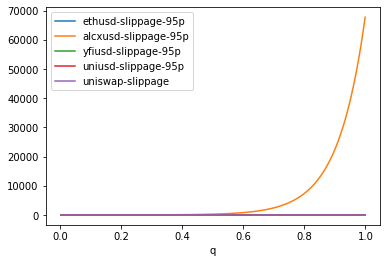

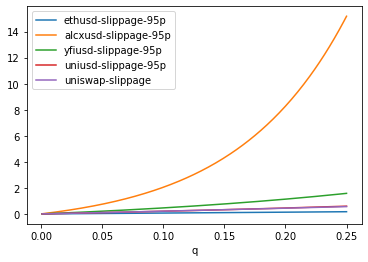

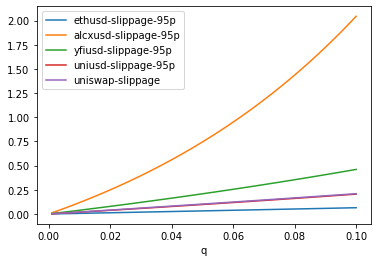

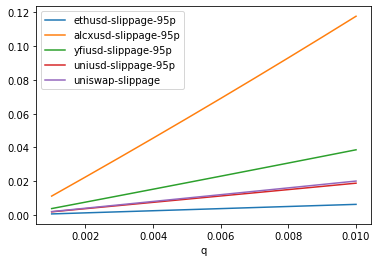

In [267]:
ax = df_slippage_stable_95_eth_usd.plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
df_slippage_stable_95_alcx_usd.plot(ax=ax, x='q', y='slippage-95p', label='alcxusd-slippage-95p')
df_slippage_stable_95_yfi_usd.plot(ax=ax, x='q', y='slippage-95p', label='yfiusd-slippage-95p')
df_slippage_stable_95_uni_usd.plot(ax=ax, x='q', y='slippage-95p', label='uniusd-slippage-95p')
df_uniswap_slippage.plot(ax=ax, x='q', y='uniswap-slippage-up', label='uniswap-slippage')

ax_2 = df_slippage_stable_95_eth_usd[:250].plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
df_slippage_stable_95_alcx_usd[:250].plot(ax=ax_2, x='q', y='slippage-95p', label='alcxusd-slippage-95p')
df_slippage_stable_95_yfi_usd[:250].plot(ax=ax_2, x='q', y='slippage-95p', label='yfiusd-slippage-95p')
df_slippage_stable_95_uni_usd[:250].plot(ax=ax_2, x='q', y='slippage-95p', label='uniusd-slippage-95p')
df_uniswap_slippage[:250].plot(ax=ax_2, x='q', y='uniswap-slippage-up', label='uniswap-slippage')

ax_3 = df_slippage_stable_95_eth_usd[:100].plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
df_slippage_stable_95_alcx_usd[:100].plot(ax=ax_3, x='q', y='slippage-95p', label='alcxusd-slippage-95p')
df_slippage_stable_95_yfi_usd[:100].plot(ax=ax_3, x='q', y='slippage-95p', label='yfiusd-slippage-95p')
df_slippage_stable_95_uni_usd[:100].plot(ax=ax_3, x='q', y='slippage-95p', label='uniusd-slippage-95p')
df_uniswap_slippage[:100].plot(ax=ax_3, x='q', y='uniswap-slippage-up', label='uniswap-slippage')
ax_3.get_figure().savefig('png/sim_twap_lag_slippage_95p_00_10.png')

ax_4 = df_slippage_stable_95_eth_usd[:10].plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
df_slippage_stable_95_alcx_usd[:10].plot(ax=ax_4, x='q', y='slippage-95p', label='alcxusd-slippage-95p')
df_slippage_stable_95_yfi_usd[:10].plot(ax=ax_4, x='q', y='slippage-95p', label='yfiusd-slippage-95p')
df_slippage_stable_95_uni_usd[:10].plot(ax=ax_4, x='q', y='slippage-95p', label='uniusd-slippage-95p')
df_uniswap_slippage[:10].plot(ax=ax_4, x='q', y='uniswap-slippage-up', label='uniswap-slippage')
ax_4.get_figure().savefig('png/sim_twap_lag_slippage_95p_00_01.png')

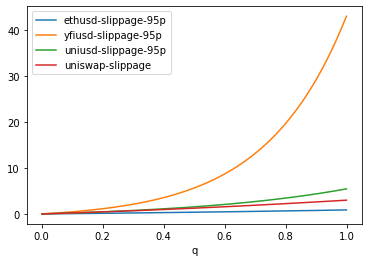

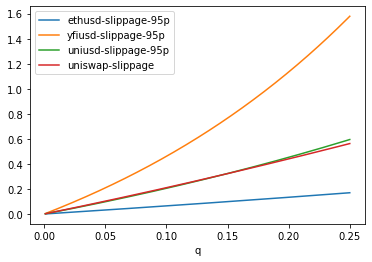

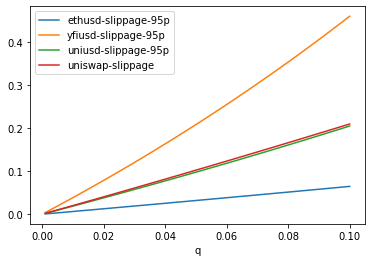

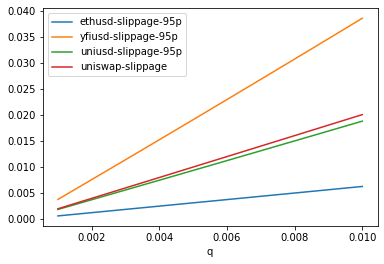

In [268]:
# UNI-USD at stable dist params: alpha: 1.1934616959530837, beta: 0.005496126360597972, mu: 1.2139705815882693e-05, sigma: 0.0007816412225402891
# Seems to yield slippage closest to actual uniswap pool slippage for range of oi cap (if same as underlying Uniswap liquidity pool)
# Remove alcx for now to compare ...
ax = df_slippage_stable_95_eth_usd.plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
#df_slippage_stable_95_alcx_usd.plot(ax=ax, x='q', y='slippage-95p', label='alcxusd-slippage-95p')
df_slippage_stable_95_yfi_usd.plot(ax=ax, x='q', y='slippage-95p', label='yfiusd-slippage-95p')
df_slippage_stable_95_uni_usd.plot(ax=ax, x='q', y='slippage-95p', label='uniusd-slippage-95p')
df_uniswap_slippage.plot(ax=ax, x='q', y='uniswap-slippage-up', label='uniswap-slippage')

ax_2 = df_slippage_stable_95_eth_usd[:250].plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
#df_slippage_stable_95_alcx_usd[:250].plot(ax=ax_2, x='q', y='slippage-95p', label='alcxusd-slippage-95p')
df_slippage_stable_95_yfi_usd[:250].plot(ax=ax_2, x='q', y='slippage-95p', label='yfiusd-slippage-95p')
df_slippage_stable_95_uni_usd[:250].plot(ax=ax_2, x='q', y='slippage-95p', label='uniusd-slippage-95p')
df_uniswap_slippage[:250].plot(ax=ax_2, x='q', y='uniswap-slippage-up', label='uniswap-slippage')

ax_3 = df_slippage_stable_95_eth_usd[:100].plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
#df_slippage_stable_95_alcx_usd[:100].plot(ax=ax_3, x='q', y='slippage-95p', label='alcxusd-slippage-95p')
df_slippage_stable_95_yfi_usd[:100].plot(ax=ax_3, x='q', y='slippage-95p', label='yfiusd-slippage-95p')
df_slippage_stable_95_uni_usd[:100].plot(ax=ax_3, x='q', y='slippage-95p', label='uniusd-slippage-95p')
df_uniswap_slippage[:100].plot(ax=ax_3, x='q', y='uniswap-slippage-up', label='uniswap-slippage')
ax_3.get_figure().savefig('png/sim_twap_lag_slippage_95p_noalcxusd_00_10.png')

ax_4 = df_slippage_stable_95_eth_usd[:10].plot(x='q', y='slippage-95p', label='ethusd-slippage-95p')
#df_slippage_stable_95_alcx_usd[:10].plot(ax=ax_4, x='q', y='slippage-95p', label='alcxusd-slippage-95p')
df_slippage_stable_95_yfi_usd[:10].plot(ax=ax_4, x='q', y='slippage-95p', label='yfiusd-slippage-95p')
df_slippage_stable_95_uni_usd[:10].plot(ax=ax_4, x='q', y='slippage-95p', label='uniusd-slippage-95p')
df_uniswap_slippage[:10].plot(ax=ax_4, x='q', y='uniswap-slippage-up', label='uniswap-slippage')
ax_4.get_figure().savefig('png/sim_twap_lag_slippage_95p_noalcxusd_00_01.png')

# What does the ev look like for each of these?

In [452]:
# Calibrating off of q0 = 0.05
rho_ethusd_95 = 0.005951298730841163
h_ethusd_95 = 0.02538253803893926
l_ethusd_95 = l_stable_95_500bps
print(f"rho {rho_ethusd_95}; h {h_ethusd_95}; l {l_ethusd_95}")

rho 0.005951298730841163; h 0.02538253803893926; l 0.6270323264825496


In [453]:
rho_ethusd_975 = 0.011834039793523477
h_ethusd_975 = 0.040464703435640625
l_ethusd_975 = 1.0473864571759677
print(f"rho {rho_ethusd_975}; h {h_ethusd_975}; l {l_ethusd_975}")

rho 0.011834039793523477; h 0.040464703435640625; l 1.0473864571759677


In [454]:
rho_ethusd_99 = 0.029176045982434416
h_ethusd_99 = 0.07287328752766709
l_ethusd_99 = 2.0496683689682613
print(f"rho {rho_ethusd_99}; h {h_ethusd_99}; l {l_ethusd_99}")

rho 0.029176045982434416; h 0.07287328752766709; l 2.0496683689682613


# Plot anticipated ev lost ... alpha * q * ( e**(h-l*q) - 1 + rho )

In [460]:
# qs = np.array([q for q in np.arange(0.001, 0.1, 0.001)])
ev_ethusd_95 = 0.05 * qs * (np.exp(h_ethusd_95 - l_ethusd_95*qs) - 1 + rho_ethusd_95)
df_ev_ethusd_95 = pd.DataFrame(data=[qs, ev_ethusd_95]).T
df_ev_ethusd_95.columns = [ 'q', 'ev' ]

ev_ethusd_975 = 0.025 * qs * (np.exp(h_ethusd_975 - l_ethusd_975*qs) - 1 + rho_ethusd_975)
df_ev_ethusd_975 = pd.DataFrame(data=[qs, ev_ethusd_975]).T
df_ev_ethusd_975.columns = [ 'q', 'ev' ]

ev_ethusd_99 = 0.01 * qs * (np.exp(h_ethusd_99 - l_ethusd_99*qs) - 1 + rho_ethusd_99)
df_ev_ethusd_99 = pd.DataFrame(data=[qs, ev_ethusd_99]).T
df_ev_ethusd_99.columns = [ 'q', 'ev' ]

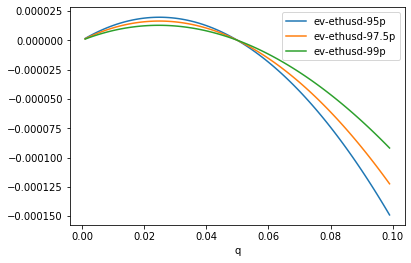

In [467]:
ax = df_ev_ethusd_95.plot(x='q', y='ev', label='ev-ethusd-95p')
df_ev_ethusd_975.plot(ax=ax, x='q', y='ev', label='ev-ethusd-97.5p')
df_ev_ethusd_99.plot(ax=ax, x='q', y='ev', label='ev-ethusd-99p')
ax.get_figure().savefig('png/sim_twap_lag_ethusd_ev_00_10.png')

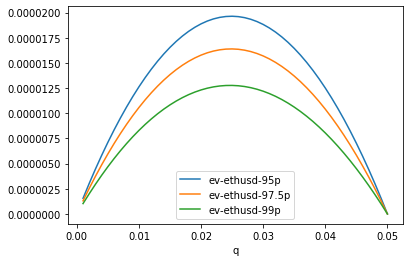

In [468]:
ax = df_ev_ethusd_95[:50].plot(x='q', y='ev', label='ev-ethusd-95p')
df_ev_ethusd_975[:50].plot(ax=ax, x='q', y='ev', label='ev-ethusd-97.5p')
df_ev_ethusd_99[:50].plot(ax=ax, x='q', y='ev', label='ev-ethusd-99p')
ax.get_figure().savefig('png/sim_twap_lag_ethusd_ev_00_05.png')

# Look at FTX ETH-USD 1m historical data for several months: Jan 1, 2021 to Aug 19, 2021

In [270]:
FILENAME_FTX = "ethusd_01012021_08192021"

In [271]:
df_ftx = pd.read_csv(f"csv/{FILENAME_FTX}.csv")
df_ftx

t        o        h        l        c             v
0       1.609459e+12   737.28   737.91   736.90   737.80    9917.16625
1       1.609459e+12   737.80   739.92   737.80   739.53   30086.73403
2       1.609459e+12   739.53   740.00   738.21   738.75     257.16222
3       1.609459e+12   738.75   739.10   738.14   738.14     185.36104
4       1.609459e+12   738.14   738.63   737.62   737.78     178.66611
...              ...      ...      ...      ...      ...           ...
335028  1.629419e+12  3216.00  3218.70  3215.10  3215.30  521958.38350
335029  1.629419e+12  3216.00  3218.70  3215.10  3215.30  521958.38350
335030  1.629419e+12  3216.00  3218.70  3215.10  3215.30  521958.38350
335031  1.629419e+12  3216.00  3218.70  3215.10  3215.30  521958.38350
335032  1.629419e+12  3216.00  3218.70  3215.10  3215.30  521958.38350

[335033 rows x 6 columns]

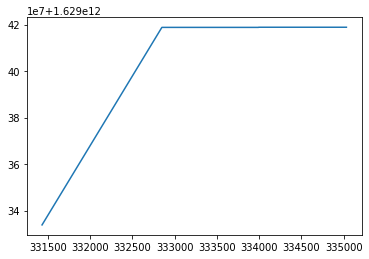

In [272]:
df_ftx['t'][len(df_ftx['t'])-3600:].plot()

In [273]:
# Need to filter out last 1h
df_ftx = df_ftx[:len(df_ftx)-3600]
df_ftx

t        o        h        l        c             v
0       1.609459e+12   737.28   737.91   736.90   737.80    9917.16625
1       1.609459e+12   737.80   739.92   737.80   739.53   30086.73403
2       1.609459e+12   739.53   740.00   738.21   738.75     257.16222
3       1.609459e+12   738.75   739.10   738.14   738.14     185.36104
4       1.609459e+12   738.14   738.63   737.62   737.78     178.66611
...              ...      ...      ...      ...      ...           ...
331428  1.629334e+12  3011.50  3017.00  3011.40  3016.90  130268.47360
331429  1.629334e+12  3016.90  3020.30  3014.30  3014.30  127879.60120
331430  1.629334e+12  3014.30  3022.10  3013.80  3022.10  184599.61450
331431  1.629334e+12  3022.10  3026.70  3021.40  3026.70  100082.19650
331432  1.629334e+12  3026.70  3026.90  3024.60  3026.10  138457.23580

[331433 rows x 6 columns]

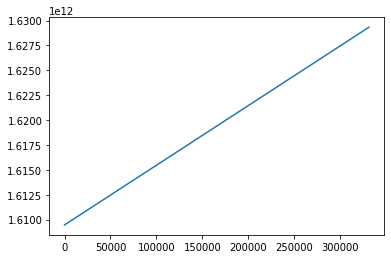

In [274]:
df_ftx['t'].plot()

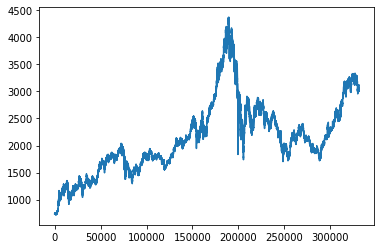

In [275]:
df_ftx['c'].plot()

In [276]:
# Check data only 1m apart
df_ftx['t'][len(df_ftx)-7200]-df_ftx['t'][len(df_ftx)-7200-1]

60000.0

In [277]:
# Use close prices
ethusd_ftx_c = df_ftx['c']
ethusd_ftx_c

0          737.80
1          739.53
2          738.75
3          738.14
4          737.78
           ...   
331428    3016.90
331429    3014.30
331430    3022.10
331431    3026.70
331432    3026.10
Name: c, Length: 331433, dtype: float64

In [278]:
# Take geometric moving average... 10m and 1h
window_1h_ftx = 60
window_10m_ftx = 10

In [279]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 60 steps (1m data) in this sim
twap_1h_geo_ftx = ethusd_ftx_c.rolling(window=window_1h_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_1h_ftx), raw=True)
twap_1h_geo_ftx = twap_1h_geo_ftx[~twap_1h_geo_ftx.isnull()]
twap_1h_geo_ftx

59         734.366739
60         734.326529
61         734.243339
62         734.183561
63         734.140552
             ...     
331428    3024.791399
331429    3024.224342
331430    3023.736407
331431    3023.308679
331432    3022.986692
Name: c, Length: 331374, dtype: float64

In [280]:
twap_10m_geo_ftx = ethusd_ftx_c.rolling(window=window_10m_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_10m_ftx), raw=True)
twap_10m_geo_ftx = twap_10m_geo_ftx[~twap_10m_geo_ftx.isnull()]
twap_10m_geo_ftx

9          737.042236
10         736.632633
11         735.983608
12         735.515024
13         734.941054
             ...     
331428    3012.418154
331429    3012.598101
331430    3013.897089
331431    3014.854699
331432    3016.393286
Name: c, Length: 331424, dtype: float64

In [281]:
# filter the 10m data
twap_10m_geo_ftx = twap_10m_geo_ftx[50:]
twap_10m_geo_ftx

59         735.614895
60         735.607893
61         735.518821
62         735.403862
63         735.383869
             ...     
331428    3012.418154
331429    3012.598101
331430    3013.897089
331431    3014.854699
331432    3016.393286
Name: c, Length: 331374, dtype: float64

In [282]:
ethusd_ftx_c_filtered = ethusd_ftx_c[59:]
ethusd_ftx_c_filtered

59         735.13
60         735.38
61         734.52
62         735.15
63         735.55
           ...   
331428    3016.90
331429    3014.30
331430    3022.10
331431    3026.70
331432    3026.10
Name: c, Length: 331374, dtype: float64

# Plot them all together 

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


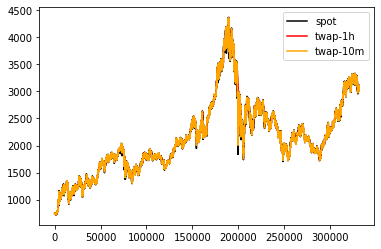

In [283]:
ax = ethusd_ftx_c_filtered.plot(c='k', label='spot')
twap_1h_geo_ftx.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx.plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

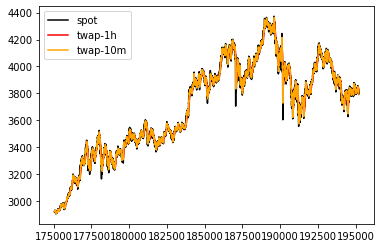

In [284]:
# Zoom in around run up
ax = ethusd_ftx_c_filtered[175000:175000+1440*14].plot(c='k', label='spot')
twap_1h_geo_ftx[175000:175000+1440*14].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[175000:175000+1440*14].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

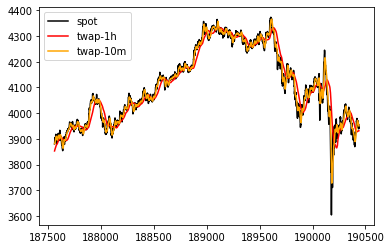

In [285]:
ax = ethusd_ftx_c_filtered[187500:187500+1440*2].plot(c='k', label='spot')
twap_1h_geo_ftx[187500:187500+1440*2].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[187500:187500+1440*2].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

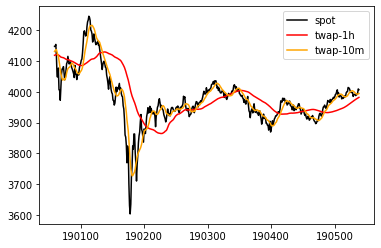

In [286]:
# Check most extreme drop near end of this window
ax = ethusd_ftx_c_filtered[190000:190000+60*8].plot(c='k', label='spot')
twap_1h_geo_ftx[190000:190000+60*8].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[190000:190000+60*8].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

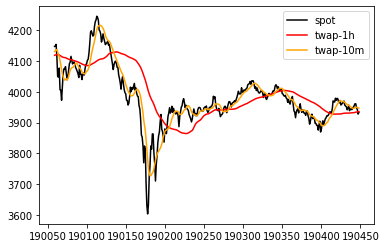

In [287]:
ax = ethusd_ftx_c_filtered[190000:190150+60*4].plot(c='k', label='spot')
twap_1h_geo_ftx[190000:190150+60*4].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[190000:190150+60*4].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

# Nice. Can the bid-ask spread handle this? Seems to be the most extreme

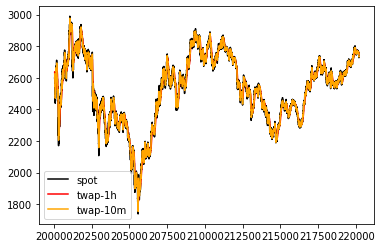

In [288]:
ax = ethusd_ftx_c_filtered[200000:200000+1440*14].plot(c='k', label='spot')
twap_1h_geo_ftx[200000:200000+1440*14].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[200000:200000+1440*14].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

# Or this ?

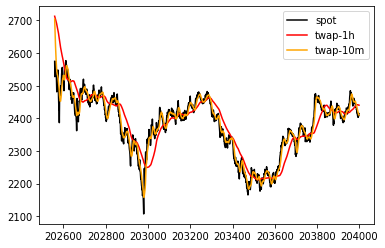

In [289]:
ax = ethusd_ftx_c_filtered[202500:202500+1440].plot(c='k', label='spot')
twap_1h_geo_ftx[202500:202500+1440].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[202500:202500+1440].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

# 95% confidence level for FTX ETH USD data gives:

## >>> dlt = 0.006258241054078503
## >>> l(0.035) = 0.6510291646000596

In [290]:
delta_95p_ftx = 0.006258241054078503
log_ev_95p_ftx = 0.022786020761002085

def lambda_95p(q):
    return log_ev_95p_ftx/q

In [291]:
# Apply the static spread first
twap_1h_geo_ftx_ask_skew_10m = pd.concat([twap_10m_geo_ftx, twap_1h_geo_ftx], axis=1).max(axis=1) * np.exp(delta_95p_ftx)
twap_1h_geo_ftx_bid_skew_10m = pd.concat([twap_10m_geo_ftx, twap_1h_geo_ftx], axis=1).min(axis=1) * np.exp(-delta_95p_ftx)

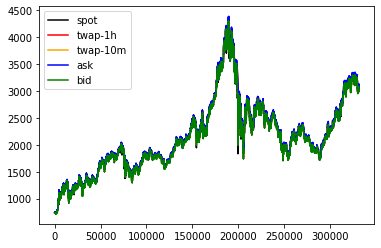

In [292]:
ax = ethusd_ftx_c_filtered.plot(c='k', label='spot')
twap_1h_geo_ftx.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx.plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m.plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m.plot(ax=ax, c='g', label='bid')

ax.legend()

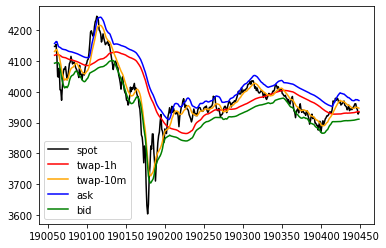

In [293]:
# How'd it do in really stressful 4k to 3.6k drop?
ax = ethusd_ftx_c_filtered[190000:190150+60*4].plot(c='k', label='spot')
twap_1h_geo_ftx[190000:190150+60*4].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[190000:190150+60*4].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[190000:190150+60*4].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[190000:190150+60*4].plot(ax=ax, c='g', label='bid')

ax.legend()

# Was it a profitable trade anymore to short around t=190140 and exit at t=190200? (60 min window for ask to catch up)
# Strict non-movement of the ask seems to help majorly here

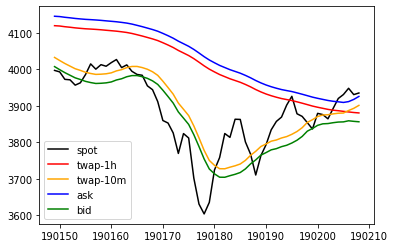

In [294]:
# zoom in around region of interest 190140:190200
ax = ethusd_ftx_c_filtered[190090:190150].plot(c='k', label='spot')
twap_1h_geo_ftx[190090:190150].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[190090:190150].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[190090:190150].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[190090:190150].plot(ax=ax, c='g', label='bid')

ax.legend()

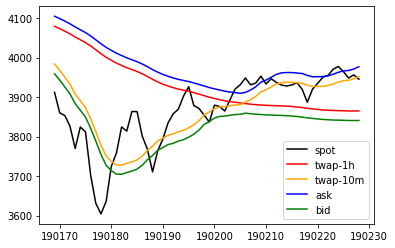

In [295]:
# Start short at t=190170 where gap bw spot and bid starts getting bad/extreme and then exit trade at t=190230
ax = ethusd_ftx_c_filtered[190170-60:190230-60].plot(c='k', label='spot')
twap_1h_geo_ftx[190170-60:190230-60].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[190170-60:190230-60].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[190170-60:190230-60].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[190170-60:190230-60].plot(ax=ax, c='g', label='bid')

ax.legend()

# Even for this large drop in historical data of about 10% in 10m, scalp trade doesn't make profit. Can't overcome static spread of 60bps per side of trade.

# Ask price not budging and following the 1h TWAP is key.

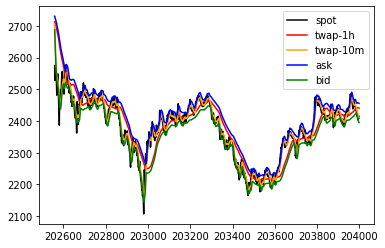

In [296]:
# and look at the other drop ... [202500:202500+1440]. then look at march of 2000 collapse to test
ax = ethusd_ftx_c_filtered[202500:202500+1440].plot(c='k', label='spot')
twap_1h_geo_ftx[202500:202500+1440].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[202500:202500+1440].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[202500:202500+1440].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[202500:202500+1440].plot(ax=ax, c='g', label='bid')

ax.legend()

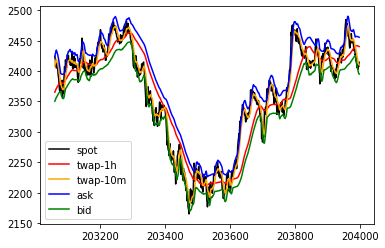

In [297]:
# zoom inaround 203000
ax = ethusd_ftx_c_filtered[203000:202500+1440].plot(c='k', label='spot')
twap_1h_geo_ftx[203000:202500+1440].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203000:202500+1440].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203000:202500+1440].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[203000:202500+1440].plot(ax=ax, c='g', label='bid')

ax.legend()

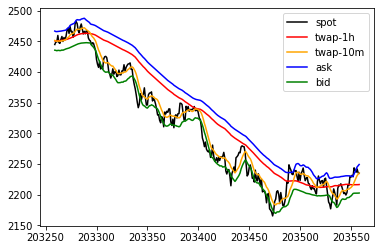

In [298]:
# zoom inaround 203200 to 203500
ax = ethusd_ftx_c_filtered[203200:203500].plot(c='k', label='spot')
twap_1h_geo_ftx[203200:203500].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203200:203500].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203200:203500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[203200:203500].plot(ax=ax, c='g', label='bid')

ax.legend()

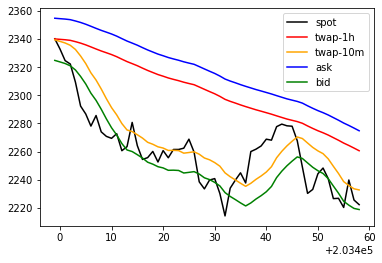

In [299]:
# zoom inaround 203200 to 203500
ax = ethusd_ftx_c_filtered[203340:203400].plot(c='k', label='spot')
twap_1h_geo_ftx[203340:203400].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203340:203400].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203340:203400].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[203340:203400].plot(ax=ax, c='g', label='bid')

ax.legend()

# There's a bit of profit here. Timeshift to check properly

In [300]:
window_1h_ftx

60

In [301]:
twap_1h_geo_ftx_ask_skew_10m_shift_1h_later = twap_1h_geo_ftx_ask_skew_10m.shift(periods=-window_1h_ftx)
twap_1h_geo_ftx_bid_skew_10m_shift_1h_later = twap_1h_geo_ftx_bid_skew_10m.shift(periods=-window_1h_ftx)

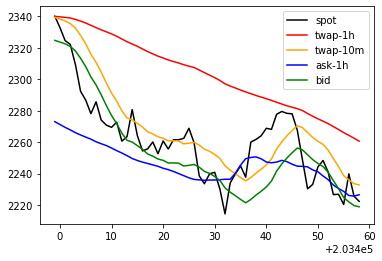

In [302]:
ax = ethusd_ftx_c_filtered[203340:203400].plot(c='k', label='spot')
twap_1h_geo_ftx[203340:203400].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203340:203400].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m_shift_1h_later[203340:203400].plot(ax=ax, c='b', label='ask-1h')
twap_1h_geo_ftx_bid_skew_10m[203340:203400].plot(ax=ax, c='g', label='bid')

ax.legend()

In [303]:
# Profit of 2.5% on scalp here if time properly. market impact will help substantially to mitigate
60/2320

0.02586206896551724

In [304]:
# Look at entire span w time shift.

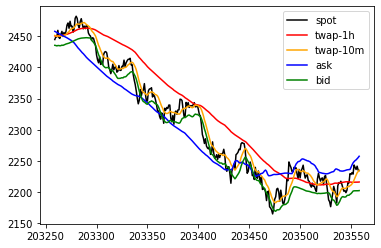

In [305]:
# zoom inaround 203200 to 203500
ax = ethusd_ftx_c_filtered[203200:203500].plot(c='k', label='spot')
twap_1h_geo_ftx[203200:203500].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203200:203500].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m_shift_1h_later[203200:203500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[203200:203500].plot(ax=ax, c='g', label='bid')

ax.legend()

# Is it more of a downward trend thing and this should be profitable? Likely. Timeshift by only 10m to check

In [306]:
twap_1h_geo_ftx_ask_skew_10m_shift_10m_later = twap_1h_geo_ftx_ask_skew_10m.shift(periods=-window_10m_ftx)
twap_1h_geo_ftx_bid_skew_10m_shift_10m_later = twap_1h_geo_ftx_bid_skew_10m.shift(periods=-window_10m_ftx)

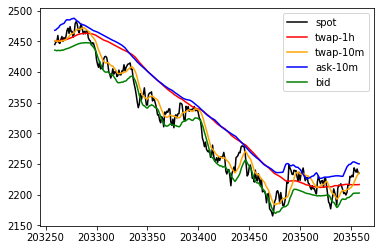

In [307]:
# zoom inaround 203200 to 203500
ax = ethusd_ftx_c_filtered[203200:203500].plot(c='k', label='spot')
twap_1h_geo_ftx[203200:203500].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203200:203500].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m_shift_10m_later[203200:203500].plot(ax=ax, c='b', label='ask-10m')
twap_1h_geo_ftx_bid_skew_10m[203200:203500].plot(ax=ax, c='g', label='bid')

ax.legend()

# Yes. More of a general downward trend to make money off of vs scalp. To be more conservative. check bid vs twap_shift_10m

# look at the long spike up around 203800

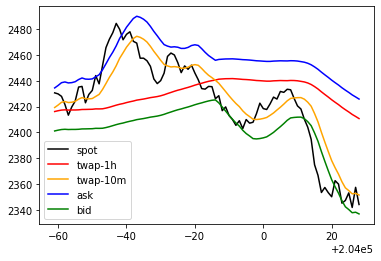

In [308]:
ax = ethusd_ftx_c_filtered[203880:203880+90].plot(c='k', label='spot')
twap_1h_geo_ftx[203880:203880+90].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203880:203880+90].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203880:203880+90].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[203880:203880+90].plot(ax=ax, c='g', label='bid')

ax.legend()

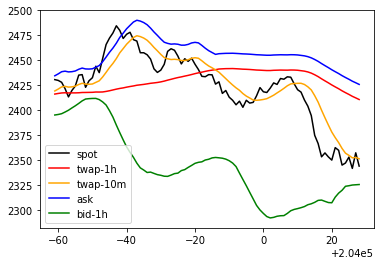

In [309]:
ax = ethusd_ftx_c_filtered[203880:203880+90].plot(c='k', label='spot')
twap_1h_geo_ftx[203880:203880+90].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203880:203880+90].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203880:203880+90].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m_shift_1h_later[203880:203880+90].plot(ax=ax, c='g', label='bid-1h')

ax.legend()

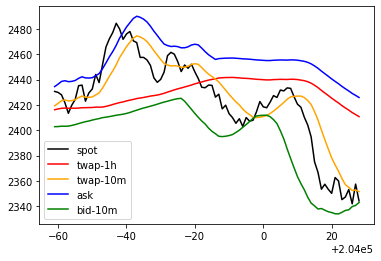

In [310]:
ax = ethusd_ftx_c_filtered[203880:203880+90].plot(c='k', label='spot')
twap_1h_geo_ftx[203880:203880+90].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203880:203880+90].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203880:203880+90].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m_shift_10m_later[203880:203880+90].plot(ax=ax, c='g', label='bid-10m')

ax.legend()

# still no profit on scalp! :) 

# Look at collapse in march 2020

In [311]:
FILENAME_FTX_2020 = "ethusd_01012020_08012020"

In [312]:
df_ftx_2020 = pd.read_csv(f"csv/{FILENAME_FTX_2020}.csv")
df_ftx_2020

t       o       h       l       c            v
0       1.577837e+12  128.59  128.59  128.48  128.50      0.00000
1       1.577837e+12  128.50  128.52  128.48  128.48      0.00000
2       1.577837e+12  128.44  128.47  128.42  128.42      0.00000
3       1.577837e+12  128.43  128.44  128.42  128.44      0.00000
4       1.577837e+12  128.43  128.43  128.29  128.34      0.00000
...              ...     ...     ...     ...     ...          ...
308115  1.596314e+12  387.36  387.73  387.36  387.70  10642.42935
308116  1.596314e+12  387.68  387.73  386.46  386.67  21154.51088
308117  1.596314e+12  386.67  387.00  386.40  386.50   1245.20724
308118  1.596314e+12  386.51  386.84  386.48  386.75  11233.66816
308119  1.596314e+12  386.75  386.75  385.45  385.87    963.73278

[308120 rows x 6 columns]

In [313]:
ethusd_ftx_2020_c = df_ftx_2020['c']
ethusd_ftx_2020_c

0         128.50
1         128.48
2         128.42
3         128.44
4         128.34
           ...  
308115    387.70
308116    386.67
308117    386.50
308118    386.75
308119    385.87
Name: c, Length: 308120, dtype: float64

In [314]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 60 steps (1m data) in this sim
twap_1h_geo_ftx_2020 = ethusd_ftx_2020_c.rolling(window=window_1h_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_1h_ftx), raw=True)
twap_1h_geo_ftx_2020 = twap_1h_geo_ftx_2020[~twap_1h_geo_ftx_2020.isnull()]
twap_1h_geo_ftx_2020

59        128.353815
60        128.351150
61        128.348984
62        128.349650
63        128.350816
             ...    
308115    385.822735
308116    385.797010
308117    385.763163
308118    385.752366
308119    385.723276
Name: c, Length: 308061, dtype: float64

In [315]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 60 steps (1m data) in this sim
twap_10m_geo_ftx_2020 = ethusd_ftx_2020_c.rolling(window=window_10m_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_10m_ftx), raw=True)
twap_10m_geo_ftx_2020 = twap_10m_geo_ftx_2020[~twap_10m_geo_ftx_2020.isnull()]
twap_10m_geo_ftx_2020

9         128.367971
10        128.348978
11        128.331986
12        128.322989
13        128.309995
             ...    
308115    386.829635
308116    386.905748
308117    386.888734
308118    386.905745
308119    386.874675
Name: c, Length: 308111, dtype: float64

In [316]:
# filter the 10m data
twap_10m_geo_ftx_2020 = twap_10m_geo_ftx_2020[50:]
twap_10m_geo_ftx_2020

59        128.286992
60        128.290991
61        128.297989
62        128.318982
63        128.344972
             ...    
308115    386.829635
308116    386.905748
308117    386.888734
308118    386.905745
308119    386.874675
Name: c, Length: 308061, dtype: float64

In [317]:
# and the spot data
ethusd_ftx_2020_c_filtered = ethusd_ftx_2020_c[59:]
ethusd_ftx_2020_c_filtered

59        128.36
60        128.34
61        128.35
62        128.46
63        128.51
           ...  
308115    387.70
308116    386.67
308117    386.50
308118    386.75
308119    385.87
Name: c, Length: 308061, dtype: float64

In [318]:
twap_1h_geo_ftx_2020_ask_skew_10m = pd.concat([twap_10m_geo_ftx_2020, twap_1h_geo_ftx_2020], axis=1).max(axis=1) * np.exp(delta_95p_ftx)
twap_1h_geo_ftx_2020_bid_skew_10m = pd.concat([twap_10m_geo_ftx_2020, twap_1h_geo_ftx_2020], axis=1).min(axis=1) * np.exp(-delta_95p_ftx)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


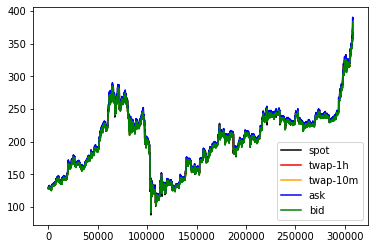

In [319]:
ax = ethusd_ftx_2020_c_filtered.plot(c='k', label='spot')
twap_1h_geo_ftx_2020.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020.plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m.plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m.plot(ax=ax, c='g', label='bid')

ax.legend()

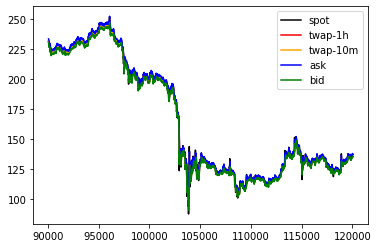

In [320]:
# Zoom in on Mar 12, 2020. 1d candle was -43.32%
ax = ethusd_ftx_2020_c_filtered[90000:120000].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[90000:120000].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[90000:120000].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m[90000:120000].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m[90000:120000].plot(ax=ax, c='g', label='bid')

ax.legend()

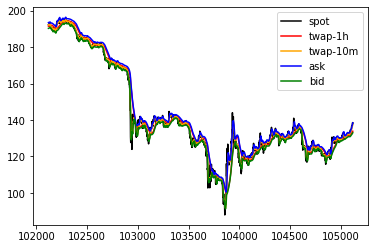

In [321]:
# Zoom in on Mar 12, 2020. 1d candle was -43.32%
ax = ethusd_ftx_2020_c_filtered[102060:105060].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102060:105060].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102060:105060].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m[102060:105060].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m[102060:105060].plot(ax=ax, c='g', label='bid')

ax.legend()

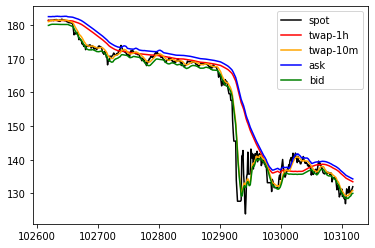

In [322]:
# Zoom in on Mar 12, 2020. 1d candle was -43.32%
ax = ethusd_ftx_2020_c_filtered[102560:103060].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102560:103060].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102560:103060].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m[102560:103060].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m[102560:103060].plot(ax=ax, c='g', label='bid')

ax.legend()

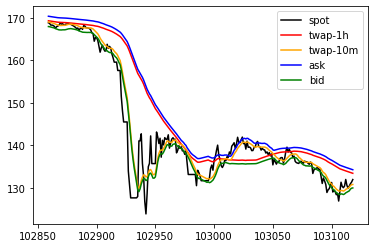

In [323]:
# Zoom in on Mar 12, 2020. 1d candle was -43.32%
ax = ethusd_ftx_2020_c_filtered[102800:103060].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102800:103060].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102800:103060].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m[102800:103060].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m[102800:103060].plot(ax=ax, c='g', label='bid')

ax.legend()

In [324]:
# 23.5% drop in an hour
40/170

0.23529411764705882

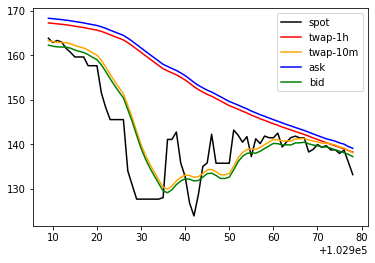

In [325]:
ax = ethusd_ftx_2020_c_filtered[102850:102920].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102850:102920].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102850:102920].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m[102850:102920].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m[102850:102920].plot(ax=ax, c='g', label='bid')

ax.legend()

In [326]:
# about 18% in 10m ...
30/160.0

0.1875

# Timeshift to check pnl ...

In [327]:
twap_1h_geo_ftx_2020_ask_skew_10m_shift_1h_later = twap_1h_geo_ftx_2020_ask_skew_10m.shift(periods=-window_1h_ftx)
twap_1h_geo_ftx_2020_bid_skew_10m_shift_1h_later = twap_1h_geo_ftx_2020_bid_skew_10m.shift(periods=-window_1h_ftx)

In [328]:
twap_1h_geo_ftx_2020_ask_skew_10m_shift_10m_later = twap_1h_geo_ftx_2020_ask_skew_10m.shift(periods=-window_10m_ftx)
twap_1h_geo_ftx_2020_bid_skew_10m_shift_10m_later = twap_1h_geo_ftx_2020_bid_skew_10m.shift(periods=-window_10m_ftx)

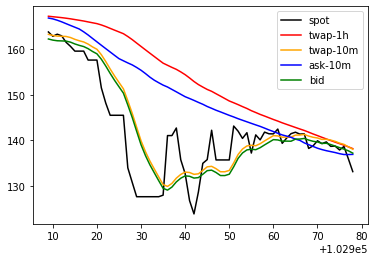

In [329]:
ax = ethusd_ftx_2020_c_filtered[102850:102920].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102850:102920].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102850:102920].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m_shift_10m_later[102850:102920].plot(ax=ax, c='b', label='ask-10m')
twap_1h_geo_ftx_2020_bid_skew_10m[102850:102920].plot(ax=ax, c='g', label='bid')

ax.legend()

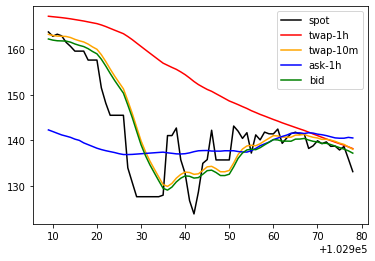

In [330]:
ax = ethusd_ftx_2020_c_filtered[102850:102920].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102850:102920].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102850:102920].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m_shift_1h_later[102850:102920].plot(ax=ax, c='b', label='ask-1h')
twap_1h_geo_ftx_2020_bid_skew_10m[102850:102920].plot(ax=ax, c='g', label='bid')

ax.legend()

In [331]:
# 12.5% profit if held thru the 1h. Market impact greatly needed.
20/160.0

0.125

In [332]:
15/160

0.09375

In [333]:
# PnL from market impact if -EV at 3.5% of cap
lambda_95p(0.035)

0.6510291646000596

In [334]:
np.exp(-lambda_95p(0.035)*0.0175)

0.9886716441925837

In [335]:
twap_1h_geo_ftx_2020_bid_skew_10m[102919]

159.50440698018483

In [336]:
twap_1h_geo_ftx_2020_bid_skew_10m[102919]*np.exp(-lambda_95p(0.035)*0.0175)

157.69748430506235

In [337]:
twap_1h_geo_ftx_2020_ask_skew_10m[102919+60]

138.68929316044654

In [338]:
# Scalp made in return
-(twap_1h_geo_ftx_2020_ask_skew_10m[102919+60]/twap_1h_geo_ftx_2020_bid_skew_10m[102919]*np.exp(lambda_95p(0.035)*0.0175)-1)

0.12053579185730623

In [339]:
# lost to scalp about 0.42% of OI cap on march 2020 collapse. Not terrible
0.12053579185730623*0.035

0.004218752715005719

# What's the max q i can enter to remain profitable with this?

In [340]:
# What's the max q i can enter to remain profitable with this?
def mar2020_short_scalp_pnl(q):
    return -(twap_1h_geo_ftx_2020_ask_skew_10m[102919+60]/twap_1h_geo_ftx_2020_bid_skew_10m[102919]*np.exp(lambda_95p(0.035)*q)-1)

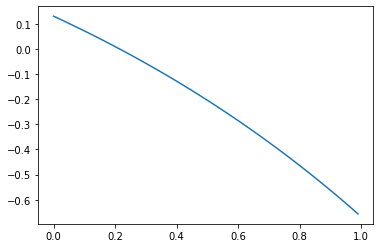

In [341]:
plt.plot(np.arange(0, 1, 0.01), [ mar2020_short_scalp_pnl(q) for q in np.arange(0, 1, 0.01) ])

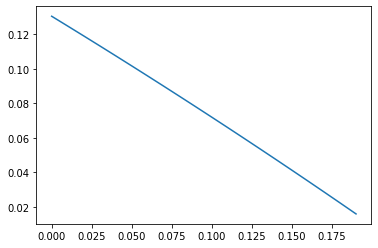

In [342]:
plt.plot(np.arange(0, 0.2, 0.01), [ mar2020_short_scalp_pnl(q) for q in np.arange(0, 0.2, 0.01) ])

# Nice only profitable to 0.18 times the OI cap if aped, but at 0.18 times OI cap, make only <2% pnl

# What's max nominal pnl? for given position size

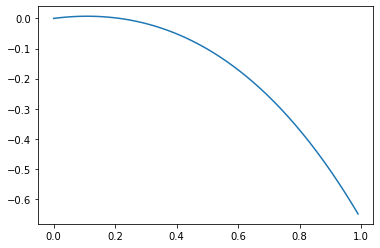

In [343]:
plt.plot(np.arange(0, 1, 0.01), [ q*mar2020_short_scalp_pnl(q) for q in np.arange(0, 1, 0.01) ])

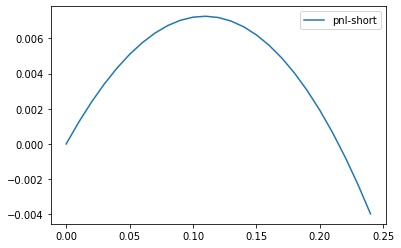

In [344]:
plt.plot(np.arange(0, 0.25, 0.01), [ q*mar2020_short_scalp_pnl(q) for q in np.arange(0, 0.25, 0.01) ], label='pnl-short')
plt.legend()

In [345]:
print([ q*mar2020_short_scalp_pnl(q) for q in np.arange(0, 0.25, 0.01) ][11])
print(0.11*mar2020_short_scalp_pnl(0.11))

0.007254181961006391
0.007254181961006391


# Optimal size for max pnl nominal on short scalp is around 11% of OI cap w slippage

## Worst case yields about 0.725% of OI cap in profits for scalp in largest drop of 2020 (~ -40% drop in 1d and -18% drop in 10m)

In [346]:
print(0.0175*mar2020_short_scalp_pnl(0.0175))
print(0.045*mar2020_short_scalp_pnl(0.045))
print(0.09*mar2020_short_scalp_pnl(0.09))

0.0021093763575028594
0.004709190917375918
0.007022716841976677


# Look at last two years from FTX data. See how much we would have lost to scalp.

# Are note 8 expressions conservative due to 1h TWAP?

# Using FTX ETH-USD 1m historical data: Jan 1, 2020 to Aug 23, 2021

In [347]:
df_ftx_2yr = pd.read_csv(f"csv/{FILENAME_FTX_2YR}.csv")
df_ftx_2yr

t        o        h        l        c             v
0       1.577837e+12   128.59   128.59   128.48   128.50  0.000000e+00
1       1.577837e+12   128.50   128.52   128.48   128.48  0.000000e+00
2       1.577837e+12   128.44   128.47   128.42   128.42  0.000000e+00
3       1.577837e+12   128.43   128.44   128.42   128.44  0.000000e+00
4       1.577837e+12   128.43   128.43   128.29   128.34  0.000000e+00
...              ...      ...      ...      ...      ...           ...
865240  1.629729e+12  3360.40  3362.60  3360.00  3361.40  3.156269e+05
865241  1.629729e+12  3361.40  3361.40  3352.10  3355.00  3.889148e+05
865242  1.629729e+12  3355.00  3355.00  3343.00  3347.80  9.464433e+05
865243  1.629729e+12  3347.80  3349.90  3335.20  3336.00  9.268230e+05
865244  1.629729e+12  3336.00  3339.20  3334.10  3334.80  1.016610e+06

[865245 rows x 6 columns]

In [348]:
# Use 2021 fit params since relatively close. Ideally we'd have a sim where update fits every month - couple of months, but doesn't change that much
# Use close prices
ethusd_ftx_2yr_c = df_ftx_2yr['c']
ethusd_ftx_2yr_c

0          128.50
1          128.48
2          128.42
3          128.44
4          128.34
           ...   
865240    3361.40
865241    3355.00
865242    3347.80
865243    3336.00
865244    3334.80
Name: c, Length: 865245, dtype: float64

In [349]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 60 steps (1m data) in this sim
twap_10m_geo_ftx_2yr = ethusd_ftx_2yr_c.rolling(window=window_10m_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_10m_ftx), raw=True)
twap_10m_geo_ftx_2yr = twap_10m_geo_ftx_2yr[~twap_10m_geo_ftx_2yr.isnull()]
twap_10m_geo_ftx_2yr

9          128.367971
10         128.348978
11         128.331986
12         128.322989
13         128.309995
             ...     
865240    3366.537554
865241    3364.816489
865242    3362.244273
865243    3359.045975
865244    3356.009100
Name: c, Length: 865236, dtype: float64

In [350]:
twap_1h_geo_ftx_2yr = ethusd_ftx_2yr_c.rolling(window=window_1h_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_1h_ftx), raw=True)
twap_1h_geo_ftx_2yr = twap_1h_geo_ftx_2yr[~twap_1h_geo_ftx_2yr.isnull()]
twap_1h_geo_ftx_2yr

59         128.353815
60         128.351150
61         128.348984
62         128.349650
63         128.350816
             ...     
865240    3353.379885
865241    3353.698989
865242    3353.871228
865243    3353.799224
865244    3353.683690
Name: c, Length: 865186, dtype: float64

In [351]:
ethusd_ftx_2yr_c_filtered = ethusd_ftx_2yr_c[59:]
ethusd_ftx_2yr_c_filtered

59         128.36
60         128.34
61         128.35
62         128.46
63         128.51
           ...   
865240    3361.40
865241    3355.00
865242    3347.80
865243    3336.00
865244    3334.80
Name: c, Length: 865186, dtype: float64

In [352]:
twap_10m_geo_ftx_2yr = twap_10m_geo_ftx_2yr[50:]

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


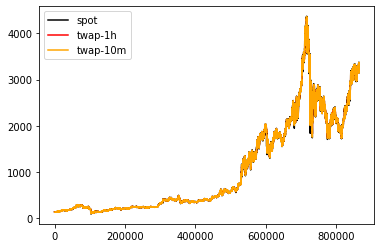

In [353]:
ax = ethusd_ftx_2yr_c_filtered.plot(c='k', label='spot')
twap_1h_geo_ftx_2yr.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr.plot(ax=ax, c='orange', label='twap-10m')
#twap_1h_geo_ftx_2yr_ask_skew_10m.plot(ax=ax, c='b', label='ask')
#twap_1h_geo_ftx_2yr_bid_skew_10m.plot(ax=ax, c='g', label='bid')
ax.legend()

In [354]:
deltas_ethusd_ftx = pd.read_csv(f"csv/metrics/{FILENAME_FTX_2YR}-deltas.csv")
print(deltas_ethusd_ftx[deltas_ethusd_ftx.alpha==0.05])
deltas_ethusd_ftx

   alpha    delta
2   0.05  0.00573


alpha     delta
0  0.010  0.017798
1  0.025  0.009250
2  0.050  0.005730
3  0.075  0.004338
4  0.100  0.003542

In [355]:
delta_ethusd_ftx_2yr_95p = float(deltas_ethusd_ftx[deltas_ethusd_ftx.alpha==0.05].delta)
delta_ethusd_ftx_2yr_95p

0.005729735572775284

In [356]:
twap_1h_geo_ftx_2yr_ask_skew_10m = pd.concat([twap_10m_geo_ftx_2yr, twap_1h_geo_ftx_2yr], axis=1).max(axis=1) * np.exp(delta_ethusd_ftx_2yr_95p)
twap_1h_geo_ftx_2yr_bid_skew_10m = pd.concat([twap_10m_geo_ftx_2yr, twap_1h_geo_ftx_2yr], axis=1).min(axis=1) * np.exp(-delta_ethusd_ftx_2yr_95p)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


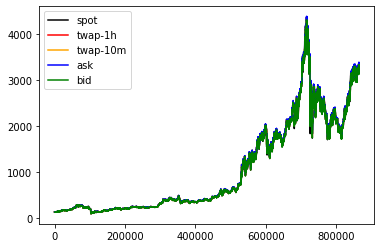

In [357]:
ax = ethusd_ftx_2yr_c_filtered.plot(c='k', label='spot')
twap_1h_geo_ftx_2yr.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr.plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m.plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m.plot(ax=ax, c='g', label='bid')
ax.legend()

# Strategy: if spot goes outside of static spread, deploy capital when jump happens before 10m window elapses. Exit after 1h once deploy

In [358]:
# Calc returns for trade when spot < bid or spot > ask
ret_tmp_1h_geo_ftx_2yr = pd.concat([ethusd_ftx_2yr_c_filtered, twap_1h_geo_ftx_2yr_bid_skew_10m, twap_1h_geo_ftx_2yr_ask_skew_10m], axis=1)
ret_tmp_1h_geo_ftx_2yr.columns = ['c', 'b', 'a']
ret_tmp_1h_geo_ftx_2yr

c            b            a
59       128.36   127.554043   129.091359
60       128.34   127.558019   129.088679
61       128.35   127.564978   129.086501
62       128.46   127.585850   129.087171
63       128.51   127.611692   129.088343
...         ...          ...          ...
865240  3361.40  3334.220845  3385.882292
865241  3355.00  3334.538126  3384.151336
865242  3347.80  3334.709381  3381.564341
865243  3336.00  3334.637789  3378.347664
865244  3334.80  3334.522915  3375.293339

[865186 rows x 3 columns]

In [359]:
# short trade return over the 1h
ret_tmp_short_1h_geo_ftx_2yr = -(ret_tmp_1h_geo_ftx_2yr.a.shift(periods=-window_1h_ftx)/ret_tmp_1h_geo_ftx_2yr.b - 1)
ret_tmp_short_1h_geo_ftx_2yr

59       -0.023446
60       -0.024021
61       -0.024549
62       -0.024665
63       -0.024828
            ...   
865240         NaN
865241         NaN
865242         NaN
865243         NaN
865244         NaN
Length: 865186, dtype: float64

In [360]:
# long trade return over the 1h
ret_tmp_long_1h_geo_ftx_2yr = (ret_tmp_1h_geo_ftx_2yr.b.shift(periods=-window_1h_ftx)/ret_tmp_1h_geo_ftx_2yr.a - 1)
ret_tmp_long_1h_geo_ftx_2yr

59       -0.004104
60       -0.003829
61       -0.003560
62       -0.003350
63       -0.003146
            ...   
865240         NaN
865241         NaN
865242         NaN
865243         NaN
865244         NaN
Length: 865186, dtype: float64

In [361]:
# diff between ask and closing price
ret_tmp_ask_v_c_1h_geo_ftx_2yr = ret_tmp_1h_geo_ftx_2yr.c/ret_tmp_1h_geo_ftx_2yr.a - 1
ret_tmp_ask_v_c_1h_geo_ftx_2yr

59       -0.005665
60       -0.005800
61       -0.005705
62       -0.004859
63       -0.004480
            ...   
865240   -0.007231
865241   -0.008614
865242   -0.009985
865243   -0.012535
865244   -0.011997
Length: 865186, dtype: float64

In [362]:
# diff between bid and closing price
ret_tmp_bid_v_c_1h_geo_ftx_2yr = ret_tmp_1h_geo_ftx_2yr.c/ret_tmp_1h_geo_ftx_2yr.b - 1
ret_tmp_bid_v_c_1h_geo_ftx_2yr

59        0.006319
60        0.006130
61        0.006154
62        0.006851
63        0.007039
            ...   
865240    0.008152
865241    0.006136
865242    0.003926
865243    0.000409
865244    0.000083
Length: 865186, dtype: float64

In [363]:
ret_1h_geo_ftx_2yr = pd.concat([ethusd_ftx_2yr_c_filtered, twap_1h_geo_ftx_2yr_bid_skew_10m, twap_1h_geo_ftx_2yr_ask_skew_10m, ret_tmp_ask_v_c_1h_geo_ftx_2yr, ret_tmp_long_1h_geo_ftx_2yr, ret_tmp_bid_v_c_1h_geo_ftx_2yr, ret_tmp_short_1h_geo_ftx_2yr], axis=1)
ret_1h_geo_ftx_2yr.columns = ['c', 'b', 'a', '(c-a)/a', 'r_long', '(c-b)/b', 'r_short']
ret_1h_geo_ftx_2yr

c            b            a   (c-a)/a    r_long   (c-b)/b  \
59       128.36   127.554043   129.091359 -0.005665 -0.004104  0.006319   
60       128.34   127.558019   129.088679 -0.005800 -0.003829  0.006130   
61       128.35   127.564978   129.086501 -0.005705 -0.003560  0.006154   
62       128.46   127.585850   129.087171 -0.004859 -0.003350  0.006851   
63       128.51   127.611692   129.088343 -0.004480 -0.003146  0.007039   
...         ...          ...          ...       ...       ...       ...   
865240  3361.40  3334.220845  3385.882292 -0.007231       NaN  0.008152   
865241  3355.00  3334.538126  3384.151336 -0.008614       NaN  0.006136   
865242  3347.80  3334.709381  3381.564341 -0.009985       NaN  0.003926   
865243  3336.00  3334.637789  3378.347664 -0.012535       NaN  0.000409   
865244  3334.80  3334.522915  3375.293339 -0.011997       NaN  0.000083   

         r_short  
59     -0.023446  
60     -0.024021  
61     -0.024549  
62     -0.024665  
63     -0.024828  
...          ...  
865240       NaN  
865241       NaN  
865242       NaN  
865243       NaN  
865244       NaN  

[865186 rows x 7 columns]

In [364]:
ret_1h_geo_ftx_2yr = ret_1h_geo_ftx_2yr[:len(ret_1h_geo_ftx_2yr)-window_1h_ftx]

In [365]:
ret_1h_geo_ftx_2yr

c            b            a   (c-a)/a    r_long   (c-b)/b  \
59       128.36   127.554043   129.091359 -0.005665 -0.004104  0.006319   
60       128.34   127.558019   129.088679 -0.005800 -0.003829  0.006130   
61       128.35   127.564978   129.086501 -0.005705 -0.003560  0.006154   
62       128.46   127.585850   129.087171 -0.004859 -0.003350  0.006851   
63       128.51   127.611692   129.088343 -0.004480 -0.003146  0.007039   
...         ...          ...          ...       ...       ...       ...   
865180  3337.50  3315.915170  3360.485679 -0.006840 -0.007816  0.006509   
865181  3335.90  3316.044419  3360.232739 -0.007241 -0.007647  0.005988   
865182  3337.50  3316.322748  3360.001658 -0.006697 -0.007527  0.006386   
865183  3340.30  3317.068285  3359.800844 -0.005804 -0.007489  0.007004   
865184  3341.70  3318.052592  3359.623507 -0.005335 -0.007471  0.007127   

         r_short  
59     -0.023446  
60     -0.024021  
61     -0.024549  
62     -0.024665  
63     -0.024828  
...          ...  
865180 -0.021100  
865181 -0.020539  
865182 -0.019673  
865183 -0.018474  
865184 -0.017251  

[865126 rows x 7 columns]

In [366]:
ret_1h_geo_ftx_2yr.sort_values('(c-a)/a', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
103873   116.07    98.031708   100.420817  0.155836  0.204818  0.184005   
103881   124.48    99.903153   113.221700  0.099436  0.097192  0.246007   
103874   110.30    99.308121   100.797585  0.094272  0.204727  0.110685   
103877   113.39    99.444442   106.081645  0.068894  0.156702  0.140235   
103886   126.76   100.909687   118.691553  0.067978  0.056932  0.256173   
...         ...          ...          ...       ...       ...       ...   
726815  2014.60  2220.118901  2593.566295 -0.223232 -0.113525 -0.092571   
726813  2014.20  2317.578655  2620.601827 -0.231398 -0.129424 -0.130903   
726814  1990.00  2271.668036  2606.819469 -0.236618 -0.121300 -0.123992   
726828  1872.00  2111.048913  2457.474272 -0.238242 -0.037988 -0.113237   
726829  1835.10  2062.447555  2441.057234 -0.248236 -0.027022 -0.110232   

         r_short  
103873 -0.389964  
103881 -0.397227  
103874 -0.380137  
103877 -0.394396  
103886 -0.367819  
...          ...  
726815 -0.123018  
726813 -0.067771  
726814 -0.091161  
726828 -0.147345  
726829 -0.171967  

[865126 rows x 7 columns]

In [367]:
ret_1h_geo_ftx_2yr.sort_values('r_long', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
103873   116.07    98.031708   100.420817  0.155836  0.204818  0.184005   
103874   110.30    99.308121   100.797585  0.094272  0.204727  0.110685   
103872   104.69    95.938805   100.300280  0.043766  0.202446  0.091216   
103871   100.13    94.867499   100.345812 -0.002151  0.195529  0.055472   
103875   109.14    99.323817   102.345777  0.066385  0.190972  0.098830   
...         ...          ...          ...       ...       ...       ...   
726771  2715.70  2686.755525  2760.255312 -0.016142 -0.269363  0.010773   
726772  2708.20  2685.258418  2757.740292 -0.017964 -0.273362  0.008544   
726775  2703.00  2681.523724  2745.512972 -0.015485 -0.274076  0.008009   
726773  2715.30  2683.912819  2753.990347 -0.014049 -0.274979  0.011695   
726774  2727.20  2682.785791  2750.829449 -0.008590 -0.275008  0.016555   

         r_short  
103873 -0.389964  
103874 -0.380137  
103872 -0.409050  
103871 -0.407461  
103875 -0.386804  
...          ...  
726771  0.101053  
726772  0.104483  
726775  0.114559  
726773  0.107892  
726774  0.111447  

[865126 rows x 7 columns]

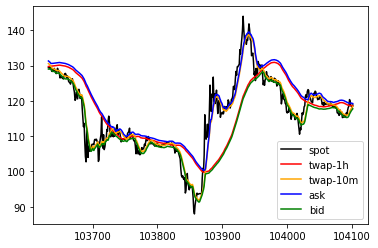

In [368]:
# Plot around 103873 to see what happened here ...
ax = ethusd_ftx_2yr_c_filtered[103873-60*4-60:103873-10-60+60*4].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[103873-60*4-60:103873-10-60+60*4].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[103873-60*4-60:103873-10-60+60*4].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[103873-60*4-60:103873-10-60+60*4].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[103873-60*4-60:103873-10-60+60*4].plot(ax=ax, c='g', label='bid')
ax.legend()

In [369]:
ethusd_ftx_2yr_c_filtered[103873-60:103873-60+1440]

103872    104.69
103873    116.07
103874    110.30
103875    109.14
103876    110.77
           ...  
105307    131.91
105308    131.91
105309    132.09
105310    131.77
105311    131.77
Name: c, Length: 1440, dtype: float64

In [370]:
103872*60/86400.0

72.13333333333334

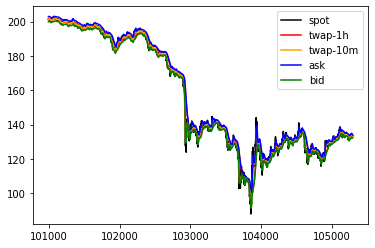

In [371]:
# Yea this was Mar 12
ax = ethusd_ftx_2yr_c_filtered[103873-60*48-60:103873-10-60+60*24].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[103873-60*48-60:103873-10-60+60*24].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[103873-60*48-60:103873-10-60+60*24].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[103873-60*48-60:103873-10-60+60*24].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[103873-60*48-60:103873-10-60+60*24].plot(ax=ax, c='g', label='bid')
ax.legend()

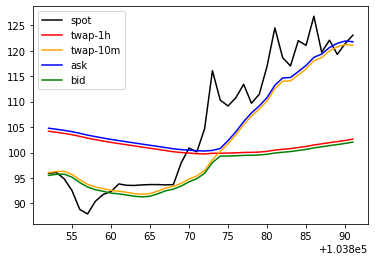

In [372]:
# eth-usd jumped about 20% in 5 minutes is what happened
# Ok when spike happens, don't know it won't come back down, but still looks pretty good potentially for pnl on trade
ax = ethusd_ftx_2yr_c_filtered[103873-10*2-60:103873+10*2-60].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[103873-10*2-60:103873+10*2-60].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[103873-10*2-60:103873+10*2-60].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[103873-10*2-60:103873+10*2-60].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[103873-10*2-60:103873+10*2-60].plot(ax=ax, c='g', label='bid')
ax.legend()

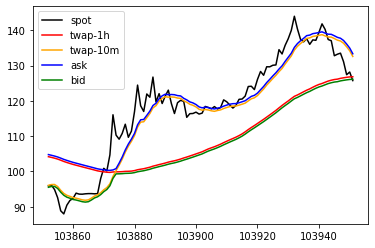

In [373]:
ax = ethusd_ftx_2yr_c_filtered[103873-10*2-60:103873+10*2-60+60].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[103873-10*2-60:103873+10*2-60+60].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[103873-10*2-60:103873+10*2-60+60].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[103873-10*2-60:103873+10*2-60+60].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[103873-10*2-60:103873+10*2-60+60].plot(ax=ax, c='g', label='bid')
ax.legend()

In [374]:
ret_1h_geo_ftx_2yr.sort_values('(c-b)/b', ascending=True)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.330174   407.131071 -0.194535 -0.086677 -0.157707   
308606   327.22   380.602634   405.737041 -0.193517 -0.084159 -0.140258   
726813  2014.20  2317.578655  2620.601827 -0.231398 -0.129424 -0.130903   
726814  1990.00  2271.668036  2606.819469 -0.236618 -0.121300 -0.123992   
726828  1872.00  2111.048913  2457.474272 -0.238242 -0.037988 -0.113237   
...         ...          ...          ...       ...       ...       ...   
103888   122.06   101.362291   120.618164  0.011954  0.043193  0.204195   
103891   123.05   102.047791   121.751605  0.010664  0.035941  0.205808   
103884   121.96   100.406626   115.895272  0.052329  0.079865  0.214661   
103881   124.48    99.903153   113.221700  0.099436  0.097192  0.246007   
103886   126.76   100.909687   118.691553  0.067978  0.056932  0.256173   

         r_short  
308605  0.030319  
308606  0.006008  
726813 -0.067771  
726814 -0.091161  
726828 -0.147345  
...          ...  
103888 -0.352932  
103891 -0.306939  
103884 -0.383183  
103881 -0.397227  
103886 -0.367819  

[865126 rows x 7 columns]

In [375]:
ret_1h_geo_ftx_2yr.sort_values('r_short', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
726784  2654.70  2670.031968  2704.113192 -0.018273 -0.175218 -0.005742   
726783  2666.10  2674.211239  2708.091911 -0.015506 -0.185740 -0.003033   
726785  2633.40  2663.075871  2702.857842 -0.025698 -0.163651 -0.011143   
102917   159.58   160.664214   167.132912 -0.045191 -0.175476 -0.006748   
102918   157.62   160.201718   166.936865 -0.055811 -0.177592 -0.016115   
...         ...          ...          ...       ...       ...       ...   
103868    93.71    92.813298   100.735091 -0.069738  0.171775  0.009661   
103870   100.88    94.254008   100.472121  0.004060  0.187375  0.070299   
103869    97.99    93.423968   100.579233 -0.025743  0.179985  0.048874   
103871   100.13    94.867499   100.345812 -0.002151  0.195529  0.055472   
103872   104.69    95.938805   100.300280  0.043766  0.202446  0.091216   

         r_short  
726784  0.133582  
726783  0.133145  
726785  0.132448  
102917  0.132370  
102918  0.132307  
...          ...  
103868 -0.400086  
103870 -0.404368  
103869 -0.404492  
103871 -0.407461  
103872 -0.409050  

[865126 rows x 7 columns]

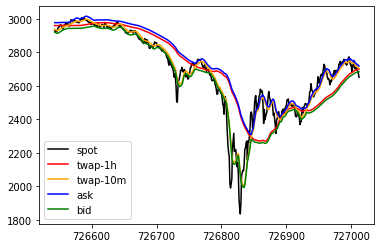

In [376]:
# what happened at 726784? and 308605?
# ah, The 726784 was the may 19 drop
ax = ethusd_ftx_2yr_c_filtered[726784-60*4-60:726784-10-60+60*4].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[726784-60*4-60:726784-10-60+60*4].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[726784-60*4-60:726784-10-60+60*4].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[726784-60*4-60:726784-10-60+60*4].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[726784-60*4-60:726784-10-60+60*4].plot(ax=ax, c='g', label='bid')
ax.legend()

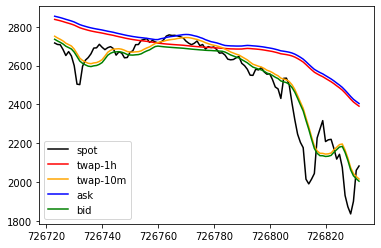

In [377]:
ax = ethusd_ftx_2yr_c_filtered[726784-60*1-60:726784-10-60+60*1].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[726784-60*1-60:726784-10-60+60*1].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[726784-60*1-60:726784-10-60+60*1].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[726784-60*1-60:726784-10-60+60*1].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[726784-60*1-60:726784-10-60+60*1].plot(ax=ax, c='g', label='bid')
ax.legend()

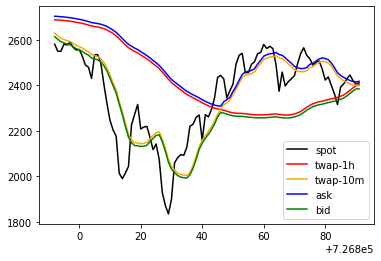

In [378]:
# More likely to go short where diff bw spot and bid is greatest: 726813
ax = ethusd_ftx_2yr_c_filtered[726813-10*2-60:726813+10*2-60+60*1].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[726813-10*2-60:726813+10*2-60+60*1].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[726813-10*2-60:726813+10*2-60+60*1].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[726813-10*2-60:726813+10*2-60+60*1].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[726813-10*2-60:726813+10*2-60+60*1].plot(ax=ax, c='g', label='bid')
ax.legend()

In [379]:
300/2600.0

0.11538461538461539

In [380]:
# Look at (c-a)/a and (c-b)/b as indicators for trade (what scalper would use).
# Then scalp and see profits if (c-a)/a and (c-b)/b are large enough
ret_1h_geo_ftx_2yr_sorted = ret_1h_geo_ftx_2yr.sort_values('(c-b)/b', ascending=True)
ret_1h_geo_ftx_2yr_sorted

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.330174   407.131071 -0.194535 -0.086677 -0.157707   
308606   327.22   380.602634   405.737041 -0.193517 -0.084159 -0.140258   
726813  2014.20  2317.578655  2620.601827 -0.231398 -0.129424 -0.130903   
726814  1990.00  2271.668036  2606.819469 -0.236618 -0.121300 -0.123992   
726828  1872.00  2111.048913  2457.474272 -0.238242 -0.037988 -0.113237   
...         ...          ...          ...       ...       ...       ...   
103888   122.06   101.362291   120.618164  0.011954  0.043193  0.204195   
103891   123.05   102.047791   121.751605  0.010664  0.035941  0.205808   
103884   121.96   100.406626   115.895272  0.052329  0.079865  0.214661   
103881   124.48    99.903153   113.221700  0.099436  0.097192  0.246007   
103886   126.76   100.909687   118.691553  0.067978  0.056932  0.256173   

         r_short  
308605  0.030319  
308606  0.006008  
726813 -0.067771  
726814 -0.091161  
726828 -0.147345  
...          ...  
103888 -0.352932  
103891 -0.306939  
103884 -0.383183  
103881 -0.397227  
103886 -0.367819  

[865126 rows x 7 columns]

In [381]:
ret_1h_geo_ftx_2yr_sorted[ret_1h_geo_ftx_2yr_sorted['(c-b)/b'] < 0]

c            b            a   (c-a)/a    r_long       (c-b)/b  \
308605   327.93   389.330174   407.131071 -0.194535 -0.086677 -1.577072e-01   
308606   327.22   380.602634   405.737041 -0.193517 -0.084159 -1.402582e-01   
726813  2014.20  2317.578655  2620.601827 -0.231398 -0.129424 -1.309033e-01   
726814  1990.00  2271.668036  2606.819469 -0.236618 -0.121300 -1.239917e-01   
726828  1872.00  2111.048913  2457.474272 -0.238242 -0.037988 -1.132370e-01   
...         ...          ...          ...       ...       ...           ...   
618041  1460.80  1460.802080  1493.227661 -0.021716 -0.033826 -1.423970e-06   
807862  1991.40  1991.402096  2017.467046 -0.012921 -0.021640 -1.052437e-06   
108393   119.65   119.650120   121.652574 -0.016461 -0.085873 -9.993917e-07   
341846   392.72   392.720275   399.777386 -0.017653 -0.021132 -7.003699e-07   
555547  1283.70  1283.700795  1309.064850 -0.019376 -0.022034 -6.194671e-07   

         r_short  
308605  0.030319  
308606  0.006008  
726813 -0.067771  
726814 -0.091161  
726828 -0.147345  
...          ...  
618041 -0.008443  
807862 -0.003093  
108393  0.047731  
341846 -0.010837  
555547 -0.017487  

[12473 rows x 7 columns]

In [382]:
# Look at cases where c/b-1 is < - 2 * delt_95
ret_short_1h_geo_ftx_2yr = ret_1h_geo_ftx_2yr[ret_1h_geo_ftx_2yr['(c-b)/b'] < -2*delta_ethusd_ftx_2yr_95p]
ret_short_1h_geo_ftx_2yr

c            b            a   (c-a)/a    r_long   (c-b)/b  \
24244    167.05   169.171579   173.062762 -0.034743 -0.029790 -0.012541   
26600    167.76   172.516720   175.855084 -0.046033 -0.061262 -0.027573   
26601    165.02   171.532184   175.682063 -0.060690 -0.061056 -0.037965   
26602    167.95   170.848811   175.560869 -0.043352 -0.061276 -0.016967   
26603    167.22   170.088213   175.428859 -0.046793 -0.061578 -0.016863   
...         ...          ...          ...       ...       ...       ...   
774151  1959.30  1993.331799  2026.340211 -0.033084 -0.025559 -0.017073   
774152  1965.80  1988.874781  2025.266819 -0.029362 -0.025716 -0.011602   
794448  2231.70  2262.928417  2309.285360 -0.033597 -0.047032 -0.013800   
825227  2326.40  2355.190584  2408.911079 -0.034252 -0.070351 -0.012224   
839199  2531.00  2578.622866  2633.044118 -0.038755 -0.015758 -0.018468   

         r_short  
24244  -0.006023  
26600   0.030620  
26601   0.025035  
26602   0.021437  
26603   0.017302  
...          ...  
774151 -0.009347  
774152 -0.011705  
794448  0.015289  
825227  0.025781  
839199 -0.022639  

[717 rows x 7 columns]

In [383]:
# only look at the unique occurrences of jumps ... might have to manually go through to see worst case pnl (to start)
short_windows = [[]]
short_windows_min_c_vs_bid = []
for i in range(len(ret_short_1h_geo_ftx_2yr.index)-1):
    last = short_windows[len(short_windows)-1]
    if len(last) == 0:
        short_windows[len(short_windows)-1].append(ret_short_1h_geo_ftx_2yr.index[i])
        short_windows_min_c_vs_bid.append(ret_short_1h_geo_ftx_2yr.index[i])
    elif ret_short_1h_geo_ftx_2yr.index[i] - last[-1] == 1:
        short_windows[len(short_windows)-1].append(ret_short_1h_geo_ftx_2yr.index[i])
        
        min_index = short_windows_min_c_vs_bid[len(short_windows)-1]
        new_min_index = ret_short_1h_geo_ftx_2yr.index[i]
        if ret_short_1h_geo_ftx_2yr.loc[new_min_index]['(c-b)/b'] < ret_short_1h_geo_ftx_2yr.loc[min_index]['(c-b)/b']:
            short_windows_min_c_vs_bid[len(short_windows)-1] = new_min_index
    else:
        short_windows.append([ret_short_1h_geo_ftx_2yr.index[i]])
        short_windows_min_c_vs_bid.append(ret_short_1h_geo_ftx_2yr.index[i])
        
print('len(short_windows):', len(short_windows))
print('short_windows[:10]:', short_windows[:10])
print('short_windows_min[:10]:', short_windows_min_c_vs_bid[:10])

len(short_windows): 323
short_windows[:10]: [[24244], [26600, 26601, 26602, 26603, 26604, 26605], [52704], [62437, 62438, 62439], [62788, 62789], [65814], [67239], [67267], [67269, 67270, 67271, 67272], [71891, 71892, 71893, 71894, 71895, 71896, 71897]]
short_windows_min[:10]: [24244, 26601, 52704, 62437, 62789, 65814, 67239, 67267, 67271, 71892]


In [384]:
# Within the windows, pick the point at which (c-b)/b is at its lowest
#ret_short_1h_geo_ftx_2yr.loc[67271]['(c-b)/b']

In [385]:
ret_short_1h_geo_ftx_2yr[ret_short_1h_geo_ftx_2yr.index.isin(short_windows_min_c_vs_bid)].sort_values('(c-b)/b', ascending=True)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.330174   407.131071 -0.194535 -0.086677 -0.157707   
726813  2014.20  2317.578655  2620.601827 -0.231398 -0.129424 -0.130903   
726828  1872.00  2111.048913  2457.474272 -0.238242 -0.037988 -0.113237   
102929   127.67   142.086817   162.275860 -0.213253 -0.185897 -0.101465   
187312   183.00   203.391406   210.865954 -0.132150 -0.096091 -0.100257   
...         ...          ...          ...       ...       ...       ...   
114500   144.32   145.998428   150.536252 -0.041294 -0.048214 -0.011496   
115034   123.92   125.358144   131.435098 -0.057177 -0.058656 -0.011472   
739543  2500.00  2529.003181  2574.152404 -0.028807 -0.042026 -0.011468   
608325  1418.20  1434.640334  1468.931566 -0.034536 -0.035252 -0.011460   
108836   104.75   105.964302   107.895701 -0.029155 -0.019848 -0.011460   

         r_short  
308605  0.030319  
726813 -0.067771  
726828 -0.147345  
102929  0.036194  
187312  0.051960  
...          ...  
114500  0.001758  
115034 -0.007570  
739543  0.003910  
608325 -0.010665  
108836 -0.028378  

[323 rows x 7 columns]

In [386]:
q0 = 0.05

In [387]:
# For each one of these window times, short the bid with optimal size
# Assume get c at some point for the ask exit price. Rough pnl is then -(c-b/b)
# Including market impact, know that will make in pnl ~ q*(1 - (ask/bid) * (1 + l*q))
#
# dpnl/dq = (1 - (ask/bid) * (1 + l*q)) + q * (-(ask/bid)*l) = 1 - (ask/bid) - 2*(ask/bid)*l*q
# .... critical when ... 
#     2*(ask/bid)*l*q = 1-ask/bid ... q = (1/(2*l)) * (bid/ask - 1)
#   but since taking ask ~ c .... q_c = (1/(2*l)) * (b/c - 1)
#
# pnl_c = q*[1 - (c/b)*(1+[(1/2) * (b/c - 1)])] = q * [ 1 - c/b - (1/2)*(1 - c/b) ]
#       = q/2 * [ 1 - c/b ]
#
# So each time, compute q_c
l = float(df_lambda_stable_eth_usd[df_lambda_stable_eth_usd.q==q0]["lambda-stable"])
print('l', l)
qc_short_1h_geo_ftx_2yr = (ret_short_1h_geo_ftx_2yr.b/ret_short_1h_geo_ftx_2yr.c - 1)/(2*l)
qc_short_1h_geo_ftx_2yr

l 0.6270323264825496


24244     0.010127
26600     0.022610
26601     0.031468
26602     0.013763
26603     0.013677
            ...   
774151    0.013850
774152    0.009360
794448    0.011158
825227    0.009868
839199    0.015004
Length: 717, dtype: float64

In [388]:
pnl_short_hypothesis_1h_geo_ftx_2y = qc_short_1h_geo_ftx_2yr * np.exp(-l*qc_short_1h_geo_ftx_2yr) * (1-(ret_short_1h_geo_ftx_2yr.c/ret_short_1h_geo_ftx_2yr.b)) - qc_short_1h_geo_ftx_2yr * (1-np.exp(-l*qc_short_1h_geo_ftx_2yr))
pnl_short_hypothesis_1h_geo_ftx_2y

24244     0.000062
26600     0.000296
26601     0.000557
26602     0.000113
26603     0.000112
            ...   
774151    0.000115
774152    0.000053
794448    0.000075
825227    0.000059
839199    0.000134
Length: 717, dtype: float64

In [389]:
max(pnl_short_hypothesis_1h_geo_ftx_2y)

0.008098756228403687

In [390]:
# TODO: In reality, max pnl is less due to 1h twap. need to cycle through 1h after to check ...

In [391]:
short_hypothesis_1h_geo_ftx_2yr = pd.concat([ret_short_1h_geo_ftx_2yr, qc_short_1h_geo_ftx_2yr, pnl_short_hypothesis_1h_geo_ftx_2y], axis=1)
short_hypothesis_1h_geo_ftx_2yr.columns = ['c', 'b', 'a', '(c-a)/a', 'r_long', '(c-b)/b', 'r_short', 'qc_short', 'pnl_short_hypothesis']
short_hypothesis_1h_geo_ftx_2yr

c            b            a   (c-a)/a    r_long   (c-b)/b  \
24244    167.05   169.171579   173.062762 -0.034743 -0.029790 -0.012541   
26600    167.76   172.516720   175.855084 -0.046033 -0.061262 -0.027573   
26601    165.02   171.532184   175.682063 -0.060690 -0.061056 -0.037965   
26602    167.95   170.848811   175.560869 -0.043352 -0.061276 -0.016967   
26603    167.22   170.088213   175.428859 -0.046793 -0.061578 -0.016863   
...         ...          ...          ...       ...       ...       ...   
774151  1959.30  1993.331799  2026.340211 -0.033084 -0.025559 -0.017073   
774152  1965.80  1988.874781  2025.266819 -0.029362 -0.025716 -0.011602   
794448  2231.70  2262.928417  2309.285360 -0.033597 -0.047032 -0.013800   
825227  2326.40  2355.190584  2408.911079 -0.034252 -0.070351 -0.012224   
839199  2531.00  2578.622866  2633.044118 -0.038755 -0.015758 -0.018468   

         r_short  qc_short  pnl_short_hypothesis  
24244  -0.006023  0.010127              0.000062  
26600   0.030620  0.022610              0.000296  
26601   0.025035  0.031468              0.000557  
26602   0.021437  0.013763              0.000113  
26603   0.017302  0.013677              0.000112  
...          ...       ...                   ...  
774151 -0.009347  0.013850              0.000115  
774152 -0.011705  0.009360              0.000053  
794448  0.015289  0.011158              0.000075  
825227  0.025781  0.009868              0.000059  
839199 -0.022639  0.015004              0.000134  

[717 rows x 9 columns]

In [392]:
short_hypothesis_1h_geo_ftx_2yr.sort_values('qc_short', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.330174   407.131071 -0.194535 -0.086677 -0.157707   
308606   327.22   380.602634   405.737041 -0.193517 -0.084159 -0.140258   
726813  2014.20  2317.578655  2620.601827 -0.231398 -0.129424 -0.130903   
726814  1990.00  2271.668036  2606.819469 -0.236618 -0.121300 -0.123992   
726828  1872.00  2111.048913  2457.474272 -0.238242 -0.037988 -0.113237   
...         ...          ...          ...       ...       ...       ...   
115034   123.92   125.358144   131.435098 -0.057177 -0.058656 -0.011472   
717393  3824.20  3868.565708  4068.246761 -0.059988 -0.053416 -0.011468   
739543  2500.00  2529.003181  2574.152404 -0.028807 -0.042026 -0.011468   
608325  1418.20  1434.640334  1468.931566 -0.034536 -0.035252 -0.011460   
108836   104.75   105.964302   107.895701 -0.029155 -0.019848 -0.011460   

         r_short  qc_short  pnl_short_hypothesis  
308605  0.030319  0.149303              0.008099  
308606  0.006008  0.130089              0.006627  
726813 -0.067771  0.120105              0.005869  
726814 -0.091161  0.112866              0.005327  
726828 -0.147345  0.101827              0.004519  
...          ...       ...                   ...  
115034 -0.007570  0.009254              0.000052  
717393 -0.023177  0.009251              0.000052  
739543  0.003910  0.009251              0.000052  
608325 -0.010665  0.009244              0.000052  
108836 -0.028378  0.009244              0.000052  

[717 rows x 9 columns]

In [393]:
# only look at unique values
short_hypothesis_1h_geo_ftx_2yr_max_c_v_b = short_hypothesis_1h_geo_ftx_2yr[short_hypothesis_1h_geo_ftx_2yr.index.isin(short_windows_min_c_vs_bid)]
short_hypothesis_1h_geo_ftx_2yr_max_c_v_b.sort_values('pnl_short_hypothesis', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.330174   407.131071 -0.194535 -0.086677 -0.157707   
726813  2014.20  2317.578655  2620.601827 -0.231398 -0.129424 -0.130903   
726828  1872.00  2111.048913  2457.474272 -0.238242 -0.037988 -0.113237   
102929   127.67   142.086817   162.275860 -0.213253 -0.185897 -0.101465   
187312   183.00   203.391406   210.865954 -0.132150 -0.096091 -0.100257   
...         ...          ...          ...       ...       ...       ...   
114500   144.32   145.998428   150.536252 -0.041294 -0.048214 -0.011496   
115034   123.92   125.358144   131.435098 -0.057177 -0.058656 -0.011472   
739543  2500.00  2529.003181  2574.152404 -0.028807 -0.042026 -0.011468   
608325  1418.20  1434.640334  1468.931566 -0.034536 -0.035252 -0.011460   
108836   104.75   105.964302   107.895701 -0.029155 -0.019848 -0.011460   

         r_short  qc_short  pnl_short_hypothesis  
308605  0.030319  0.149303              0.008099  
726813 -0.067771  0.120105              0.005869  
726828 -0.147345  0.101827              0.004519  
102929  0.036194  0.090045              0.003692  
187312  0.051960  0.088854              0.003610  
...          ...       ...                   ...  
114500  0.001758  0.009274              0.000052  
115034 -0.007570  0.009254              0.000052  
739543  0.003910  0.009251              0.000052  
608325 -0.010665  0.009244              0.000052  
108836 -0.028378  0.009244              0.000052  

[323 rows x 9 columns]

In [394]:
# Hypothesis pnl (bleeding on short scalp) over time (2y) is ...
short_hypothesis_1h_geo_ftx_2yr_max_c_v_b['pnl_short_hypothesis'].sum()

0.08777942589876726

In [395]:
# So look at bid prices 1h after enter short. pick bid which maximizes profit for worst case scalp return (as if trader knew price beforehand)
print('short_windows_min_c_vs_bid', short_windows_min_c_vs_bid)

short_windows_min_c_vs_bid [24244, 26601, 52704, 62437, 62789, 65814, 67239, 67267, 67271, 71892, 82177, 97497, 97502, 97943, 97949, 102716, 102903, 102918, 102929, 102942, 102968, 102978, 102985, 103050, 103092, 103096, 103106, 103252, 103510, 103514, 103516, 103527, 103532, 103564, 103673, 103677, 103689, 103693, 103695, 103709, 103718, 103767, 103770, 103827, 103843, 103849, 103857, 103963, 103991, 103995, 103997, 103999, 104006, 104019, 104021, 104235, 104238, 104389, 104618, 104625, 104655, 104811, 104851, 104895, 107943, 107949, 108398, 108405, 108411, 108495, 108499, 108501, 108651, 108836, 109218, 109222, 111904, 113755, 113899, 114500, 114611, 114613, 114930, 115011, 115014, 115034, 115040, 115161, 117412, 118134, 125322, 148424, 159640, 173142, 173490, 180690, 187312, 189734, 189832, 202622, 221325, 230543, 234421, 252580, 257644, 300583, 301080, 308605, 308990, 313957, 316353, 316517, 320430, 353609, 353620, 355110, 355124, 355315, 355791, 356711, 357940, 358017, 358393, 358

In [396]:
short_windows_min_ask_1h_later_index = []
short_windows_min_ask_1h_later_value = []
for i in short_windows_min_c_vs_bid:
    short_windows_min_ask_1h_later_index.append(i)
    short_windows_min_ask_1h_later_value.append(ret_1h_geo_ftx_2yr.loc[i].a)
    for j in range(i, i+window_1h_ftx):
        last_index = short_windows_min_ask_1h_later_index[-1]
        last_ask = short_windows_min_ask_1h_later_value[-1]
        if last_ask > ret_1h_geo_ftx_2yr.loc[j].a:
            short_windows_min_ask_1h_later_index[-1] = j
            short_windows_min_ask_1h_later_value[-1] = ret_1h_geo_ftx_2yr.loc[j].a

print('short indexes for min ask', short_windows_min_ask_1h_later_index)

short indexes for min ask [24302, 26660, 52735, 62496, 62845, 65872, 67298, 67302, 67302, 71929, 82201, 97533, 97533, 98002, 98004, 102775, 102962, 102977, 102987, 102987, 102987, 102987, 102987, 103109, 103123, 103123, 103123, 103301, 103569, 103573, 103575, 103586, 103589, 103589, 103732, 103736, 103748, 103752, 103752, 103752, 103752, 103826, 103829, 103872, 103872, 103872, 103872, 104022, 104032, 104032, 104032, 104032, 104065, 104071, 104071, 104238, 104238, 104447, 104677, 104680, 104694, 104866, 104866, 104901, 107998, 107998, 108457, 108462, 108470, 108554, 108557, 108557, 108708, 108878, 109277, 109281, 111963, 113812, 113939, 114559, 114651, 114651, 114975, 115070, 115071, 115071, 115071, 115218, 117471, 118137, 125381, 148474, 159699, 173143, 173526, 180749, 187371, 189786, 189867, 202680, 221384, 230602, 234449, 252639, 257703, 300642, 301127, 308664, 309038, 314016, 316406, 316576, 320479, 353662, 353662, 355164, 355178, 355372, 355834, 356753, 357999, 358050, 358444, 3584

In [397]:
df_short_windows_min_ask_1h_later = pd.DataFrame(data=short_windows_min_ask_1h_later_value, index=short_windows_min_c_vs_bid)
df_short_windows_min_ask_1h_later.columns = ['a+1h']
df_short_windows_min_ask_1h_later

a+1h
24244    170.155375
26601    167.234185
52704    213.240971
62437    261.982930
62789    271.800602
...             ...
773979  2031.401191
773984  2028.919378
774151  2011.189546
794448  2228.640387
825227  2295.808467

[323 rows x 1 columns]

In [398]:
short_1h_geo_ftx_2yr_max_c_v_b_a_1h = pd.concat([short_hypothesis_1h_geo_ftx_2yr_max_c_v_b, df_short_windows_min_ask_1h_later], axis=1)
short_1h_geo_ftx_2yr_max_c_v_b_a_1h

c            b            a   (c-a)/a    r_long   (c-b)/b  \
24244    167.05   169.171579   173.062762 -0.034743 -0.029790 -0.012541   
26601    165.02   171.532184   175.682063 -0.060690 -0.061056 -0.037965   
52704    205.38   210.774492   215.553653 -0.047198 -0.022277 -0.025594   
62437    258.23   264.071221   270.681264 -0.046000 -0.045291 -0.022120   
62789    265.30   269.449637   274.510858 -0.033554 -0.023639 -0.015400   
...         ...          ...          ...       ...       ...       ...   
773979  2033.80  2082.933022  2132.754068 -0.046397 -0.063655 -0.023588   
773984  2011.60  2038.495764  2126.148240 -0.053876 -0.062404 -0.013194   
774151  1959.30  1993.331799  2026.340211 -0.033084 -0.025559 -0.017073   
794448  2231.70  2262.928417  2309.285360 -0.033597 -0.047032 -0.013800   
825227  2326.40  2355.190584  2408.911079 -0.034252 -0.070351 -0.012224   

         r_short  qc_short  pnl_short_hypothesis         a+1h  
24244  -0.006023  0.010127              0.000062   170.155375  
26601   0.025035  0.031468              0.000557   167.234185  
52704  -0.018874  0.020945              0.000256   213.240971  
62437   0.007796  0.018038              0.000192   261.982930  
62789  -0.009234  0.012472              0.000093   271.800602  
...          ...       ...                   ...          ...  
773979  0.024931  0.019264              0.000218  2031.401191  
773984  0.004684  0.010662              0.000069  2028.919378  
774151 -0.009347  0.013850              0.000115  2011.189546  
794448  0.015289  0.011158              0.000075  2228.640387  
825227  0.025781  0.009868              0.000059  2295.808467  

[323 rows x 10 columns]

In [399]:
# So in reality, if entered in w qc_short and exited at perfect ask timing, would have in pnl ...
pnl_short_actual_1h_geo_ftx_2y_w_mkt_impact = short_1h_geo_ftx_2yr_max_c_v_b_a_1h.qc_short * np.exp(-l*short_1h_geo_ftx_2yr_max_c_v_b_a_1h.qc_short) * (1-(short_1h_geo_ftx_2yr_max_c_v_b_a_1h['a+1h']/short_1h_geo_ftx_2yr_max_c_v_b_a_1h.b)) - short_1h_geo_ftx_2yr_max_c_v_b_a_1h.qc_short * (1 - np.exp(-l*short_1h_geo_ftx_2yr_max_c_v_b_a_1h.qc_short))
pnl_short_actual_1h_geo_ftx_2y_w_mkt_impact

24244    -0.000123
26601     0.000158
52704    -0.000515
62437    -0.000062
62789    -0.000205
            ...   
773979    0.000240
773984   -0.000021
774151   -0.000243
794448    0.000090
825227    0.000186
Length: 323, dtype: float64

In [400]:
# Do it without market impact to compare ...
pnl_short_actual_1h_geo_ftx_2y = short_1h_geo_ftx_2yr_max_c_v_b_a_1h.qc_short * (1-(short_1h_geo_ftx_2yr_max_c_v_b_a_1h['a+1h']/short_1h_geo_ftx_2yr_max_c_v_b_a_1h.b))
pnl_short_actual_1h_geo_ftx_2y

24244    -0.000059
26601     0.000788
52704    -0.000245
62437     0.000143
62789    -0.000109
            ...   
773979    0.000477
773984    0.000050
774151   -0.000124
794448    0.000169
825227    0.000249
Length: 323, dtype: float64

In [401]:
short_actual_1h_geo_ftx_2yr_max_c_v_b = pd.concat([short_1h_geo_ftx_2yr_max_c_v_b_a_1h, pnl_short_actual_1h_geo_ftx_2y, pnl_short_actual_1h_geo_ftx_2y_w_mkt_impact], axis=1)
short_actual_1h_geo_ftx_2yr_max_c_v_b.columns = list(short_1h_geo_ftx_2yr_max_c_v_b_a_1h.columns) + ['pnl_short_actual', 'pnl_short_actual_w_mkt_impact']
short_actual_1h_geo_ftx_2yr_max_c_v_b

c            b            a   (c-a)/a    r_long   (c-b)/b  \
24244    167.05   169.171579   173.062762 -0.034743 -0.029790 -0.012541   
26601    165.02   171.532184   175.682063 -0.060690 -0.061056 -0.037965   
52704    205.38   210.774492   215.553653 -0.047198 -0.022277 -0.025594   
62437    258.23   264.071221   270.681264 -0.046000 -0.045291 -0.022120   
62789    265.30   269.449637   274.510858 -0.033554 -0.023639 -0.015400   
...         ...          ...          ...       ...       ...       ...   
773979  2033.80  2082.933022  2132.754068 -0.046397 -0.063655 -0.023588   
773984  2011.60  2038.495764  2126.148240 -0.053876 -0.062404 -0.013194   
774151  1959.30  1993.331799  2026.340211 -0.033084 -0.025559 -0.017073   
794448  2231.70  2262.928417  2309.285360 -0.033597 -0.047032 -0.013800   
825227  2326.40  2355.190584  2408.911079 -0.034252 -0.070351 -0.012224   

         r_short  qc_short  pnl_short_hypothesis         a+1h  \
24244  -0.006023  0.010127              0.000062   170.155375   
26601   0.025035  0.031468              0.000557   167.234185   
52704  -0.018874  0.020945              0.000256   213.240971   
62437   0.007796  0.018038              0.000192   261.982930   
62789  -0.009234  0.012472              0.000093   271.800602   
...          ...       ...                   ...          ...   
773979  0.024931  0.019264              0.000218  2031.401191   
773984  0.004684  0.010662              0.000069  2028.919378   
774151 -0.009347  0.013850              0.000115  2011.189546   
794448  0.015289  0.011158              0.000075  2228.640387   
825227  0.025781  0.009868              0.000059  2295.808467   

        pnl_short_actual  pnl_short_actual_w_mkt_impact  
24244          -0.000059                      -0.000123  
26601           0.000788                       0.000158  
52704          -0.000245                      -0.000515  
62437           0.000143                      -0.000062  
62789          -0.000109                      -0.000205  
...                  ...                            ...  
773979          0.000477                       0.000240  
773984          0.000050                      -0.000021  
774151         -0.000124                      -0.000243  
794448          0.000169                       0.000090  
825227          0.000249                       0.000186  

[323 rows x 12 columns]

In [402]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.sort_values('pnl_short_actual_w_mkt_impact', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
726804  2430.80  2521.074188  2676.484023 -0.091794 -0.154913 -0.035808   
103673   120.16   123.695264   128.989051 -0.068448 -0.142740 -0.028580   
726793  2550.90  2603.030042  2703.519771 -0.056452 -0.162544 -0.020027   
102918   157.62   160.201718   166.936865 -0.055811 -0.177592 -0.016115   
102903   161.92   164.292792   168.781813 -0.040655 -0.170951 -0.014442   
...         ...          ...          ...       ...       ...       ...   
102942   123.90   131.822253   153.799541 -0.194406 -0.131147 -0.060098   
103857    87.95    93.236516   103.419182 -0.149577  0.075474 -0.056700   
726813  2014.20  2317.578655  2620.601827 -0.231398 -0.129424 -0.130903   
308605   327.93   389.330174   407.131071 -0.194535 -0.086677 -0.157707   
726828  1872.00  2111.048913  2457.474272 -0.238242 -0.037988 -0.113237   

         r_short  qc_short  pnl_short_hypothesis         a+1h  \
726804 -0.009362  0.029614              0.000496  2308.558553   
103673  0.090667  0.023461              0.000318   112.494365   
726793  0.059558  0.016296              0.000157  2308.558553   
102918  0.132307  0.013061              0.000102   139.397046   
102903  0.121375  0.011685              0.000082   144.693421   
...          ...       ...                   ...          ...   
102942 -0.042837  0.050987              0.001364   136.838063   
103857 -0.294420  0.047931              0.001218   100.300280   
726813 -0.067771  0.120105              0.005869  2308.558553   
308605  0.030319  0.149303              0.008099   376.765209   
726828 -0.147345  0.101827              0.004519  2308.558553   

        pnl_short_actual  pnl_short_actual_w_mkt_impact  
726804          0.002496                       0.001906  
103673          0.002124                       0.001751  
726793          0.001843                       0.001659  
102918          0.001696                       0.001576  
102903          0.001394                       0.001299  
...                  ...                            ...  
102942         -0.001940                      -0.003483  
103857         -0.003631                      -0.004943  
726813          0.000467                      -0.008279  
308605          0.004818                      -0.008955  
726828         -0.009527                      -0.015236  

[323 rows x 12 columns]

In [403]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.sort_values('pnl_short_hypothesis', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.330174   407.131071 -0.194535 -0.086677 -0.157707   
726813  2014.20  2317.578655  2620.601827 -0.231398 -0.129424 -0.130903   
726828  1872.00  2111.048913  2457.474272 -0.238242 -0.037988 -0.113237   
102929   127.67   142.086817   162.275860 -0.213253 -0.185897 -0.101465   
187312   183.00   203.391406   210.865954 -0.132150 -0.096091 -0.100257   
...         ...          ...          ...       ...       ...       ...   
114500   144.32   145.998428   150.536252 -0.041294 -0.048214 -0.011496   
115034   123.92   125.358144   131.435098 -0.057177 -0.058656 -0.011472   
739543  2500.00  2529.003181  2574.152404 -0.028807 -0.042026 -0.011468   
608325  1418.20  1434.640334  1468.931566 -0.034536 -0.035252 -0.011460   
108836   104.75   105.964302   107.895701 -0.029155 -0.019848 -0.011460   

         r_short  qc_short  pnl_short_hypothesis         a+1h  \
308605  0.030319  0.149303              0.008099   376.765209   
726813 -0.067771  0.120105              0.005869  2308.558553   
726828 -0.147345  0.101827              0.004519  2308.558553   
102929  0.036194  0.090045              0.003692   136.838063   
187312  0.051960  0.088854              0.003610   192.846660   
...          ...       ...                   ...          ...   
114500  0.001758  0.009274              0.000052   145.736956   
115034 -0.007570  0.009254              0.000052   125.464372   
739543  0.003910  0.009251              0.000052  2499.215080   
608325 -0.010665  0.009244              0.000052  1436.774438   
108836 -0.028378  0.009244              0.000052   106.552071   

        pnl_short_actual  pnl_short_actual_w_mkt_impact  
308605          0.004818                      -0.008955  
726813          0.000467                      -0.008279  
726828         -0.009527                      -0.015236  
102929          0.003326                      -0.001799  
187312          0.004607                      -0.000458  
...                  ...                            ...  
114500          0.000017                      -0.000037  
115034         -0.000008                      -0.000061  
739543          0.000109                       0.000055  
608325         -0.000014                      -0.000067  
108836         -0.000051                      -0.000104  

[323 rows x 12 columns]

# For hypothetical worst case: What was expected to be a 0.8% profitable scalp at the max drop, ultimately ended up being a loss of -0.9%

## Realized scalps are order of magnitude less than hypothesis for worst case

In [404]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.pnl_short_actual_w_mkt_impact.sum()

-0.10622460785984003

# Short scalping ended up losing money over time, due to choice of q with market impact for trade. 10.6% of OI cap loss over the 1.5 years of trading.

# Had hypothesized 8.8% of OI cap gain. Even without market impact, short scalp only made 0.0226% of OI cap

In [405]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.pnl_short_hypothesis.sum()

0.08777942589876726

In [406]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.pnl_short_actual.sum()

0.00022587014471481606

# Average pnl of scalp?

In [407]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.pnl_short_actual.sum()/len(short_actual_1h_geo_ftx_2yr_max_c_v_b.pnl_short_actual)

6.992883737300807e-07

In [408]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.pnl_short_actual_w_mkt_impact.sum()/len(short_actual_1h_geo_ftx_2yr_max_c_v_b.pnl_short_actual)

-0.00032886875498402485

# Finally, try to have just 0.025 of OI cap as qc each time, for EV approach. what's the PnL?

In [409]:
print('l', l)
print('q_ev', 0.05/2.0)
print('q_ev', q0/2.0)

l 0.6270323264825496
q_ev 0.025
q_ev 0.025


In [410]:
df_short_q_ev = pd.DataFrame(data=[ q0/2.0 for _ in range(len(short_windows_min_c_vs_bid)) ], index=short_windows_min_c_vs_bid)
df_short_q_ev.columns = ['q_ev']
df_short_q_ev

q_ev
24244   0.025
26601   0.025
52704   0.025
62437   0.025
62789   0.025
...       ...
773979  0.025
773984  0.025
774151  0.025
794448  0.025
825227  0.025

[323 rows x 1 columns]

In [411]:
short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev = pd.concat([short_actual_1h_geo_ftx_2yr_max_c_v_b, df_short_q_ev], axis=1)
short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev.columns = list(short_actual_1h_geo_ftx_2yr_max_c_v_b.columns) + [ 'q_ev' ]
short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev

c            b            a   (c-a)/a    r_long   (c-b)/b  \
24244    167.05   169.171579   173.062762 -0.034743 -0.029790 -0.012541   
26601    165.02   171.532184   175.682063 -0.060690 -0.061056 -0.037965   
52704    205.38   210.774492   215.553653 -0.047198 -0.022277 -0.025594   
62437    258.23   264.071221   270.681264 -0.046000 -0.045291 -0.022120   
62789    265.30   269.449637   274.510858 -0.033554 -0.023639 -0.015400   
...         ...          ...          ...       ...       ...       ...   
773979  2033.80  2082.933022  2132.754068 -0.046397 -0.063655 -0.023588   
773984  2011.60  2038.495764  2126.148240 -0.053876 -0.062404 -0.013194   
774151  1959.30  1993.331799  2026.340211 -0.033084 -0.025559 -0.017073   
794448  2231.70  2262.928417  2309.285360 -0.033597 -0.047032 -0.013800   
825227  2326.40  2355.190584  2408.911079 -0.034252 -0.070351 -0.012224   

         r_short  qc_short  pnl_short_hypothesis         a+1h  \
24244  -0.006023  0.010127              0.000062   170.155375   
26601   0.025035  0.031468              0.000557   167.234185   
52704  -0.018874  0.020945              0.000256   213.240971   
62437   0.007796  0.018038              0.000192   261.982930   
62789  -0.009234  0.012472              0.000093   271.800602   
...          ...       ...                   ...          ...   
773979  0.024931  0.019264              0.000218  2031.401191   
773984  0.004684  0.010662              0.000069  2028.919378   
774151 -0.009347  0.013850              0.000115  2011.189546   
794448  0.015289  0.011158              0.000075  2228.640387   
825227  0.025781  0.009868              0.000059  2295.808467   

        pnl_short_actual  pnl_short_actual_w_mkt_impact   q_ev  
24244          -0.000059                      -0.000123  0.025  
26601           0.000788                       0.000158  0.025  
52704          -0.000245                      -0.000515  0.025  
62437           0.000143                      -0.000062  0.025  
62789          -0.000109                      -0.000205  0.025  
...                  ...                            ...    ...  
773979          0.000477                       0.000240  0.025  
773984          0.000050                      -0.000021  0.025  
774151         -0.000124                      -0.000243  0.025  
794448          0.000169                       0.000090  0.025  
825227          0.000249                       0.000186  0.025  

[323 rows x 13 columns]

In [412]:
pnl_short_actual_1h_geo_ftx_2y_w_qev_mkt_impact = short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev.q_ev * np.exp(-l*short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev.q_ev) * (1-(short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev['a+1h']/short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev.b)) - short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev.q_ev * (1-np.exp(-l*short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev.q_ev))
pnl_short_actual_1h_geo_ftx_2y_w_qev_mkt_impact

24244    -0.000532
26601     0.000228
52704    -0.000677
62437    -0.000194
62789    -0.000604
            ...   
773979    0.000220
773984   -0.000273
774151   -0.000609
794448   -0.000016
825227    0.000232
Length: 323, dtype: float64

In [413]:
pnl_short_actual_1h_geo_ftx_2y_w_qev = short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev.q_ev * (1-(short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev['a+1h']/short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev.b))
pnl_short_actual_1h_geo_ftx_2y_w_qev

24244    -0.000145
26601     0.000626
52704    -0.000293
62437     0.000198
62789    -0.000218
            ...   
773979    0.000619
773984    0.000117
774151   -0.000224
794448    0.000379
825227    0.000630
Length: 323, dtype: float64

In [414]:
short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev_pnl = pd.concat([short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev, pnl_short_actual_1h_geo_ftx_2y_w_qev, pnl_short_actual_1h_geo_ftx_2y_w_qev_mkt_impact], axis=1)
short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev_pnl.columns = list(short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev.columns) + [ 'pnl_short_ev_actual', 'pnl_short_ev_actual_w_mkt_impact' ]
short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev_pnl

c            b            a   (c-a)/a    r_long   (c-b)/b  \
24244    167.05   169.171579   173.062762 -0.034743 -0.029790 -0.012541   
26601    165.02   171.532184   175.682063 -0.060690 -0.061056 -0.037965   
52704    205.38   210.774492   215.553653 -0.047198 -0.022277 -0.025594   
62437    258.23   264.071221   270.681264 -0.046000 -0.045291 -0.022120   
62789    265.30   269.449637   274.510858 -0.033554 -0.023639 -0.015400   
...         ...          ...          ...       ...       ...       ...   
773979  2033.80  2082.933022  2132.754068 -0.046397 -0.063655 -0.023588   
773984  2011.60  2038.495764  2126.148240 -0.053876 -0.062404 -0.013194   
774151  1959.30  1993.331799  2026.340211 -0.033084 -0.025559 -0.017073   
794448  2231.70  2262.928417  2309.285360 -0.033597 -0.047032 -0.013800   
825227  2326.40  2355.190584  2408.911079 -0.034252 -0.070351 -0.012224   

         r_short  qc_short  pnl_short_hypothesis         a+1h  \
24244  -0.006023  0.010127              0.000062   170.155375   
26601   0.025035  0.031468              0.000557   167.234185   
52704  -0.018874  0.020945              0.000256   213.240971   
62437   0.007796  0.018038              0.000192   261.982930   
62789  -0.009234  0.012472              0.000093   271.800602   
...          ...       ...                   ...          ...   
773979  0.024931  0.019264              0.000218  2031.401191   
773984  0.004684  0.010662              0.000069  2028.919378   
774151 -0.009347  0.013850              0.000115  2011.189546   
794448  0.015289  0.011158              0.000075  2228.640387   
825227  0.025781  0.009868              0.000059  2295.808467   

        pnl_short_actual  pnl_short_actual_w_mkt_impact   q_ev  \
24244          -0.000059                      -0.000123  0.025   
26601           0.000788                       0.000158  0.025   
52704          -0.000245                      -0.000515  0.025   
62437           0.000143                      -0.000062  0.025   
62789          -0.000109                      -0.000205  0.025   
...                  ...                            ...    ...   
773979          0.000477                       0.000240  0.025   
773984          0.000050                      -0.000021  0.025   
774151         -0.000124                      -0.000243  0.025   
794448          0.000169                       0.000090  0.025   
825227          0.000249                       0.000186  0.025   

        pnl_short_ev_actual  pnl_short_ev_actual_w_mkt_impact  
24244             -0.000145                         -0.000532  
26601              0.000626                          0.000228  
52704             -0.000293                         -0.000677  
62437              0.000198                         -0.000194  
62789             -0.000218                         -0.000604  
...                     ...                               ...  
773979             0.000619                          0.000220  
773984             0.000117                         -0.000273  
774151            -0.000224                         -0.000609  
794448             0.000379                         -0.000016  
825227             0.000630                          0.000232  

[323 rows x 15 columns]

In [415]:
short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev_pnl.sort_values('pnl_short_ev_actual_w_mkt_impact', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
102918   157.62   160.201718   166.936865 -0.055811 -0.177592 -0.016115   
102903   161.92   164.292792   168.781813 -0.040655 -0.170951 -0.014442   
726793  2550.90  2603.030042  2703.519771 -0.056452 -0.162544 -0.020027   
103673   120.16   123.695264   128.989051 -0.068448 -0.142740 -0.028580   
103677   120.57   122.131151   128.264840 -0.059992 -0.142796 -0.012783   
...         ...          ...          ...       ...       ...       ...   
730199  2109.80  2156.054059  2282.171419 -0.075530  0.012075 -0.021453   
542483   941.00   974.464440  1041.107721 -0.096155 -0.024036 -0.034341   
104021   111.83   113.180805   121.603365 -0.080371 -0.039624 -0.011935   
103857    87.95    93.236516   103.419182 -0.149577  0.075474 -0.056700   
726828  1872.00  2111.048913  2457.474272 -0.238242 -0.037988 -0.113237   

         r_short  qc_short  pnl_short_hypothesis         a+1h  \
102918  0.132307  0.013061              0.000102   139.397046   
102903  0.121375  0.011685              0.000082   144.693421   
726793  0.059558  0.016296              0.000157  2308.558553   
103673  0.090667  0.023461              0.000318   112.494365   
103677  0.087035  0.010325              0.000064   111.363905   
...          ...       ...                   ...          ...   
730199 -0.099707  0.017482              0.000180  2263.919298   
542483 -0.062534  0.028358              0.000457  1024.031278   
104021 -0.061700  0.009632              0.000056   119.545273   
103857 -0.294420  0.047931              0.001218   100.300280   
726828 -0.147345  0.101827              0.004519  2308.558553   

        pnl_short_actual  pnl_short_actual_w_mkt_impact   q_ev  \
102918          0.001696                       0.001576  0.025   
102903          0.001394                       0.001299  0.025   
726793          0.001843                       0.001659  0.025   
103673          0.002124                       0.001751  0.025   
103677          0.000910                       0.000838  0.025   
...                  ...                            ...    ...   
730199         -0.000875                      -0.001056  0.025   
542483         -0.001442                      -0.001917  0.025   
104021         -0.000542                      -0.000596  0.025   
103857         -0.003631                      -0.004943  0.025   
726828         -0.009527                      -0.015236  0.025   

        pnl_short_ev_actual  pnl_short_ev_actual_w_mkt_impact  
102918             0.003247                          0.002807  
102903             0.002982                          0.002547  
726793             0.002828                          0.002395  
103673             0.002264                          0.001840  
103677             0.002204                          0.001781  
...                     ...                               ...  
730199            -0.001251                         -0.001620  
542483            -0.001272                         -0.001641  
104021            -0.001406                         -0.001773  
103857            -0.001894                         -0.002253  
726828            -0.002339                         -0.002691  

[323 rows x 15 columns]

In [416]:
print('cumulative ev trade w/o mkt impact', short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev_pnl.pnl_short_ev_actual.sum())
print('cumulative ev trade w/ mkt impact', short_actual_1h_geo_ftx_2yr_max_c_v_b_w_qev_pnl.pnl_short_ev_actual_w_mkt_impact.sum())

cumulative ev trade w/o mkt impact 0.0035335569113676187
cumulative ev trade w/ mkt impact -0.12211657864711203


# Without market impact, ev q size trade is profitable for 0.35% of OI cap won over 1.5 years.

# With market impact, ev q size trade loses about 12.21% of OI cap over 1.5 years

# Repeat for long to check good there as well

In [417]:
# Look at cases where c/a-1 is > + 2 * delt_95
ret_long_1h_geo_ftx_2yr = ret_1h_geo_ftx_2yr[ret_1h_geo_ftx_2yr['(c-a)/a'] > 2*delta_ethusd_ftx_2yr_95p]
ret_long_1h_geo_ftx_2yr

c            b            a   (c-a)/a    r_long   (c-b)/b  \
3404     132.80   128.557709   131.249707  0.011812 -0.002052  0.032999   
19752    159.46   153.888462   157.402127  0.013074  0.022105  0.036205   
19826    169.22   162.038767   167.054575  0.012962 -0.021075  0.044318   
19827    170.73   162.208420   167.618729  0.018562 -0.024654  0.052535   
73031    257.98   251.461230   254.798866  0.012485 -0.013442  0.025924   
...         ...          ...          ...       ...       ...       ...   
839279  2745.50  2612.413307  2697.887837  0.017648  0.027342  0.050944   
839280  2756.80  2614.706860  2706.887816  0.018439  0.024132  0.054344   
839281  2762.50  2617.152598  2715.066837  0.017470  0.021208  0.055536   
839282  2764.10  2619.580793  2724.038641  0.014707  0.017984  0.055169   
839283  2774.00  2622.038967  2732.834355  0.015063  0.014792  0.057955   

         r_short  
3404   -0.032403  
19752  -0.074067  
19826  -0.026771  
19827  -0.025047  
73031  -0.018947  
...          ...  
839279 -0.075490  
839280 -0.074451  
839281 -0.073020  
839282 -0.071688  
839283 -0.070250  

[357 rows x 7 columns]

In [418]:
# only look at the unique occurrences of jumps ... might have to manually go through to see worst case pnl (to start)
long_windows = [[]]
long_windows_max_c_vs_ask = []
for i in range(len(ret_long_1h_geo_ftx_2yr.index)-1):
    last = long_windows[-1]
    if len(last) == 0:
        long_windows[-1].append(ret_long_1h_geo_ftx_2yr.index[i])
        long_windows_max_c_vs_ask.append(ret_long_1h_geo_ftx_2yr.index[i])
    elif ret_long_1h_geo_ftx_2yr.index[i] - last[-1] == 1:
        long_windows[-1].append(ret_long_1h_geo_ftx_2yr.index[i])
        
        max_index = long_windows_max_c_vs_ask[-1]
        new_max_index = ret_long_1h_geo_ftx_2yr.index[i]
        if ret_long_1h_geo_ftx_2yr.loc[new_max_index]['(c-a)/a'] > ret_long_1h_geo_ftx_2yr.loc[max_index]['(c-a)/a']:
            long_windows_max_c_vs_ask[-1] = new_max_index
    else:
        long_windows.append([ret_long_1h_geo_ftx_2yr.index[i]])
        long_windows_max_c_vs_ask.append(ret_long_1h_geo_ftx_2yr.index[i])
        
print('len(long_windows):', len(long_windows))
print('long_windows[:10]:', long_windows[:10])
print('long_windows_max[:30]:', long_windows_max_c_vs_ask[:30])

len(long_windows): 162
long_windows[:10]: [[3404], [19752], [19826, 19827], [73031], [103003], [103015, 103016, 103017], [103020], [103121], [103139], [103153]]
long_windows_max[:30]: [3404, 19752, 19827, 73031, 103003, 103015, 103020, 103121, 103139, 103153, 103159, 103308, 103310, 103725, 103738, 103757, 103873, 103888, 103909, 103932, 103941, 104032, 104135, 104139, 104193, 104195, 104199, 104207, 104317, 104531]


In [419]:
ret_long_1h_geo_ftx_2yr[:30]

c           b           a   (c-a)/a    r_long   (c-b)/b   r_short
3404    132.80  128.557709  131.249707  0.011812 -0.002052  0.032999 -0.032403
19752   159.46  153.888462  157.402127  0.013074  0.022105  0.036205 -0.074067
19826   169.22  162.038767  167.054575  0.012962 -0.021075  0.044318 -0.026771
19827   170.73  162.208420  167.618729  0.018562 -0.024654  0.052535 -0.025047
73031   257.98  251.461230  254.798866  0.012485 -0.013442  0.025924 -0.018947
103003  140.07  134.454020  137.663070  0.017484 -0.008522  0.041769 -0.035853
103015  139.81  135.819384  137.689546  0.015400 -0.014226  0.029382 -0.025334
103016  140.17  135.802491  138.182405  0.014384 -0.019446  0.032161 -0.024924
103017  140.64  135.810714  138.768669  0.013485 -0.024217  0.035559 -0.024328
103020  141.92  135.759498  140.108816  0.012927 -0.034688  0.045378 -0.023054
103121  135.94  131.342928  134.092179  0.013780  0.025753  0.035001 -0.071303
103139  139.14  132.076758  136.835130  0.016844  0.013842  0.053478 -0.065295
103153  140.47  132.895845  138.749260  0.012402 -0.000611  0.056993 -0.059474
103159  142.14  133.900213  140.513959  0.011572 -0.016669  0.061537 -0.050508
103306  141.85  136.940045  139.857661  0.014245  0.006380  0.035855 -0.043062
103307  142.31  136.977402  140.339373  0.014042  0.003794  0.038930 -0.042821
103308  144.70  137.052806  141.062609  0.025786 -0.000846  0.055797 -0.041983
103310  144.51  137.158476  142.022413  0.017515 -0.006913  0.053599 -0.040900
103725  115.68  109.419813  113.532105  0.018919 -0.056896  0.057213 -0.002920
103738  113.24  109.797938  111.845942  0.012464 -0.042379  0.031349  0.006798
103757  112.27  109.142578  110.730871  0.013900 -0.033090  0.028654  0.005947
103872  104.69   95.938805  100.300280  0.043766  0.202446  0.091216 -0.409050
103873  116.07   98.031708  100.420817  0.155836  0.204818  0.184005 -0.389964
103874  110.30   99.308121  100.797585  0.094272  0.204727  0.110685 -0.380137
103875  109.14   99.323817  102.345777  0.066385  0.190972  0.098830 -0.386804
103876  110.77   99.365595  104.071916  0.064360  0.175465  0.114772 -0.393946
103877  113.39   99.444442  106.081645  0.068894  0.156702  0.140235 -0.394396
103878  109.68   99.469415  107.764172  0.017778  0.142912  0.102651 -0.398163
103879  111.44   99.522024  109.159197  0.020894  0.132222  0.119752 -0.398889
103880  116.94   99.661426  110.783768  0.055570  0.118898  0.173373 -0.398779

In [420]:
# For each one of these window times, short the bid with optimal size
# Assume get c at some point for the ask exit price. Rough pnl is then (c-a/a)
# Including market impact, know that will make in pnl ~ q*((b/a) * (1 - l*q) - 1)
#
# dpnl/dq = ((b/a) * (1 - l*q) - 1) + q * (-(b/a)*l) = -1 + (b/a) - 2*(b/a)*l*q
# .... critical when ... 
#     2*(b/a)*l*q = -1+b/a ... q = (1/(2*l)) * (1 - a/b)
#   but since taking bid ~ c ....
#
# q_c = (1/(2*l)) * (1 - a/c)
#
# pnl_c = q*[(c/a)*(1 - (1/2)*(1-a/c)) - 1] = q*[1/2*(c/a) - 1/2 ]
#       = q/2 * [ c/a - 1 ]
#
# So each time, compute q_c
qc_long_1h_geo_ftx_2yr = (1-ret_long_1h_geo_ftx_2yr.a/ret_long_1h_geo_ftx_2yr.c)/(2*l)
qc_long_1h_geo_ftx_2yr

3404      0.009309
19752     0.010291
19826     0.010204
19827     0.014531
73031     0.009833
            ...   
839279    0.013829
839280    0.014437
839281    0.013692
839282    0.011557
839283    0.011833
Length: 357, dtype: float64

In [421]:
pnl_long_hypothesis_1h_geo_ftx_2y = qc_long_1h_geo_ftx_2yr * np.exp(-l*qc_long_1h_geo_ftx_2yr) * ((ret_long_1h_geo_ftx_2yr.c / ret_long_1h_geo_ftx_2yr.a) - 1) - qc_long_1h_geo_ftx_2yr * (1-np.exp(-l*qc_long_1h_geo_ftx_2yr))
pnl_long_hypothesis_1h_geo_ftx_2y

3404      0.000055
19752     0.000067
19826     0.000066
19827     0.000135
73031     0.000062
            ...   
839279    0.000123
839280    0.000134
839281    0.000120
839282    0.000085
839283    0.000089
Length: 357, dtype: float64

In [422]:
max(pnl_long_hypothesis_1h_geo_ftx_2y)

0.008653141968751141

In [423]:
long_hypothesis_1h_geo_ftx_2yr = pd.concat([ret_long_1h_geo_ftx_2yr, qc_long_1h_geo_ftx_2yr, pnl_long_hypothesis_1h_geo_ftx_2y], axis=1)
long_hypothesis_1h_geo_ftx_2yr.columns = ['c', 'b', 'a', '(c-a)/a', 'r_long', '(c-b)/b', 'r_short', 'qc_long', 'pnl_long_hypothesis']
long_hypothesis_1h_geo_ftx_2yr.sort_values('pnl_long_hypothesis', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
103873   116.07    98.031708   100.420817  0.155836  0.204818  0.184005   
103881   124.48    99.903153   113.221700  0.099436  0.097192  0.246007   
103874   110.30    99.308121   100.797585  0.094272  0.204727  0.110685   
103877   113.39    99.444442   106.081645  0.068894  0.156702  0.140235   
103886   126.76   100.909687   118.691553  0.067978  0.056932  0.256173   
...         ...          ...          ...       ...       ...       ...   
731304  2386.30  2325.662460  2359.168360  0.011501 -0.003118  0.026073   
730217  2336.00  2236.654383  2309.443574  0.011499  0.017558  0.044417   
531304   937.03   907.278240   926.403245  0.011471  0.017552  0.032792   
741138  2459.40  2397.738917  2431.517515  0.011467 -0.012006  0.025716   
604329  1522.50  1451.394779  1505.249108  0.011460  0.007319  0.048991   

         r_short   qc_long  pnl_long_hypothesis  
103873 -0.389964  0.107511             0.008653  
103881 -0.397227  0.072120             0.003666  
103874 -0.380137  0.068697             0.003307  
103877 -0.394396  0.051395             0.001799  
103886 -0.367819  0.050756             0.001752  
...          ...       ...                  ...  
731304 -0.025445  0.009066             0.000052  
730217 -0.080639  0.009065             0.000052  
531304 -0.053008  0.009043             0.000052  
741138 -0.022666  0.009040             0.000052  
604329 -0.064405  0.009035             0.000052  

[357 rows x 9 columns]

In [424]:
# only look at unique values
long_hypothesis_1h_geo_ftx_2yr_max = long_hypothesis_1h_geo_ftx_2yr[long_hypothesis_1h_geo_ftx_2yr.index.isin(long_windows_max_c_vs_ask)]
long_hypothesis_1h_geo_ftx_2yr_max.sort_values('pnl_long_hypothesis', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
103873   116.07    98.031708   100.420817  0.155836  0.204818  0.184005   
103932   144.01   120.605640   135.182527  0.065300 -0.090765  0.194057   
726846  2444.10  2281.244334  2308.558553  0.058713  0.061605  0.071389   
726852  2532.60  2264.220248  2423.096718  0.045191  0.013616  0.118531   
293829   265.47   246.693101   254.525492  0.043000  0.031228  0.076114   
...         ...          ...          ...       ...       ...       ...   
115073   127.69   123.977229   126.210303  0.011724  0.011284  0.029947   
604330  1525.20  1453.088840  1507.718809  0.011594  0.005498  0.049626   
103159   142.14   133.900213   140.513959  0.011572 -0.016669  0.061537   
532993  1090.64  1027.299342  1078.203782  0.011534  0.017846  0.061657   
741138  2459.40  2397.738917  2431.517515  0.011467 -0.012006  0.025716   

         r_short   qc_long  pnl_long_hypothesis  
103873 -0.389964  0.107511             0.008653  
103932 -0.076339  0.048879             0.001620  
726846 -0.097171  0.044221             0.001316  
726852 -0.105071  0.034478             0.000787  
293829 -0.078311  0.032875             0.000714  
...          ...       ...                  ...  
115073 -0.059804  0.009241             0.000054  
604330 -0.063248  0.009140             0.000053  
103159 -0.050508  0.009122             0.000053  
532993 -0.080935  0.009093             0.000053  
741138 -0.022666  0.009040             0.000052  

[162 rows x 9 columns]

In [425]:
long_hypothesis_1h_geo_ftx_2yr_max

c            b            a   (c-a)/a    r_long   (c-b)/b  \
3404     132.80   128.557709   131.249707  0.011812 -0.002052  0.032999   
19752    159.46   153.888462   157.402127  0.013074  0.022105  0.036205   
19827    170.73   162.208420   167.618729  0.018562 -0.024654  0.052535   
73031    257.98   251.461230   254.798866  0.012485 -0.013442  0.025924   
103003   140.07   134.454020   137.663070  0.017484 -0.008522  0.041769   
...         ...          ...          ...       ...       ...       ...   
776513  1914.40  1849.941216  1891.713104  0.011993  0.027418  0.034844   
783573  1920.00  1827.301962  1895.492049  0.012930  0.018787  0.050729   
817913  2022.20  1958.907705  1988.575693  0.016909 -0.021010  0.032310   
824086  2337.30  2217.545570  2284.347187  0.023181  0.000544  0.054003   
839280  2756.80  2614.706860  2706.887816  0.018439  0.024132  0.054344   

         r_short   qc_long  pnl_long_hypothesis  
3404   -0.032403  0.009309             0.000055  
19752  -0.074067  0.010291             0.000067  
19827  -0.025047  0.014531             0.000135  
73031  -0.018947  0.009833             0.000062  
103003 -0.035853  0.013702             0.000120  
...          ...       ...                  ...  
776513 -0.075484  0.009450             0.000057  
783573 -0.071126  0.010179             0.000066  
817913 -0.019409  0.013259             0.000113  
824086 -0.049288  0.018066             0.000211  
839280 -0.074451  0.014437             0.000134  

[162 rows x 9 columns]

In [426]:
long_windows_max_bid_1h_later_index = []
long_windows_max_bid_1h_later_value = []
for i in long_windows_max_c_vs_ask:
    long_windows_max_bid_1h_later_index.append(i)
    long_windows_max_bid_1h_later_value.append(ret_1h_geo_ftx_2yr.loc[i].b)
    for j in range(i, i+window_1h_ftx):
        last_index = long_windows_max_bid_1h_later_index[-1]
        last_bid = long_windows_max_bid_1h_later_value[-1]
        if last_bid < ret_1h_geo_ftx_2yr.loc[j].b:
            long_windows_max_bid_1h_later_index[-1] = j
            long_windows_max_bid_1h_later_value[-1] = ret_1h_geo_ftx_2yr.loc[j].b

print('long indexes for max bid', long_windows_max_bid_1h_later_index)
print('long values for max bid', long_windows_max_bid_1h_later_value)

long indexes for max bid [3458, 19811, 19849, 73064, 103050, 103069, 103069, 103180, 103198, 103210, 103210, 103361, 103361, 103730, 103738, 103763, 103932, 103947, 103962, 103962, 103962, 104032, 104194, 104198, 104236, 104236, 104236, 104265, 104364, 104590, 104593, 104735, 104735, 104773, 104972, 107942, 108831, 108831, 108938, 108941, 108971, 108974, 108978, 109611, 111799, 113397, 113399, 113411, 113754, 114366, 115132, 115161, 115192, 118922, 118927, 118931, 118931, 120135, 133611, 139328, 153198, 153214, 153271, 153271, 156431, 163714, 184116, 293885, 325432, 325439, 358502, 358739, 530978, 531116, 531116, 531116, 531116, 531364, 531961, 531961, 531961, 533048, 533052, 534222, 534740, 535150, 535438, 542139, 542176, 542176, 542705, 542729, 542738, 542742, 542939, 557642, 557672, 565691, 568161, 568165, 568165, 574370, 603065, 604182, 604379, 604382, 604384, 604384, 692967, 717353, 723571, 726905, 726910, 726910, 726910, 726910, 726960, 726997, 727008, 727012, 727012, 727093, 727

In [427]:
ret_1h_geo_ftx_2yr[19827-59:19827-59+60]

c           b           a   (c-a)/a    r_long   (c-b)/b   r_short
19827  170.73  162.208420  167.618729  0.018562 -0.024654  0.052535 -0.025047
19828  167.12  162.320931  167.837946 -0.004278 -0.026076  0.029565 -0.024036
19829  168.88  162.461884  168.224426  0.003897 -0.028373  0.039505 -0.022644
19830  167.56  162.588295  168.439779 -0.005223 -0.029922  0.030578 -0.021483
19831  168.85  162.736623  168.788885  0.000362 -0.032759  0.037566 -0.020014
19832  168.75  162.882798  169.110299 -0.002131 -0.035073  0.036021 -0.018614
19833  167.98  163.011246  169.352809 -0.008106 -0.037018  0.030481 -0.017376
19834  168.04  163.141786  169.505746 -0.008647 -0.038821  0.030024 -0.016036
19835  167.65  163.263559  169.443187 -0.010583 -0.039184  0.026867 -0.014773
19836  166.42  163.373538  169.160708 -0.016202 -0.037738  0.018647 -0.013809
19837  166.88  163.488726  168.775319 -0.011230 -0.035794  0.020743 -0.012792
19838  167.22  163.608693  168.785416 -0.009275 -0.036269  0.022073 -0.011670
19839  167.29  163.727845  168.625828 -0.007922 -0.035610  0.021757 -0.010551
19840  167.24  163.843199  168.593596 -0.008029 -0.035314  0.020732 -0.009530
19841  167.28  163.954520  168.436175 -0.006864 -0.034024  0.020283 -0.008537
19842  167.49  164.066964  168.309985 -0.004872 -0.033353  0.020864 -0.007483
19843  167.92  164.183440  168.303972 -0.002281 -0.033153  0.022758 -0.006373
19844  167.45  164.293343  168.244786 -0.004724 -0.032315  0.019214 -0.005324
19845  165.96  164.380025  168.074412 -0.012580 -0.030735  0.009612 -0.004568
19846  163.11  164.420982  167.737091 -0.027585 -0.028507 -0.007973 -0.004423
19847  162.71  164.455730  167.313160 -0.027512 -0.025903 -0.010615 -0.004359
19848  165.62  164.540116  167.152378 -0.009168 -0.024365  0.006563 -0.003731
19849  164.17  164.595299  166.837987 -0.015991 -0.021972 -0.002584 -0.003424
19850  162.86  164.499879  166.525407 -0.022011 -0.020065 -0.009969 -0.004155
19851  163.85  164.159426  166.571184 -0.016336 -0.019935 -0.001885 -0.006346
19852  163.47  163.761098  166.604503 -0.018814 -0.019552 -0.001778 -0.009144
19853  163.52  163.326851  166.633696 -0.018686 -0.019515  0.001183 -0.012816
19854  163.32  162.919478  166.650412 -0.019984 -0.019400  0.002458 -0.016416
19855  163.74  162.700222  166.650751 -0.017466 -0.019224  0.006391 -0.018900
19856  164.46  162.834384  166.657854 -0.013188 -0.019133  0.009983 -0.019085
19857  164.31  162.993802  166.657178 -0.014084 -0.018939  0.008075 -0.019365
19858  164.41  162.874328  166.652789 -0.013458 -0.018733  0.009429 -0.021174
19859  163.98  162.855468  166.623306 -0.015864 -0.018382  0.006905 -0.022103
19860  164.37  163.005837  166.599923 -0.013385 -0.018131  0.008369 -0.021904
19861  164.37  163.057496  166.584089 -0.013291 -0.017880  0.008049 -0.022222
19862  164.08  163.118240  166.577836 -0.014995 -0.017697  0.005896 -0.022076
19863  163.89  163.155111  166.595340 -0.016239 -0.017616  0.004504 -0.021926
19864  164.18  163.240822  166.609583 -0.014582 -0.017534  0.005753 -0.021623
19865  164.15  163.281651  166.615171 -0.014796 -0.017441  0.005318 -0.021300
19866  165.00  163.335185  166.619887 -0.009722 -0.017501  0.010193 -0.020267
19867  164.67  163.370936  166.605926 -0.011620 -0.017348  0.007952 -0.019527
19868  164.95  163.424515  166.603402 -0.009924 -0.017366  0.009334 -0.018202
19869  165.00  163.525886  166.604580 -0.009631 -0.017417  0.009015 -0.016819
19870  165.07  163.595394  166.612498 -0.009258 -0.017493  0.009014 -0.015938
19871  165.22  163.679797  166.626991 -0.008444 -0.017582  0.009410 -0.014936
19872  165.88  163.858478  166.655093 -0.004651 -0.017765  0.012337 -0.013927
19873  165.08  163.977068  166.658797 -0.009473 -0.017813  0.006726 -0.012618
19874  165.68  164.126270  166.663160 -0.005899 -0.017889  0.009467 -0.011281
19875  164.94  164.205088  166.658280 -0.010310 -0.017910  0.004476 -0.010196
19876  164.62  164.167232  166.649857 -0.012180 -0.017867  0.002758 -0.010361
19877  164.83  164.183176  166.645

In [428]:
df_long_windows_max_bid_1h_later = pd.DataFrame(data=long_windows_max_bid_1h_later_value, index=long_windows_max_c_vs_ask)
df_long_windows_max_bid_1h_later.columns = ['b+1h']
df_long_windows_max_bid_1h_later

b+1h
3404     131.140414
19752    160.802889
19827    164.595299
73031    253.043776
103003   137.114638
...             ...
776513  1942.401745
783573  1930.565394
817913  1978.428355
824086  2286.159685
839280  2771.652830

[162 rows x 1 columns]

In [429]:
long_1h_geo_ftx_2yr_max_b_1h = pd.concat([long_hypothesis_1h_geo_ftx_2yr_max, df_long_windows_max_bid_1h_later], axis=1)
long_1h_geo_ftx_2yr_max_b_1h

c            b            a   (c-a)/a    r_long   (c-b)/b  \
3404     132.80   128.557709   131.249707  0.011812 -0.002052  0.032999   
19752    159.46   153.888462   157.402127  0.013074  0.022105  0.036205   
19827    170.73   162.208420   167.618729  0.018562 -0.024654  0.052535   
73031    257.98   251.461230   254.798866  0.012485 -0.013442  0.025924   
103003   140.07   134.454020   137.663070  0.017484 -0.008522  0.041769   
...         ...          ...          ...       ...       ...       ...   
776513  1914.40  1849.941216  1891.713104  0.011993  0.027418  0.034844   
783573  1920.00  1827.301962  1895.492049  0.012930  0.018787  0.050729   
817913  2022.20  1958.907705  1988.575693  0.016909 -0.021010  0.032310   
824086  2337.30  2217.545570  2284.347187  0.023181  0.000544  0.054003   
839280  2756.80  2614.706860  2706.887816  0.018439  0.024132  0.054344   

         r_short   qc_long  pnl_long_hypothesis         b+1h  
3404   -0.032403  0.009309             0.000055   131.140414  
19752  -0.074067  0.010291             0.000067   160.802889  
19827  -0.025047  0.014531             0.000135   164.595299  
73031  -0.018947  0.009833             0.000062   253.043776  
103003 -0.035853  0.013702             0.000120   137.114638  
...          ...       ...                  ...          ...  
776513 -0.075484  0.009450             0.000057  1942.401745  
783573 -0.071126  0.010179             0.000066  1930.565394  
817913 -0.019409  0.013259             0.000113  1978.428355  
824086 -0.049288  0.018066             0.000211  2286.159685  
839280 -0.074451  0.014437             0.000134  2771.652830  

[162 rows x 10 columns]

In [430]:
# So in reality, if entered in w qc_long and exited at perfect bid timing, would have in pnl ...
pnl_long_actual_1h_geo_ftx_2y_w_mkt_impact = long_1h_geo_ftx_2yr_max_b_1h.qc_long * np.exp(-l*long_1h_geo_ftx_2yr_max_b_1h.qc_long) * ((long_1h_geo_ftx_2yr_max_b_1h['b+1h']/long_1h_geo_ftx_2yr_max_b_1h.a)-1) - long_1h_geo_ftx_2yr_max_b_1h.qc_long * (1-np.exp(-l*long_1h_geo_ftx_2yr_max_b_1h.qc_long))
pnl_long_actual_1h_geo_ftx_2y_w_mkt_impact

3404     -0.000062
19752     0.000155
19827    -0.000392
73031    -0.000128
103003   -0.000171
            ...   
776513    0.000196
783573    0.000122
817913   -0.000177
824086   -0.000189
839280    0.000212
Length: 162, dtype: float64

In [431]:
# Do it without market impact to compare ...
pnl_long_actual_1h_geo_ftx_2y = long_1h_geo_ftx_2yr_max_b_1h.qc_long * ((long_1h_geo_ftx_2yr_max_b_1h['b+1h']/long_1h_geo_ftx_2yr_max_b_1h.a)-1)
pnl_long_actual_1h_geo_ftx_2y

3404     -0.000008
19752     0.000222
19827    -0.000262
73031    -0.000068
103003   -0.000055
            ...   
776513    0.000253
783573    0.000188
817913   -0.000068
824086    0.000014
839280    0.000345
Length: 162, dtype: float64

In [432]:
long_actual_1h_geo_ftx_2yr_max = pd.concat([long_1h_geo_ftx_2yr_max_b_1h, pnl_long_actual_1h_geo_ftx_2y, pnl_long_actual_1h_geo_ftx_2y_w_mkt_impact], axis=1)
long_actual_1h_geo_ftx_2yr_max.columns = list(long_1h_geo_ftx_2yr_max_b_1h.columns) + ['pnl_long_actual', 'pnl_long_actual_w_mkt_impact']
long_actual_1h_geo_ftx_2yr_max.sort_values('pnl_long_actual_w_mkt_impact', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
103873   116.07    98.031708   100.420817  0.155836  0.204818  0.184005   
726846  2444.10  2281.244334  2308.558553  0.058713  0.061605  0.071389   
103909   120.29   107.544610   118.515003  0.014977  0.064723  0.118513   
726938  2612.80  2441.482292  2534.336364  0.030960  0.048092  0.070170   
604320  1500.40  1437.757259  1459.444346  0.028062  0.043605  0.043570   
...         ...          ...          ...       ...       ...       ...   
726873  2565.60  2281.433747  2474.643791  0.036755 -0.014698  0.124556   
104207   132.89   124.044755   130.034210  0.021962 -0.031667  0.071307   
107922   133.91   125.079059   130.446823  0.026549 -0.059871  0.070603   
103941   141.85   124.225929   139.587402  0.016209 -0.150330  0.141871   
103932   144.01   120.605640   135.182527  0.065300 -0.090765  0.194057   

         r_short   qc_long  pnl_long_hypothesis         b+1h  pnl_long_actual  \
103873 -0.389964  0.107511             0.008653   120.605640         0.021610   
726846 -0.097171  0.044221             0.001316  2450.104687         0.002711   
103909 -0.215936  0.011767             0.000088   128.329575         0.000974   
726938 -0.131314  0.023947             0.000373  2654.108570         0.001132   
604320 -0.078653  0.021766             0.000307  1522.503118         0.000940   
...          ...       ...                  ...          ...              ...   
726873 -0.091812  0.028270             0.000524  2457.195040        -0.000199   
104207 -0.033017  0.017136             0.000189   126.039632        -0.000526   
107922 -0.009878  0.020623             0.000276   127.195187        -0.000514   
103941 -0.021962  0.012719             0.000103   128.329575        -0.001026   
103932 -0.076339  0.048879             0.001620   128.329575        -0.002478   

        pnl_long_actual_w_mkt_impact  
103873                      0.013192  
726846                      0.001428  
103909                      0.000881  
726938                      0.000758  
604320                      0.000633  
...                              ...  
726873                     -0.000693  
104207                     -0.000704  
107922                     -0.000772  
103941                     -0.001119  
103932                     -0.003878  

[162 rows x 12 columns]

In [433]:
long_actual_1h_geo_ftx_2yr_max.pnl_long_actual_w_mkt_impact.sum()

0.0055810638947559315

In [434]:
long_actual_1h_geo_ftx_2yr_max.pnl_long_actual.sum()

0.037415479726064654

# Interesting. PnL for long ended up being profitable over last 1.5 years.

# Had hypothesized a 3.29% of OI cap bleed.

# Without market impact, would have bled 3.74% of OI cap.

# Market impact reduces that by order of mag to 0.56% of OI cap.

In [435]:
long_actual_1h_geo_ftx_2yr_max.pnl_long_hypothesis.sum()

0.0328705879686713

# Had hypothesized around 3%... So market impact reduced damage 1/7 from hypothesis.

# Try with ev scalp size: 0.025 * OI cap

In [436]:
df_long_q_ev = pd.DataFrame(data=[ q0/2.0 for _ in range(len(long_windows_max_c_vs_ask)) ], index=long_windows_max_c_vs_ask)
df_long_q_ev.columns = ['q_ev']
df_long_q_ev

q_ev
3404    0.025
19752   0.025
19827   0.025
73031   0.025
103003  0.025
...       ...
776513  0.025
783573  0.025
817913  0.025
824086  0.025
839280  0.025

[162 rows x 1 columns]

In [437]:
long_actual_1h_geo_ftx_2yr_max_qev = pd.concat([long_actual_1h_geo_ftx_2yr_max, df_long_q_ev], axis=1)
long_actual_1h_geo_ftx_2yr_max_qev.columns = list(long_actual_1h_geo_ftx_2yr_max.columns) + [ 'q_ev' ]
long_actual_1h_geo_ftx_2yr_max_qev

c            b            a   (c-a)/a    r_long   (c-b)/b  \
3404     132.80   128.557709   131.249707  0.011812 -0.002052  0.032999   
19752    159.46   153.888462   157.402127  0.013074  0.022105  0.036205   
19827    170.73   162.208420   167.618729  0.018562 -0.024654  0.052535   
73031    257.98   251.461230   254.798866  0.012485 -0.013442  0.025924   
103003   140.07   134.454020   137.663070  0.017484 -0.008522  0.041769   
...         ...          ...          ...       ...       ...       ...   
776513  1914.40  1849.941216  1891.713104  0.011993  0.027418  0.034844   
783573  1920.00  1827.301962  1895.492049  0.012930  0.018787  0.050729   
817913  2022.20  1958.907705  1988.575693  0.016909 -0.021010  0.032310   
824086  2337.30  2217.545570  2284.347187  0.023181  0.000544  0.054003   
839280  2756.80  2614.706860  2706.887816  0.018439  0.024132  0.054344   

         r_short   qc_long  pnl_long_hypothesis         b+1h  pnl_long_actual  \
3404   -0.032403  0.009309             0.000055   131.140414        -0.000008   
19752  -0.074067  0.010291             0.000067   160.802889         0.000222   
19827  -0.025047  0.014531             0.000135   164.595299        -0.000262   
73031  -0.018947  0.009833             0.000062   253.043776        -0.000068   
103003 -0.035853  0.013702             0.000120   137.114638        -0.000055   
...          ...       ...                  ...          ...              ...   
776513 -0.075484  0.009450             0.000057  1942.401745         0.000253   
783573 -0.071126  0.010179             0.000066  1930.565394         0.000188   
817913 -0.019409  0.013259             0.000113  1978.428355        -0.000068   
824086 -0.049288  0.018066             0.000211  2286.159685         0.000014   
839280 -0.074451  0.014437             0.000134  2771.652830         0.000345   

        pnl_long_actual_w_mkt_impact   q_ev  
3404                       -0.000062  0.025  
19752                       0.000155  0.025  
19827                      -0.000392  0.025  
73031                      -0.000128  0.025  
103003                     -0.000171  0.025  
...                              ...    ...  
776513                      0.000196  0.025  
783573                      0.000122  0.025  
817913                     -0.000177  0.025  
824086                     -0.000189  0.025  
839280                      0.000212  0.025  

[162 rows x 13 columns]

In [438]:
pnl_long_actual_1h_geo_ftx_2y_w_qev_mkt_impact = long_actual_1h_geo_ftx_2yr_max_qev.q_ev * np.exp(-l*long_actual_1h_geo_ftx_2yr_max_qev.q_ev) * ((long_actual_1h_geo_ftx_2yr_max_qev['b+1h']/long_actual_1h_geo_ftx_2yr_max_qev.a)-1) - long_actual_1h_geo_ftx_2yr_max_qev.q_ev * (1-np.exp(-l*long_actual_1h_geo_ftx_2yr_max_qev.q_ev))
pnl_long_actual_1h_geo_ftx_2y_w_qev_mkt_impact

3404     -0.000409
19752     0.000143
19827    -0.000833
73031    -0.000558
103003   -0.000487
            ...   
776513    0.000271
783573    0.000067
817913   -0.000514
824086   -0.000369
839280    0.000200
Length: 162, dtype: float64

In [439]:
pnl_long_actual_1h_geo_ftx_2y_w_qev = long_actual_1h_geo_ftx_2yr_max_qev.q_ev * ((long_actual_1h_geo_ftx_2yr_max_qev['b+1h']/long_actual_1h_geo_ftx_2yr_max_qev.a)-1)
pnl_long_actual_1h_geo_ftx_2y_w_qev

3404     -0.000021
19752     0.000540
19827    -0.000451
73031    -0.000172
103003   -0.000100
            ...   
776513    0.000670
783573    0.000463
817913   -0.000128
824086    0.000020
839280    0.000598
Length: 162, dtype: float64

In [440]:
long_actual_1h_geo_ftx_2yr_max_qev_pnl = pd.concat([long_actual_1h_geo_ftx_2yr_max_qev, pnl_long_actual_1h_geo_ftx_2y_w_qev, pnl_long_actual_1h_geo_ftx_2y_w_qev_mkt_impact], axis=1)
long_actual_1h_geo_ftx_2yr_max_qev_pnl.columns = list(long_actual_1h_geo_ftx_2yr_max_qev.columns) + [ 'pnl_long_ev_actual', 'pnl_long_ev_actual_w_mkt_impact' ]
long_actual_1h_geo_ftx_2yr_max_qev_pnl

c            b            a   (c-a)/a    r_long   (c-b)/b  \
3404     132.80   128.557709   131.249707  0.011812 -0.002052  0.032999   
19752    159.46   153.888462   157.402127  0.013074  0.022105  0.036205   
19827    170.73   162.208420   167.618729  0.018562 -0.024654  0.052535   
73031    257.98   251.461230   254.798866  0.012485 -0.013442  0.025924   
103003   140.07   134.454020   137.663070  0.017484 -0.008522  0.041769   
...         ...          ...          ...       ...       ...       ...   
776513  1914.40  1849.941216  1891.713104  0.011993  0.027418  0.034844   
783573  1920.00  1827.301962  1895.492049  0.012930  0.018787  0.050729   
817913  2022.20  1958.907705  1988.575693  0.016909 -0.021010  0.032310   
824086  2337.30  2217.545570  2284.347187  0.023181  0.000544  0.054003   
839280  2756.80  2614.706860  2706.887816  0.018439  0.024132  0.054344   

         r_short   qc_long  pnl_long_hypothesis         b+1h  pnl_long_actual  \
3404   -0.032403  0.009309             0.000055   131.140414        -0.000008   
19752  -0.074067  0.010291             0.000067   160.802889         0.000222   
19827  -0.025047  0.014531             0.000135   164.595299        -0.000262   
73031  -0.018947  0.009833             0.000062   253.043776        -0.000068   
103003 -0.035853  0.013702             0.000120   137.114638        -0.000055   
...          ...       ...                  ...          ...              ...   
776513 -0.075484  0.009450             0.000057  1942.401745         0.000253   
783573 -0.071126  0.010179             0.000066  1930.565394         0.000188   
817913 -0.019409  0.013259             0.000113  1978.428355        -0.000068   
824086 -0.049288  0.018066             0.000211  2286.159685         0.000014   
839280 -0.074451  0.014437             0.000134  2771.652830         0.000345   

        pnl_long_actual_w_mkt_impact   q_ev  pnl_long_ev_actual  \
3404                       -0.000062  0.025           -0.000021   
19752                       0.000155  0.025            0.000540   
19827                      -0.000392  0.025           -0.000451   
73031                      -0.000128  0.025           -0.000172   
103003                     -0.000171  0.025           -0.000100   
...                              ...    ...                 ...   
776513                      0.000196  0.025            0.000670   
783573                      0.000122  0.025            0.000463   
817913                     -0.000177  0.025           -0.000128   
824086                     -0.000189  0.025            0.000020   
839280                      0.000212  0.025            0.000598   

        pnl_long_ev_actual_w_mkt_impact  
3404                          -0.000409  
19752                          0.000143  
19827                         -0.000833  
73031                         -0.000558  
103003                        -0.000487  
...                                 ...  
776513                         0.000271  
783573                         0.000067  
817913                        -0.000514  
824086                        -0.000369  
839280                         0.000200  

[162 rows x 15 columns]

In [441]:
print('cumulative ev trade w/o mkt impact', long_actual_1h_geo_ftx_2yr_max_qev_pnl.pnl_long_ev_actual.sum())
print('cumulative ev trade w/ mkt impact', long_actual_1h_geo_ftx_2yr_max_qev_pnl.pnl_long_ev_actual_w_mkt_impact.sum())

cumulative ev trade w/o mkt impact 0.03404658225185041
cumulative ev trade w/ mkt impact -0.02947497188566626


# Without market impact, ev q size trade is profitable for 3.4% of OI cap won over 1.5 years.

# With market impact, ev q size trade loses about 2.95% of OI cap over 1.5 years

## Market impact clearly helps substantially

# And in the case a whale looks to take substantial position size on these trades?

In [442]:
print('max qc long', max(qc_long_1h_geo_ftx_2yr))
print('max qc short', max(qc_short_1h_geo_ftx_2yr))

max qc long 0.10751071693372603
max qc short 0.14930299597472574


In [443]:
q_whale = 0.25

In [444]:
df_long_q_whale = pd.DataFrame(data=[ q_whale for _ in range(len(long_windows_max_c_vs_ask)) ], index=long_windows_max_c_vs_ask)
df_long_q_whale.columns = ['q_whale']
df_long_q_whale

q_whale
3404       0.25
19752      0.25
19827      0.25
73031      0.25
103003     0.25
...         ...
776513     0.25
783573     0.25
817913     0.25
824086     0.25
839280     0.25

[162 rows x 1 columns]

In [445]:
long_actual_1h_geo_ftx_2yr_max_q_whale = pd.concat([long_actual_1h_geo_ftx_2yr_max, df_long_q_whale], axis=1)
long_actual_1h_geo_ftx_2yr_max_q_whale.columns = list(long_actual_1h_geo_ftx_2yr_max.columns) + [ 'q_whale' ]
long_actual_1h_geo_ftx_2yr_max_q_whale

c            b            a   (c-a)/a    r_long   (c-b)/b  \
3404     132.80   128.557709   131.249707  0.011812 -0.002052  0.032999   
19752    159.46   153.888462   157.402127  0.013074  0.022105  0.036205   
19827    170.73   162.208420   167.618729  0.018562 -0.024654  0.052535   
73031    257.98   251.461230   254.798866  0.012485 -0.013442  0.025924   
103003   140.07   134.454020   137.663070  0.017484 -0.008522  0.041769   
...         ...          ...          ...       ...       ...       ...   
776513  1914.40  1849.941216  1891.713104  0.011993  0.027418  0.034844   
783573  1920.00  1827.301962  1895.492049  0.012930  0.018787  0.050729   
817913  2022.20  1958.907705  1988.575693  0.016909 -0.021010  0.032310   
824086  2337.30  2217.545570  2284.347187  0.023181  0.000544  0.054003   
839280  2756.80  2614.706860  2706.887816  0.018439  0.024132  0.054344   

         r_short   qc_long  pnl_long_hypothesis         b+1h  pnl_long_actual  \
3404   -0.032403  0.009309             0.000055   131.140414        -0.000008   
19752  -0.074067  0.010291             0.000067   160.802889         0.000222   
19827  -0.025047  0.014531             0.000135   164.595299        -0.000262   
73031  -0.018947  0.009833             0.000062   253.043776        -0.000068   
103003 -0.035853  0.013702             0.000120   137.114638        -0.000055   
...          ...       ...                  ...          ...              ...   
776513 -0.075484  0.009450             0.000057  1942.401745         0.000253   
783573 -0.071126  0.010179             0.000066  1930.565394         0.000188   
817913 -0.019409  0.013259             0.000113  1978.428355        -0.000068   
824086 -0.049288  0.018066             0.000211  2286.159685         0.000014   
839280 -0.074451  0.014437             0.000134  2771.652830         0.000345   

        pnl_long_actual_w_mkt_impact  q_whale  
3404                       -0.000062     0.25  
19752                       0.000155     0.25  
19827                      -0.000392     0.25  
73031                      -0.000128     0.25  
103003                     -0.000171     0.25  
...                              ...      ...  
776513                      0.000196     0.25  
783573                      0.000122     0.25  
817913                     -0.000177     0.25  
824086                     -0.000189     0.25  
839280                      0.000212     0.25  

[162 rows x 13 columns]

In [446]:
pnl_long_actual_1h_geo_ftx_2y_w_q_whale_mkt_impact = long_actual_1h_geo_ftx_2yr_max_q_whale.q_whale * np.exp(-l*long_actual_1h_geo_ftx_2yr_max_q_whale.q_whale) * ((long_actual_1h_geo_ftx_2yr_max_q_whale['b+1h']/long_actual_1h_geo_ftx_2yr_max_q_whale.a)-1) - long_actual_1h_geo_ftx_2yr_max_q_whale.q_whale * (1-np.exp(-l*long_actual_1h_geo_ftx_2yr_max_q_whale.q_whale))
pnl_long_actual_1h_geo_ftx_2y_w_q_whale_mkt_impact

3404     -0.036450
19752    -0.031655
19827    -0.040127
73031    -0.037744
103003   -0.037124
            ...   
776513   -0.030545
783573   -0.032318
817913   -0.037363
824086   -0.036103
839280   -0.031159
Length: 162, dtype: float64

In [447]:
pnl_long_actual_1h_geo_ftx_2y_w_q_whale = long_actual_1h_geo_ftx_2yr_max_q_whale.q_whale * ((long_actual_1h_geo_ftx_2yr_max_q_whale['b+1h']/long_actual_1h_geo_ftx_2yr_max_q_whale.a)-1)
pnl_long_actual_1h_geo_ftx_2y_w_q_whale

3404     -0.000208
19752     0.005401
19827    -0.004509
73031    -0.001722
103003   -0.000996
            ...   
776513    0.006699
783573    0.004626
817913   -0.001276
824086    0.000198
839280    0.005982
Length: 162, dtype: float64

In [448]:
long_actual_1h_geo_ftx_2yr_max_q_whale_pnl = pd.concat([long_actual_1h_geo_ftx_2yr_max_q_whale, pnl_long_actual_1h_geo_ftx_2y_w_q_whale, pnl_long_actual_1h_geo_ftx_2y_w_q_whale_mkt_impact], axis=1)
long_actual_1h_geo_ftx_2yr_max_q_whale_pnl.columns = list(long_actual_1h_geo_ftx_2yr_max_q_whale.columns) + [ 'pnl_long_whale_actual', 'pnl_long_whale_actual_w_mkt_impact' ]
long_actual_1h_geo_ftx_2yr_max_q_whale_pnl

c            b            a   (c-a)/a    r_long   (c-b)/b  \
3404     132.80   128.557709   131.249707  0.011812 -0.002052  0.032999   
19752    159.46   153.888462   157.402127  0.013074  0.022105  0.036205   
19827    170.73   162.208420   167.618729  0.018562 -0.024654  0.052535   
73031    257.98   251.461230   254.798866  0.012485 -0.013442  0.025924   
103003   140.07   134.454020   137.663070  0.017484 -0.008522  0.041769   
...         ...          ...          ...       ...       ...       ...   
776513  1914.40  1849.941216  1891.713104  0.011993  0.027418  0.034844   
783573  1920.00  1827.301962  1895.492049  0.012930  0.018787  0.050729   
817913  2022.20  1958.907705  1988.575693  0.016909 -0.021010  0.032310   
824086  2337.30  2217.545570  2284.347187  0.023181  0.000544  0.054003   
839280  2756.80  2614.706860  2706.887816  0.018439  0.024132  0.054344   

         r_short   qc_long  pnl_long_hypothesis         b+1h  pnl_long_actual  \
3404   -0.032403  0.009309             0.000055   131.140414        -0.000008   
19752  -0.074067  0.010291             0.000067   160.802889         0.000222   
19827  -0.025047  0.014531             0.000135   164.595299        -0.000262   
73031  -0.018947  0.009833             0.000062   253.043776        -0.000068   
103003 -0.035853  0.013702             0.000120   137.114638        -0.000055   
...          ...       ...                  ...          ...              ...   
776513 -0.075484  0.009450             0.000057  1942.401745         0.000253   
783573 -0.071126  0.010179             0.000066  1930.565394         0.000188   
817913 -0.019409  0.013259             0.000113  1978.428355        -0.000068   
824086 -0.049288  0.018066             0.000211  2286.159685         0.000014   
839280 -0.074451  0.014437             0.000134  2771.652830         0.000345   

        pnl_long_actual_w_mkt_impact  q_whale  pnl_long_whale_actual  \
3404                       -0.000062     0.25              -0.000208   
19752                       0.000155     0.25               0.005401   
19827                      -0.000392     0.25              -0.004509   
73031                      -0.000128     0.25              -0.001722   
103003                     -0.000171     0.25              -0.000996   
...                              ...      ...                    ...   
776513                      0.000196     0.25               0.006699   
783573                      0.000122     0.25               0.004626   
817913                     -0.000177     0.25              -0.001276   
824086                     -0.000189     0.25               0.000198   
839280                      0.000212     0.25               0.005982   

        pnl_long_whale_actual_w_mkt_impact  
3404                             -0.036450  
19752                            -0.031655  
19827                            -0.040127  
73031                            -0.037744  
103003                           -0.037124  
...                                    ...  
776513                           -0.030545  
783573                           -0.032318  
817913                           -0.037363  
824086                           -0.036103  
839280                           -0.031159  

[162 rows x 15 columns]

In [449]:
print('q_whale', q_whale)
print('cumulative whale trade w/o mkt impact', long_actual_1h_geo_ftx_2yr_max_q_whale_pnl.pnl_long_whale_actual.sum())
print('cumulative whale trade w/ mkt impact', long_actual_1h_geo_ftx_2yr_max_q_whale_pnl.pnl_long_whale_actual_w_mkt_impact.sum())

q_whale 0.25
cumulative whale trade w/o mkt impact 0.340465822518504
cumulative whale trade w/ mkt impact -5.585042549174337
